In [1]:
# Reformulated it as maximization for easier understanding
from ax.service.ax_client import AxClient
from ax.service.utils.instantiation import ObjectiveProperties

import torch

# Plotting imports and initialization
from ax.utils.notebook.plotting import render, init_notebook_plotting
from ax.plot.pareto_utils import compute_posterior_pareto_frontier
from ax.plot.pareto_frontier import plot_pareto_frontier
init_notebook_plotting()


[INFO 10-19 14:14:56] ax.utils.notebook.plotting: Injecting Plotly library into cell. Do not overwrite or delete cell.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import subprocess
from qtplaskin import FastDirData

In [3]:
ele = [-1.393915286, -0.407617857, 0., 0.405267196, 0.814412714, 0.081528]

N_Fs_ace = np.array([-7.218459718, -6.805586425, -6.824520378, -6.823414099, -6.799233111, -6.826058909])
H_Fs_ace = np.array([-2.388541494, -3.067980264, -3.076884645, -3.073195325, -2.622256844, -3.07631307])
NH_Fs_ace = np.array([-4.803133612, -5.618005169, -5.694338271, -5.498953732, -5.281075039, -5.656928468])
NH2_Fs_ace = np.array([-2.361182527, -3.405726191, -3.469292528, -3.224236737, -2.961949202, -3.417703146])
N_Ns_ace = np.array([-4.0609781, -3.383086048, -3.365234972, -3.365270755, -3.386120934, -3.363641065])
H_Hs_ace = np.array([-0.933772476, -1.469302618, -1.463908777, -1.461776357, -1.030964503, -1.461998266])
N_Hs_ace = np.array([-7.120050565, -6.454734134, -6.397466824, -6.328579301, -6.248736747, -6.384576928])
NH_Hs_ace = np.array([-3.982110105, -4.636308917, -4.672999795, -4.448341929, -4.212954887, -4.628812453])
NH2_Hs_ace = np.array([-2.646921242, -1.789230668, -1.801396333, -1.782963478, -1.77260873, -1.792679847])
H_Ns_ace = np.array([-2.29013234, -2.717127973, -2.649831091, -2.578360528, -2.07176048, -2.634831088])
H_NHs_ace = np.array([-1.567517987, -2.086284012, -2.055546168, -2.022583523, -1.554136692, -2.048197054])
H_NH2s_ace = np.array([-2.674280208, -1.45148474, -1.408988449, -1.631922066, -1.432916372, -1.45128977])
H2_NHs_ace = np.array([-0.919484226, 0.99951413, 1.076258804, 0.880466094, 0.666168283, 1.038824512])
Ns_Hs_ACT_E = np.array([0.098409153, 0.350852291, 0.427053554, 0.494834798, 0.550496364, 0.441481982])
NHs_Hs_ACT_E = np.array([0.821023507, 0.981696252, 1.021338476, 1.050611803, 1.068120152, 1.028116016])
NH2s_Hs_ACT_E = np.array([-0.088643668, 0.466271688, 0.576332348, 0.656727702, 0.699992578, 0.594313903])

pred_collect = [N_Fs_ace, H_Fs_ace, NH_Fs_ace, NH2_Fs_ace, N_Ns_ace, H_Hs_ace, 
                N_Hs_ace, NH_Hs_ace, NH2_Hs_ace, H_Ns_ace, H_NHs_ace, H_NH2s_ace, 
                H2_NHs_ace, Ns_Hs_ACT_E, NHs_Hs_ACT_E, NH2s_Hs_ACT_E]
#pred_collect = [N_Fs_ace, H_Fs_ace, NH_Fs_ace, NH2_Fs_ace, N_Fs_ace, H_Fs_ace, 
#                N_Fs_ace, NH_Fs_ace, NH2_Fs_ace, H_Fs_ace, H_Fs_ace, H_Fs_ace, 
#                H2_NHs_ace, Ns_Hs_ACT_E, NHs_Hs_ACT_E, NH2s_Hs_ACT_E]


In [4]:
import ase.io
NH3 = ase.io.read('../python_runs/QE_scripts/Fe_110_paper_480c/NH3/NH3_480c.out')
NH2 = ase.io.read('../python_runs/QE_scripts/Fe_110_paper_480c/NH2/NH2_480c.out')
NH = ase.io.read('../python_runs/QE_scripts/Fe_110_paper_480c/NH/NH_480c.out')
N2 = ase.io.read('../python_runs/QE_scripts/Fe_110_paper_480c/N2/N2_480c.out')
H2 = ase.io.read('../python_runs/QE_scripts/Fe_110_paper_480c/H2/H2_480c.out')
NH3VibFreq = np.array([29.873518, 48.268753, 48.376690, 102.591527, 105.356074, 105.705903])
NH2VibFreq = np.array([44.455421 ,98.993812,100.970636])
NHVibFreq = np.array([95.664843])
N2VibFreq = np.array([71.846146])
H2VibFreq = np.array([129.287876])

NH3_std = ase.io.read('../python_runs/QE_scripts/Fe_110_paper_480c_ESM_std_ph/NH3/NH3_480c_ESM_std.out')
NH2_std = ase.io.read('../python_runs/QE_scripts/Fe_110_paper_480c_ESM_std_ph/NH2/NH2_480c_ESM_std.out')
NH_std = ase.io.read('../python_runs/QE_scripts/Fe_110_paper_480c_ESM_std_ph/NH/NH_480c_ESM_std.out')
N2_std = ase.io.read('../python_runs/QE_scripts/Fe_110_paper_480c_ESM_std_ph/N2/N2_480c_ESM_std.out')
H2_std = ase.io.read('../python_runs/QE_scripts/Fe_110_paper_480c_ESM_std_ph/H2/H2_480c_ESM_std.out')
NH3VibFreq_std = np.array([30.491253, 48.323540, 48.522389, 102.580769, 105.331318, 105.472909])
NH2VibFreq_std = np.array([44.411467 ,98.924383,100.915677])
NHVibFreq_std = np.array([95.444633])
N2VibFreq_std = np.array([71.729771])
H2VibFreq_std = np.array([129.330179])

NH3_VA4 = ase.io.read('../QE_scripts/Fe_110_paper_480c_ESM_VA4_ph/NH3/NH3_480c_ESM_VA4.out')
NH2_VA4 = ase.io.read('../QE_scripts/Fe_110_paper_480c_ESM_VA4_ph/NH2/NH2_480c_ESM_VA4.out')
NH_VA4 = ase.io.read('../QE_scripts/Fe_110_paper_480c_ESM_VA4_ph/NH/NH_480c_ESM_VA4.out')
N2_VA4 = ase.io.read('../QE_scripts/Fe_110_paper_480c_ESM_VA4_ph/N2/N2_480c_ESM_VA4.out')
H2_VA4 = ase.io.read('../QE_scripts/Fe_110_paper_480c_ESM_VA4_ph/H2/H2_480c_ESM_VA4.out')
NH3VibFreq_VA4 = np.array([32.807271, 48.621394, 48.718848, 103.045993, 104.796485, 104.878056])
NH2VibFreq_VA4 = np.array([44.961264 ,99.367311,100.975273])
NHVibFreq_VA4 = np.array([96.358749])
N2VibFreq_VA4 = np.array([71.995244])
H2VibFreq_VA4 = np.array([129.303421])

NH3_VA8 = ase.io.read('../QE_scripts/Fe_110_paper_480c_ESM_VA8_ph/NH3/NH3_480c_ESM_VA8.out')
NH2_VA8 = ase.io.read('../QE_scripts/Fe_110_paper_480c_ESM_VA8_ph/NH2/NH2_480c_ESM_VA8.out')
NH_VA8 = ase.io.read('../QE_scripts/Fe_110_paper_480c_ESM_VA8_ph/NH/NH_480c_ESM_VA8.out')
N2_VA8 = ase.io.read('../QE_scripts/Fe_110_paper_480c_ESM_VA8_ph/N2/N2_480c_ESM_VA8.out')
H2_VA8 = ase.io.read('../QE_scripts/Fe_110_paper_480c_ESM_VA8_ph/H2/H2_480c_ESM_VA8.out')
NH3VibFreq_VA8 = np.array([34.790557, 48.841661, 48.882073, 102.370931, 104.298613, 104.376668])
NH2VibFreq_VA8 = np.array([45.312526 ,99.610839,100.911359])
NHVibFreq_VA8 = np.array([96.594934])
N2VibFreq_VA8 = np.array([71.747081])
H2VibFreq_VA8 = np.array([128.864196])

NH3_VA12 = ase.io.read('../QE_scripts/Fe_110_paper_480c_ESM_VA12_ph/NH3/NH3_480c_ESM_VA12.out')
NH2_VA12 = ase.io.read('../QE_scripts/Fe_110_paper_480c_ESM_VA12_ph/NH2/NH2_480c_ESM_VA12.out')
NH_VA12 = ase.io.read('../QE_scripts/Fe_110_paper_480c_ESM_VA12_ph/NH/NH_480c_ESM_VA12.out')
N2_VA12 = ase.io.read('../QE_scripts/Fe_110_paper_480c_ESM_VA12_ph/N2/N2_480c_ESM_VA12.out')
H2_VA12 = ase.io.read('../QE_scripts/Fe_110_paper_480c_ESM_VA12_ph/H2/H2_480c_ESM_VA12.out')
NH3VibFreq_VA12 = np.array([36.165789, 48.899393, 48.925232, 101.747648, 103.704440, 103.732741])
NH2VibFreq_VA12 = np.array([45.614517 ,99.552992,100.715363])
NHVibFreq_VA12 = np.array([96.560803])
N2VibFreq_VA12 = np.array([71.653993])
H2VibFreq_VA12 = np.array([128.152862])

NH3_VA16 = ase.io.read('../QE_scripts/Fe_110_paper_480c_ESM_VA16_ph/NH3/NH3_480c_ESM_VA16.out')
NH2_VA16 = ase.io.read('../QE_scripts/Fe_110_paper_480c_ESM_VA16_ph/NH2/NH2_480c_ESM_VA16.out')
NH_VA16 = ase.io.read('../QE_scripts/Fe_110_paper_480c_ESM_VA16_ph/NH/NH_480c_ESM_VA16.out')
N2_VA16 = ase.io.read('../QE_scripts/Fe_110_paper_480c_ESM_VA16_ph/N2/N2_480c_ESM_VA16.out')
H2_VA16 = ase.io.read('../QE_scripts/Fe_110_paper_480c_ESM_VA16_ph/H2/H2_480c_ESM_VA16.out')
NH3VibFreq_VA16 = np.array([37.368766, 48.783582, 48.902151, 101.659757, 103.072967, 103.352376])
NH2VibFreq_VA16 = np.array([45.951663 ,99.365405,100.403303])
NHVibFreq_VA16 = np.array([96.164146])
N2VibFreq_VA16 = np.array([71.294521])
H2VibFreq_VA16 = np.array([126.471423])

In [5]:
EleFieldforEntropy = [0., 0.081528, 0.405267196, 0.405267196*2, 0.405267196*3, 0.405267196*4]
H2VibFreqColl = [H2VibFreq, H2VibFreq_std, H2VibFreq_VA4, H2VibFreq_VA8, H2VibFreq_VA12, H2VibFreq_VA16]
N2VibFreqColl = [N2VibFreq, N2VibFreq_std, N2VibFreq_VA4, N2VibFreq_VA8, N2VibFreq_VA12, N2VibFreq_VA16]
NHVibFreqColl = [NHVibFreq, NHVibFreq_std, NHVibFreq_VA4, NHVibFreq_VA8, NHVibFreq_VA12, NHVibFreq_VA16]
NH2VibFreqColl = [NH2VibFreq, NH2VibFreq_std, NH2VibFreq_VA4, NH2VibFreq_VA8, NH2VibFreq_VA12, NH2VibFreq_VA16]
NH3VibFreqColl = [NH3VibFreq, NH3VibFreq_std, NH3VibFreq_VA4, NH3VibFreq_VA8, NH3VibFreq_VA12, NH3VibFreq_VA16]
H2Coll = [H2, H2_std, H2_VA4, H2_VA8, H2_VA12, H2_VA16]
N2Coll = [N2, N2_std, N2_VA4, N2_VA8, N2_VA12, N2_VA16]
NHColl = [NH, NH_std, NH_VA4, NH_VA8, NH_VA12, NH_VA16]
NH2Coll = [NH2, NH2_std, NH2_VA4, NH2_VA8, NH2_VA12, NH2_VA16]
NH3Coll = [NH3, NH3_std, NH3_VA4, NH3_VA8, NH3_VA12, NH3_VA16]
H2InertiaColl = [_.get_moments_of_inertia()[1] for _ in H2Coll]
N2InertiaColl = [_.get_moments_of_inertia()[1] for _ in N2Coll]
NHInertiaColl = [_.get_moments_of_inertia()[1] for _ in NHColl]
NH2InertiaColl = [_.get_moments_of_inertia() for _ in NH2Coll]
NH3InertiaColl = [_.get_moments_of_inertia() for _ in NH3Coll]

In [6]:
allList = [H2VibFreqColl, N2VibFreqColl, NHVibFreqColl, NH2VibFreqColl, NH3VibFreqColl, H2InertiaColl, N2InertiaColl, NHInertiaColl, NH2InertiaColl, NH3InertiaColl]

In [7]:
entropyPara = np.vstack([np.array(_).reshape(6,-1).T for _ in allList])

In [8]:
# Building using entropy
ele_range = -1*np.linspace(0.05, 0.20, 15)
ele_final_col_500 = np.zeros((ele_range.shape[0], 4)) # only 4 reactions using reaction energies
ele_final_col_1000 = np.zeros((ele_range.shape[0], 4))
ele_final_col_5000 = np.zeros((ele_range.shape[0], 4))
ele_final_col_10000 = np.zeros((ele_range.shape[0], 4))

basis = -1*np.array([0.081528/2, 0.081528, 0.081528*5, 0.081528*10]).reshape(-1,1)
basis_col = np.zeros((basis.shape[0], 4))

for ele_id, cur_ele in enumerate(pred_collect):
    mymodel = np.poly1d(np.polyfit(ele[1:], cur_ele[1:], 3))
    #mymodel(myline)
    if ele_id < 12:
        continue
    else:
        basis_col[:, ele_id-12] = mymodel(basis.reshape(-1))
        ele_final_col_500[:, ele_id-12] = mymodel(ele_range.reshape(-1)/2)
        ele_final_col_1000[:, ele_id-12] = mymodel(ele_range.reshape(-1))
        ele_final_col_5000[:, ele_id-12] = mymodel(ele_range.reshape(-1)*5)
        ele_final_col_10000[:, ele_id-12] = mymodel(ele_range.reshape(-1)*10)
        
        
ele_range_entropy = np.linspace(0.05, 0.20, 15)
ele_final_col_500_entropy = np.zeros((ele_range_entropy.shape[0], entropyPara.shape[0]))
ele_final_col_1000_entropy = np.zeros((ele_range_entropy.shape[0], entropyPara.shape[0]))
ele_final_col_5000_entropy = np.zeros((ele_range_entropy.shape[0], entropyPara.shape[0]))
ele_final_col_10000_entropy = np.zeros((ele_range_entropy.shape[0], entropyPara.shape[0]))

basis_entropy = np.array([0.081528/2, 0.081528, 0.081528*5, 0.081528*10]).reshape(-1,1)
basis_col_entropy = np.zeros((basis.shape[0], entropyPara.shape[0]))

for ele_id, cur_ele in enumerate(entropyPara):
    mymodel = np.poly1d(np.polyfit(EleFieldforEntropy, cur_ele, 3))
    basis_col_entropy[:, ele_id] = mymodel(basis_entropy.reshape(-1))
    ele_final_col_500_entropy[:, ele_id] = mymodel(ele_range_entropy.reshape(-1)/2)
    ele_final_col_1000_entropy[:, ele_id] = mymodel(ele_range_entropy.reshape(-1))
    ele_final_col_5000_entropy[:, ele_id] = mymodel(ele_range_entropy.reshape(-1)*5)
    ele_final_col_10000_entropy[:, ele_id] = mymodel(ele_range_entropy.reshape(-1)*10)

In [14]:
from scipy.interpolate import interp1d
import os
def kineCal_extract(Temp, ED, EF, N2_frac):
    ele_final_col_500 = np.zeros((1, 4)) # only 4 reactions using reaction energies
    ele_final_col_1000 = np.zeros((1, 4))
    ele_final_col_5000 = np.zeros((1, 4))
    ele_final_col_10000 = np.zeros((1, 4))
    for ele_id, cur_ele in enumerate(pred_collect):
        mymodel = np.poly1d(np.polyfit(ele[1:], cur_ele[1:], 3))
        #mymodel(myline)
        if ele_id < 12:
            continue
        else:
            basis_col[:, ele_id-12] = mymodel(basis.reshape(-1))
            ele_final_col_500[:, ele_id-12] = mymodel(-EF/2)
            ele_final_col_1000[:, ele_id-12] = mymodel(-EF)
            ele_final_col_5000[:, ele_id-12] = mymodel(-EF*5)
            ele_final_col_10000[:, ele_id-12] = mymodel(-EF*10)
    
    ele_final_col_500_entropy = np.zeros((1, entropyPara.shape[0]))
    ele_final_col_1000_entropy = np.zeros((1, entropyPara.shape[0]))
    ele_final_col_5000_entropy = np.zeros((1, entropyPara.shape[0]))
    ele_final_col_10000_entropy = np.zeros((1, entropyPara.shape[0]))
    for ele_id, cur_ele in enumerate(entropyPara):
        mymodel = np.poly1d(np.polyfit(EleFieldforEntropy, cur_ele, 3))
        basis_col_entropy[:, ele_id] = mymodel(basis_entropy.reshape(-1))
        ele_final_col_500_entropy[:, ele_id] = mymodel(EF/2)
        ele_final_col_1000_entropy[:, ele_id] = mymodel(EF)
        ele_final_col_5000_entropy[:, ele_id] = mymodel(EF*5)
        ele_final_col_10000_entropy[:, ele_id] = mymodel(EF*10)
    
    # necessary, mapping the magnitude back for ZDPlaskin
    EF = EF*1e10/1e3
    
    fake_pulse = pd.DataFrame(np.vstack((EF,ED)).T)
    fake_pulse.columns = ["EField", "Electrons_cm-3"]
    fake_pulse.to_csv('./Model_SA_Const_Entropy_extract/Ele.dat', sep=' ',index=False)

    fake_gas_T = pd.DataFrame(np.array([Temp]).reshape(1,-1))
    fake_gas_T.columns = ["K"]
    fake_gas_T.to_csv('./Model_SA_Const_Entropy_extract/Tgas.dat', sep=' ',index=False)

    other_para = pd.DataFrame(np.array([N2_frac]).reshape(1,-1))
    other_para.columns = ["N2_frac"]
    other_para.to_csv('./Model_SA_Const_Entropy_extract/other_para.dat',sep=' ',index=False)

    fake_ac_E = pd.DataFrame(ele_final_col_10000[0, :].reshape(1,-1))
    fake_ac_E.columns = ['H2_NHs_ace', 'Ns_Hs_ACT_E', 'NHs_Hs_ACT_E', 'NH2s_Hs_ACT_E']
    fake_ac_E.to_csv('./Model_SA_Const_Entropy_extract/REACTION_E_IN.DAT', sep=' ',index=False)

    fake_ac_E = pd.DataFrame(basis_col[3, :].reshape(1,-1)) 
    #0 is 500 enhancement, 1 is 1000 enhancement, 2 is 5000, 3 is 10000
    fake_ac_E.columns = ['H2_NHs_ace', 'Ns_Hs_ACT_E', 'NHs_Hs_ACT_E', 'NH2s_Hs_ACT_E']
    fake_ac_E.to_csv('./Model_SA_Const_Entropy_extract/REACTION_E_BASIS.DAT', sep=' ',index=False)

    fake_ac_E = pd.DataFrame(ele_final_col_10000_entropy[0, :].reshape(1,-1))
    fake_ac_E.columns = ['H2_vib_1', 'N2_vib_1', 'NH_vib_1', 'NH2_vib_1', 'NH2_vib_2', 'NH2_vib_3', 'NH3_vib_1', 'NH3_vib_2', 'NH3_vib_3', 'NH3_vib_4', 'NH3_vib_5', 'NH3_vib_6', 'H2_inertia_1', 'N2_inertia_1', 'NH_inertia_1', 'NH2_inertia_1', 'NH2_inertia_2', 'NH2_inertia_3', 'NH3_inertia_1', 'NH3_inertia_2', 'NH3_inertia_3']
    fake_ac_E.to_csv('./Model_SA_Const_Entropy_extract/ENTROPY_PARA_IN.DAT', sep=' ',index=False)

    fake_ac_E = pd.DataFrame(basis_col_entropy[3, :].reshape(1,-1)) 
    #0 is 500 enhancement, 1 is 1000 enhancement, 2 is 5000, 3 is 10000
    fake_ac_E.columns = ['H2_vib_basis_1', 'N2_vib_basis_1', 'NH_vib_basis_1', 'NH2_vib_basis_1', 'NH2_vib_basis_2', 'NH2_vib_basis_3', 'NH3_vib_basis_1', 'NH3_vib_basis_2', 'NH3_vib_basis_3', 'NH3_vib_basis_4', 'NH3_vib_basis_5', 'NH3_vib_basis_6', 'H2_inertia_basis_1', 'N2_inertia_basis_1', 'NH_inertia_basis_1', 'NH2_inertia_basis_1', 'NH2_inertia_basis_2', 'NH2_inertia_basis_3', 'NH3_inertia_basis_1', 'NH3_inertia_basis_2', 'NH3_inertia_basis_3']
    fake_ac_E.to_csv('./Model_SA_Const_Entropy_extract/ENTROPY_INFO_BASIS.DAT', sep=' ',index=False)

    #NH3_res.append(d.get_spec('NH3')[-1])
    try:
        subprocess.run('cd Model_SA_Const_Entropy_extract && export LD_LIBRARY_PATH=.:$LD_LIBRARY_PATH && ./entropyV_extract.exe', shell=True, timeout=60*30, stdout=open(os.devnull, "w"))
        d = FastDirData('Model_SA_Const_Entropy_extract')
        print(d.t)
        approx = interp1d(d.t, d.get_spec('NH3'))
        NH3 = approx(4000)
        
        approx = interp1d(d.t, d.get_rate('H+HSURF=>H2+SURF'))
        H2Pickingup = approx(4000)
        
        approx = interp1d(d.t, d.get_rate('E+NH3=>E+NH+H2'))
        NH3decomp1 = approx(4000)
        
        approx = interp1d(d.t, d.get_rate('E+NH3=>E+NH2+H'))
        NH3decomp2 = approx(4000)
        
        return NH3, -H2Pickingup, -NH3decomp1-NH3decomp2
    except:
        d = FastDirData('Model_SA_Const_Entropy_extract')
        print(d.t)
        return 0., -1e20, -1e20
    '''
    Cal_ER.append(d.get_cond('Reduced field [Td]')[-1])
    HSURF.append(d.get_spec('HSURF')[-1]*0.007*0.5)
    SURF.append(d.get_spec('SURF')[-1]*0.007*0.5)
    NSURF.append(d.get_spec('NSURF')[-1]*0.007*0.5)
    NH2SURF.append(d.get_spec('NH2SURF')[-1]*0.007*0.5)
    NHSURF.append(d.get_spec('NHSURF')[-1]*0.007*0.5)
    stickingPs = pd.read_csv('./Model_SA_Const_Entropy_extract/stickingP.txt',sep=' ', header=None)
    tmpStickings = []
    for _ in stickingPs:
        if stickingPs[_].notnull()[0]:
            tmpStickings.append(stickingPs[_][0])
    stickingCol.append(tmpStickings[:])

    entropies = pd.read_csv('./Model_SA_Const_Entropy_extract/entropy.txt',sep=' ', header=None)
    tmpentropies = []
    for _ in entropies:
        if entropies[_].notnull()[0]:
            tmpentropies.append(entropies[_][0])
    entropyCol.append(tmpentropies[:])

    entropiesRot = pd.read_csv('./Model_SA_Const_Entropy_extract/entropyRot.txt',sep=' ', header=None)
    tmpentropiesRot = []
    for _ in entropiesRot:
        if entropiesRot[_].notnull()[0]:
            tmpentropiesRot.append(entropiesRot[_][0])
    rotEntropyCol.append(tmpentropiesRot[:])

    entropiesVib = pd.read_csv('./Model_SA_Const_Entropy_extract/entropyVib.txt',sep=' ', header=None)
    tmpentropiesVib = []
    for _ in entropiesVib:
        if entropiesVib[_].notnull()[0]:
            tmpentropiesVib.append(entropiesVib[_][0])
    vibEntropyCol.append(tmpentropiesVib[:])
    '''


In [13]:
import os

def kineCal_base(Temp, ED, EF, N2_frac):
    ele_final_col_500 = np.zeros((1, 4)) # only 4 reactions using reaction energies
    ele_final_col_1000 = np.zeros((1, 4))
    ele_final_col_5000 = np.zeros((1, 4))
    ele_final_col_10000 = np.zeros((1, 4))
    for ele_id, cur_ele in enumerate(pred_collect):
        mymodel = np.poly1d(np.polyfit(ele[1:], cur_ele[1:], 3))
        #mymodel(myline)
        if ele_id < 12:
            continue
        else:
            basis_col[:, ele_id-12] = mymodel(basis.reshape(-1))
            ele_final_col_500[:, ele_id-12] = mymodel(-EF/2)
            ele_final_col_1000[:, ele_id-12] = mymodel(-EF)
            ele_final_col_5000[:, ele_id-12] = mymodel(-EF*5)
            ele_final_col_10000[:, ele_id-12] = mymodel(-EF*10)
    
    ele_final_col_500_entropy = np.zeros((1, entropyPara.shape[0]))
    ele_final_col_1000_entropy = np.zeros((1, entropyPara.shape[0]))
    ele_final_col_5000_entropy = np.zeros((1, entropyPara.shape[0]))
    ele_final_col_10000_entropy = np.zeros((1, entropyPara.shape[0]))
    for ele_id, cur_ele in enumerate(entropyPara):
        mymodel = np.poly1d(np.polyfit(EleFieldforEntropy, cur_ele, 3))
        basis_col_entropy[:, ele_id] = mymodel(basis_entropy.reshape(-1))
        ele_final_col_500_entropy[:, ele_id] = mymodel(EF/2)
        ele_final_col_1000_entropy[:, ele_id] = mymodel(EF)
        ele_final_col_5000_entropy[:, ele_id] = mymodel(EF*5)
        ele_final_col_10000_entropy[:, ele_id] = mymodel(EF*10)
    
    # necessary, mapping the magnitude back for ZDPlaskin
    EF = EF*1e10/1e3
    
    fake_pulse = pd.DataFrame(np.vstack((EF,ED)).T)
    fake_pulse.columns = ["EField", "Electrons_cm-3"]
    fake_pulse.to_csv('./Model_SA_Const_Entropy_base/Ele.dat', sep=' ',index=False)

    fake_gas_T = pd.DataFrame(np.array([Temp]).reshape(1,-1))
    fake_gas_T.columns = ["K"]
    fake_gas_T.to_csv('./Model_SA_Const_Entropy_base/Tgas.dat', sep=' ',index=False)

    other_para = pd.DataFrame(np.array([N2_frac]).reshape(1,-1))
    other_para.columns = ["N2_frac"]
    other_para.to_csv('./Model_SA_Const_Entropy_base/other_para.dat',sep=' ',index=False)

    fake_ac_E = pd.DataFrame(ele_final_col_10000[0, :].reshape(1,-1))
    fake_ac_E.columns = ['H2_NHs_ace', 'Ns_Hs_ACT_E', 'NHs_Hs_ACT_E', 'NH2s_Hs_ACT_E']
    fake_ac_E.to_csv('./Model_SA_Const_Entropy_base/REACTION_E_IN.DAT', sep=' ',index=False)

    fake_ac_E = pd.DataFrame(basis_col[3, :].reshape(1,-1)) 
    #0 is 500 enhancement, 1 is 1000 enhancement, 2 is 5000, 3 is 10000
    fake_ac_E.columns = ['H2_NHs_ace', 'Ns_Hs_ACT_E', 'NHs_Hs_ACT_E', 'NH2s_Hs_ACT_E']
    fake_ac_E.to_csv('./Model_SA_Const_Entropy_base/REACTION_E_BASIS.DAT', sep=' ',index=False)

    fake_ac_E = pd.DataFrame(ele_final_col_10000_entropy[0, :].reshape(1,-1))
    fake_ac_E.columns = ['H2_vib_1', 'N2_vib_1', 'NH_vib_1', 'NH2_vib_1', 'NH2_vib_2', 'NH2_vib_3', 'NH3_vib_1', 'NH3_vib_2', 'NH3_vib_3', 'NH3_vib_4', 'NH3_vib_5', 'NH3_vib_6', 'H2_inertia_1', 'N2_inertia_1', 'NH_inertia_1', 'NH2_inertia_1', 'NH2_inertia_2', 'NH2_inertia_3', 'NH3_inertia_1', 'NH3_inertia_2', 'NH3_inertia_3']
    fake_ac_E.to_csv('./Model_SA_Const_Entropy_base/ENTROPY_PARA_IN.DAT', sep=' ',index=False)

    fake_ac_E = pd.DataFrame(basis_col_entropy[3, :].reshape(1,-1)) 
    #0 is 500 enhancement, 1 is 1000 enhancement, 2 is 5000, 3 is 10000
    fake_ac_E.columns = ['H2_vib_basis_1', 'N2_vib_basis_1', 'NH_vib_basis_1', 'NH2_vib_basis_1', 'NH2_vib_basis_2', 'NH2_vib_basis_3', 'NH3_vib_basis_1', 'NH3_vib_basis_2', 'NH3_vib_basis_3', 'NH3_vib_basis_4', 'NH3_vib_basis_5', 'NH3_vib_basis_6', 'H2_inertia_basis_1', 'N2_inertia_basis_1', 'NH_inertia_basis_1', 'NH2_inertia_basis_1', 'NH2_inertia_basis_2', 'NH2_inertia_basis_3', 'NH3_inertia_basis_1', 'NH3_inertia_basis_2', 'NH3_inertia_basis_3']
    fake_ac_E.to_csv('./Model_SA_Const_Entropy_base/ENTROPY_INFO_BASIS.DAT', sep=' ',index=False)

    res = subprocess.run('cd Model_SA_Const_Entropy_base && export LD_LIBRARY_PATH=.:$LD_LIBRARY_PATH && ./entropyV.exe', shell=True, timeout=30*60, stdout=open(os.devnull, "w"))
    d = FastDirData('Model_SA_Const_Entropy_base')
    #NH3_res.append(d.get_spec('NH3')[-1])
    if res != 0:
        return d.get_spec('NH3')[-1], -d.get_cond('power')[-1]
    else:
        return 0., -10000.

# Ax_client initialize

In [17]:
# Do not have to do SOBOL sampling as we have enough data which cover the input variables search space
from ax.modelbridge.generation_strategy import GenerationStrategy, GenerationStep
from ax.modelbridge.registry import Models
from ax import SearchSpace, ParameterType, RangeParameter

# for this 5-d input problem, MOO is enough, if dimension is high, should use FULLYBAYESIANMOO
gs = GenerationStrategy(
    steps=[
        GenerationStep(
            model=Models.SOBOL, 
            num_trials=10,
            max_parallelism=10,
            model_kwargs={"seed": 42}, 
        ),
        GenerationStep(
            model=Models.MOO ,
            num_trials=-1,  # No limitation on how many trials should be produced from this step
            # this is the maximal trial we defined here for the trial suggestion part
            max_parallelism=20,  # Parallelism limit for this step, often lower than for Sobol
            # More on parallelism vs. required samples in BayesOpt:
            # https://ax.dev/docs/bayesopt.html#tradeoff-between-parallelism-and-total-number-of-trials
        ),
    ]
)
ax_client = AxClient(random_seed = 42, generation_strategy  = gs) # set the random seed for BO for reproducibility

ax_client.create_experiment(
    name="kinetic_moo",
    parameters=[
       {
            "name": "Temperature",
            "type": "range",
            "bounds": [300.0, 600.0],
            "value_type": "float",  # Optional, defaults to inference from type of "bounds".
            "log_scale": False,  # Optional, defaults to False.
        },
        {
            "name": "Electron_Density",
            "type": "range",
            "value_type": "float", 
            "bounds": [5e7, 5e9],
        },
        {
            "name": "Electric_Field",
            "type": "range",
            "bounds": [0.05, 0.12],
        },
        {
            "name": "N2_Fraction",
            "type": "range",
            "bounds": [0.0, 1.0],
        },
    ],
    objectives={
        # `threshold` arguments are optional, but here we do abs(val-target), which must be bigger than 0.
        # Important, select minimize or maximize for each objective!!!!!!!
        
        # Since the problem is reformulated as maximization, the threshold is the allowed lower bound (should be specified manually)
        # TODO: check minimization or maximization
        "NH3_production_rate": ObjectiveProperties(minimize=False, threshold=5e16), 
        "H2pickingup": ObjectiveProperties(minimize=False, threshold=-1e16),
        "NH3decomp": ObjectiveProperties(minimize=False, threshold=-1e16), 
    },
    #parameter_constraints=["PH_adjuster + oxidizer + solvent + etchant <= 100.0"],  # Apply constraint to the search space
    #outcome_constraints=["op2 >= 0.","op2 <= 10."],  # apply unknow costraints to the op2
    # Important, otherwise it will not generate suggested trials
    choose_generation_strategy_kwargs={"num_initialization_trials": 0},
    overwrite_existing_experiment=True,
    is_test=True,
)

[INFO 02-17 21:09:21] ax.service.ax_client: Starting optimization with verbose logging. To disable logging, set the `verbose_logging` argument to `False`. Note that float values in the logs are rounded to 6 decimal points.
[WARNING 02-17 21:09:21] ax.service.ax_client: Random seed set to 42. Note that this setting only affects the Sobol quasi-random generator and BoTorch-powered Bayesian optimization models. For the latter models, setting random seed to the same number for two optimizations will make the generated trials similar, but not exactly the same, and over time the trials will diverge more.
[INFO 02-17 21:09:21] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter Electric_Field. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 02-17 21:09:21] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter N2_Fraction. If that is 

In [18]:
# Important, fix the pyro random seed instead of pytorch, the latter one will impact the whole process leading to performance degradation

# Suggest the new 20 trials
import pyro
for _ in range(1000):
    pyro.set_rng_seed((2**_+42)%(2**32-1)) # avoid too big number
    parameters, trial_index = ax_client.get_next_trial()
    NH3_r, H2pickingup_r, N2pickingup_r = kineCal_extract(parameters['Temperature'], parameters['Electron_Density'],
                           parameters['Electric_Field'], parameters['N2_Fraction'])
    ax_client.complete_trial(trial_index=trial_index, raw_data={'NH3_production_rate':(NH3_r*1., None),
                                                                'H2pickingup':(H2pickingup_r*1., None),
                                                                'NH3decomp':(N2pickingup_r*1., None)})

/Users/shaoketong/anaconda3/lib/python3.8/site-packages/ax/core/observation.py:274: FutureWarning:

In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.

[INFO 02-17 21:09:22] ax.service.ax_client: Generated new trial 0 with parameters {'Temperature': 599.254006, 'Electron_Density': 566613639.891148, 'Electric_Field': 0.107609, 'N2_Fraction': 0.419432}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-17 21:09:47] ax.service.ax_client: Completed trial 0 with data: {'NH3_production_rate': (1.5133e+17, None), 'H2pickingup': (-2.056e+18, None), 'NH3decomp': (-8.8189e+17, None)}.
[INFO 02-17 21:09:47] ax.service.ax_client: Generated new trial 1 with parameters {'Temperature': 435.810266, 'Electron_Density': 4198433078.126982, 'Electric_Field': 0.055129, 'N2_Fraction': 0.61617}.


[   0.    0.    0. ... 1323. 2647. 5295.]


/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-17 21:10:04] ax.service.ax_client: Completed trial 1 with data: {'NH3_production_rate': (1.177275e+16, None), 'H2pickingup': (-7366775000000000.0, None), 'NH3decomp': (-5043070833333333.0, None)}.
[INFO 02-17 21:10:04] ax.service.ax_client: Generated new trial 2 with parameters {'Temperature': 365.455135, 'Electron_Density': 1783601803.937927, 'Electric_Field': 0.098855, 'N2_Fraction': 0.173966}.


[   0.    0.    0. ... 8653. 8764. 8883.]


/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-17 21:10:13] ax.service.ax_client: Completed trial 2 with data: {'NH3_production_rate': (8.7761e+16, None), 'H2pickingup': (-2.8602e+17, None), 'NH3decomp': (-1.95703e+17, None)}.
[INFO 02-17 21:10:13] ax.service.ax_client: Generated new trial 3 with parameters {'Temperature': 519.597682, 'Electron_Density': 2942270267.382264, 'Electric_Field': 0.081381, 'N2_Fraction': 0.853206}.


[   0.    0.    0. ... 1724. 3449. 6899.]


/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-17 21:10:32] ax.service.ax_client: Completed trial 3 with data: {'NH3_production_rate': (1.9738e+17, None), 'H2pickingup': (-2.4469e+17, None), 'NH3decomp': (-1.8879e+17, None)}.
[INFO 02-17 21:10:32] ax.service.ax_client: Generated new trial 4 with parameters {'Temperature': 475.869764, 'Electron_Density': 1981994446.413591, 'Electric_Field': 0.060844, 'N2_Fraction': 0.909619}.


[   0.    0.    0. ... 1389. 2779. 5559.]


/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-17 21:11:30] ax.service.ax_client: Completed trial 4 with data: {'NH3_production_rate': (2.2780022743589744e+17, None), 'H2pickingup': (-5.392707023076923e+16, None), 'NH3decomp': (-6.22337613076923e+16, None)}.
[INFO 02-17 21:11:30] ax.service.ax_client: Generated new trial 5 with parameters {'Temperature': 331.248845, 'Electron_Density': 3449991034.902632, 'Electric_Field': 0.113378, 'N2_Fraction': 0.11814}.


[   0.       0.       0.    ... 5088.001 5414.001 5715.001]


/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-17 21:11:44] ax.service.ax_client: Completed trial 5 with data: {'NH3_production_rate': (4.9826e+16, None), 'H2pickingup': (-1.2031e+18, None), 'NH3decomp': (-4.0341999999999994e+17, None)}.
[INFO 02-17 21:11:44] ax.service.ax_client: Generated new trial 6 with parameters {'Temperature': 410.837082, 'Electron_Density': 687273352.220654, 'Electric_Field': 0.069599, 'N2_Fraction': 0.683748}.


[   0.       0.       0.    ... 2199.001 4399.001 8799.001]


/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-17 21:12:20] ax.service.ax_client: Completed trial 6 with data: {'NH3_production_rate': (3.672711111111111e+16, None), 'H2pickingup': (-4286581481481481.5, None), 'NH3decomp': (-3363727407407407.5, None)}.
[INFO 02-17 21:12:20] ax.service.ax_client: Generated new trial 7 with parameters {'Temperature': 546.302156, 'Electron_Density': 4628495874.861256, 'Electric_Field': 0.087121, 'N2_Fraction': 0.351205}.


[   0.    0.    0. ... 8803. 8879. 8956.]


/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-17 21:42:20] ax.service.ax_client: Completed trial 7 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-1e+20, None), 'NH3decomp': (-1e+20, None)}.
[INFO 02-17 21:42:20] ax.service.ax_client: Generated new trial 8 with parameters {'Temperature': 530.79618, 'Electron_Density': 1511456388.933584, 'Electric_Field': 0.072204, 'N2_Fraction': 0.050538}.


[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 5.688657e-99 5.688657e-98
 5.688657e-97 5.688657e-96 5.688657e-95 5.688657e-94 5.688657e-93
 5.688657e-92 5.688657e-91 5.688657e-90 5.688657e-89 5.688657e-88
 5.688657e-87 5.688657e-86 5.688657e-85 5.688657e-84 5.688657e-83
 5.688657e

At line 7142 of file zdplaskin_m_DFT_in_entropy_varying_basis.F90 (unit = 42, file = 'REACTION_E_IN.DAT')
Fortran runtime error: End of file

Error termination. Backtrace:
#0  0x114ff9d3e
#1  0x114ffa9e5
#2  0x114ffb5cb
#3  0x11521cc13
#4  0x1152208ff
#5  0x115220a0d
#6  0x10004955e
#7  0x100063e26
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-17 22:12:21] ax.service.ax_client: Completed trial 8 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-1e+20, None), 'NH3decomp': (-1e+20, None)}.
[INFO 02-17 22:12:21] ax.service.ax_client: Generated new trial 9 with parameters {'Temperature': 384.718571, 'Electron_Density': 2673136669.676751, 'Electric_Field': 0.089746, 'N2_Fraction': 0.976848}.


[0.         0.         0.         ... 0.01459811 0.0146802  0.01476229]


At line 7134 of file zdplaskin_m_DFT_in_entropy_varying_basis.F90 (unit = 42, file = 'ENTROPY_PARA_IN.DAT')
Fortran runtime error: End of file

Error termination. Backtrace:
#0  0x114ff9d3e
#1  0x114ffa9e5
#2  0x114ffb5cb
#3  0x11521cc13
#4  0x1152208ff
#5  0x115220a0d
#6  0x100049061
#7  0x100063e26
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-17 22:12:35] ax.service.ax_client: Completed trial 9 with data: {'NH3_production_rate': (1.6842999999999997e+17, None), 'H2pickingup': (-108770000000000.0, None), 'NH3decomp': (-8.5573e+16, None)}.


[   0.       0.       0.    ... 1683.001 3367.001 6735.001]


[INFO 02-17 22:12:39] ax.service.ax_client: Generated new trial 10 with parameters {'Temperature': 429.680951, 'Electron_Density': 2954386615.462148, 'Electric_Field': 0.071934, 'N2_Fraction': 0.898669}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-17 22:12:46] ax.service.ax_client: Completed trial 10 with data: {'NH3_production_rate': (1.0609970142602496e+17, None), 'H2pickingup': (-4.3940569964349384e+16, None), 'NH3decomp': (-4.663999799465241e+16, None)}.


[   0.    0.    0. ... 2243. 4487. 8975.]


[INFO 02-17 22:12:49] ax.service.ax_client: Generated new trial 11 with parameters {'Temperature': 481.049561, 'Electron_Density': 1778996891.986032, 'Electric_Field': 0.088937, 'N2_Fraction': 0.97034}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-17 22:13:02] ax.service.ax_client: Completed trial 11 with data: {'NH3_production_rate': (1.8004e+17, None), 'H2pickingup': (-179370000000000.0, None), 'NH3decomp': (-1.09125e+17, None)}.


[   0.       0.       0.    ... 1275.001 2551.001 5103.001]


[INFO 02-17 22:13:05] ax.service.ax_client: Generated new trial 12 with parameters {'Temperature': 559.160936, 'Electron_Density': 1820644658.365114, 'Electric_Field': 0.074147, 'N2_Fraction': 1.0}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-17 22:13:12] ax.service.ax_client: Completed trial 12 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-0.0, None), 'NH3decomp': (-0.0, None)}.


[   0.       0.       0.    ... 8805.001 8894.001 8984.001]


[INFO 02-17 22:13:15] ax.service.ax_client: Generated new trial 13 with parameters {'Temperature': 599.025245, 'Electron_Density': 50000000.0, 'Electric_Field': 0.12, 'N2_Fraction': 0.565697}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-17 22:43:16] ax.service.ax_client: Completed trial 13 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-1e+20, None), 'NH3decomp': (-1e+20, None)}.


[   0.        0.        0.     ...  455.3511  910.7032 1822.    ]


[INFO 02-17 22:43:25] ax.service.ax_client: Generated new trial 14 with parameters {'Temperature': 472.988382, 'Electron_Density': 1558771600.470316, 'Electric_Field': 0.075657, 'N2_Fraction': 0.886634}.
At line 7138 of file zdplaskin_m_DFT_in_entropy_varying_basis.F90 (unit = 42, file = 'ENTROPY_INFO_BASIS.DAT')
Fortran runtime error: End of file

Error termination. Backtrace:
#0  0x114ff9d3e
#1  0x114ffa9e5
#2  0x114ffb5cb
#3  0x11521cc13
#4  0x1152208ff
#5  0x115220a0d
#6  0x1000492e3
#7  0x100051682
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-17 22:45:08] ax.service.ax_client: Completed trial 14 with data: {'NH3_production_rate': (2.1972e+17, None), 'H2pickingup': (-6.2320100385038504e+16, None), 'NH3decomp': (-6.5705e+16, None)}.


[   0.    0.    0. ... 1817. 3635. 7271.]


[INFO 02-17 22:45:22] ax.service.ax_client: Generated new trial 15 with parameters {'Temperature': 596.02452, 'Electron_Density': 415439198.255723, 'Electric_Field': 0.100231, 'N2_Fraction': 0.384122}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-17 23:15:23] ax.service.ax_client: Completed trial 15 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-1e+20, None), 'NH3decomp': (-1e+20, None)}.


[0.         0.         0.         ... 0.03580516 0.03597298 0.03614074]


[INFO 02-17 23:15:32] ax.service.ax_client: Generated new trial 16 with parameters {'Temperature': 435.787301, 'Electron_Density': 862488131.855754, 'Electric_Field': 0.073416, 'N2_Fraction': 0.969117}.
At line 7138 of file zdplaskin_m_DFT_in_entropy_varying_basis.F90 (unit = 42, file = 'ENTROPY_INFO_BASIS.DAT')
Fortran runtime error: End of file

Error termination. Backtrace:
#0  0x114ff9d3e
#1  0x114ffa9e5
#2  0x114ffb5cb
#3  0x11521cc13
#4  0x1152208ff
#5  0x115220a0d
#6  0x1000492e3
#7  0x100063e26
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-17 23:16:14] ax.service.ax_client: Completed trial 16 with data: {'NH3_production_rate': (2.1305e+17, None), 'H2pickingup': (-12602000000000.0, None), 'NH3decomp': (-2.94372e+16, None)}.


[   0.    0.    0. ... 1396. 2793. 5587.]


[INFO 02-17 23:16:30] ax.service.ax_client: Generated new trial 17 with parameters {'Temperature': 487.966193, 'Electron_Density': 2741052593.043865, 'Electric_Field': 0.069076, 'N2_Fraction': 0.992149}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-17 23:25:14] ax.service.ax_client: Completed trial 17 with data: {'NH3_production_rate': (0.001981, None), 'H2pickingup': (-2.7e-05, None), 'NH3decomp': (-0.000978, None)}.


[   0.       0.       0.    ... 8779.001 8866.001 8954.001]


[INFO 02-17 23:25:18] ax.service.ax_client: Generated new trial 18 with parameters {'Temperature': 334.697517, 'Electron_Density': 2271523819.365567, 'Electric_Field': 0.065636, 'N2_Fraction': 0.823205}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-17 23:28:13] ax.service.ax_client: Completed trial 18 with data: {'NH3_production_rate': (432196363636363.6, None), 'H2pickingup': (-561107272727272.75, None), 'NH3decomp': (-100421090909090.9, None)}.


[   0.    0.    0. ... 8839. 8910. 8981.]


[INFO 02-17 23:28:23] ax.service.ax_client: Generated new trial 19 with parameters {'Temperature': 420.041304, 'Electron_Density': 1912295029.04936, 'Electric_Field': 0.058853, 'N2_Fraction': 0.899783}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-17 23:29:01] ax.service.ax_client: Completed trial 19 with data: {'NH3_production_rate': (3832018181818181.5, None), 'H2pickingup': (-1424045454545454.8, None), 'NH3decomp': (-862440000000000.0, None)}.


[   0.    0.    0. ... 8980. 8990. 9000.]


[INFO 02-17 23:29:08] ax.service.ax_client: Generated new trial 20 with parameters {'Temperature': 420.505475, 'Electron_Density': 1796483320.68215, 'Electric_Field': 0.107554, 'N2_Fraction': 1.0}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-17 23:29:29] ax.service.ax_client: Completed trial 20 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-0.0, None), 'NH3decomp': (-0.0, None)}.


[   0.       0.       0.    ... 8821.001 8910.001 9000.001]


[INFO 02-17 23:29:35] ax.service.ax_client: Generated new trial 21 with parameters {'Temperature': 413.038053, 'Electron_Density': 1822473166.293807, 'Electric_Field': 0.083347, 'N2_Fraction': 0.871388}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-17 23:30:29] ax.service.ax_client: Completed trial 21 with data: {'NH3_production_rate': (1.500522094691535e+17, None), 'H2pickingup': (-5.007700908656146e+16, None), 'NH3decomp': (-4.872263299856528e+16, None)}.


[   0.    0.    0. ... 2090. 4181. 8363.]


[INFO 02-17 23:30:33] ax.service.ax_client: Generated new trial 22 with parameters {'Temperature': 393.950279, 'Electron_Density': 779080661.549986, 'Electric_Field': 0.081317, 'N2_Fraction': 0.948442}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-17 23:31:33] ax.service.ax_client: Completed trial 22 with data: {'NH3_production_rate': (5.0958601048951046e+17, None), 'H2pickingup': (-74789385664335.67, None), 'NH3decomp': (-6.37202020979021e+16, None)}.


[   0.    0.    0. ... 2857. 2859. 5719.]


[INFO 02-17 23:31:44] ax.service.ax_client: Generated new trial 23 with parameters {'Temperature': 324.802379, 'Electron_Density': 453029004.644441, 'Electric_Field': 0.08331, 'N2_Fraction': 0.923179}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-17 23:31:55] ax.service.ax_client: Completed trial 23 with data: {'NH3_production_rate': (2329069696969697.0, None), 'H2pickingup': (-382997575757575.75, None), 'NH3decomp': (-135437363636363.64, None)}.


[   0.    0.    0. ... 8913. 8948. 8983.]


[INFO 02-17 23:32:00] ax.service.ax_client: Generated new trial 24 with parameters {'Temperature': 392.224415, 'Electron_Density': 1713024575.183357, 'Electric_Field': 0.078179, 'N2_Fraction': 1.0}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-17 23:32:14] ax.service.ax_client: Completed trial 24 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-0.0, None), 'NH3decomp': (-0.0, None)}.


[   0.    0.    0. ... 8807. 8896. 8986.]


[INFO 02-17 23:32:20] ax.service.ax_client: Generated new trial 25 with parameters {'Temperature': 431.184215, 'Electron_Density': 528771980.201244, 'Electric_Field': 0.089448, 'N2_Fraction': 1.0}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-17 23:32:41] ax.service.ax_client: Completed trial 25 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-0.0, None), 'NH3decomp': (-0.0, None)}.


[   0.    0.    0. ... 8776. 8865. 8955.]


[INFO 02-17 23:32:51] ax.service.ax_client: Generated new trial 26 with parameters {'Temperature': 356.343759, 'Electron_Density': 844495502.150964, 'Electric_Field': 0.096682, 'N2_Fraction': 0.785979}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-17 23:33:38] ax.service.ax_client: Completed trial 26 with data: {'NH3_production_rate': (2.0650191365979382e+17, None), 'H2pickingup': (-3.3862305734536084e+16, None), 'NH3decomp': (-3.2467968137886596e+16, None)}.


[   0.    0.    0. ... 2666. 3103. 6207.]


[INFO 02-17 23:33:45] ax.service.ax_client: Generated new trial 27 with parameters {'Temperature': 322.274205, 'Electron_Density': 2455085408.047905, 'Electric_Field': 0.095474, 'N2_Fraction': 0.491132}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-17 23:33:54] ax.service.ax_client: Completed trial 27 with data: {'NH3_production_rate': (1.2552e+17, None), 'H2pickingup': (-6.3935e+16, None), 'NH3decomp': (-5.4146e+16, None)}.


[   0.    0.    0. ... 1302. 2605. 5211.]


[INFO 02-17 23:34:01] ax.service.ax_client: Generated new trial 28 with parameters {'Temperature': 300.0, 'Electron_Density': 1406091452.671969, 'Electric_Field': 0.116339, 'N2_Fraction': 0.205184}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-17 23:34:09] ax.service.ax_client: Completed trial 28 with data: {'NH3_production_rate': (1.7421e+17, None), 'H2pickingup': (-2.2671e+17, None), 'NH3decomp': (-1.99241e+17, None)}.


[   0.    0.    0. ... 1146. 2293. 4587.]


[INFO 02-17 23:34:16] ax.service.ax_client: Generated new trial 29 with parameters {'Temperature': 323.46373, 'Electron_Density': 1570654875.247829, 'Electric_Field': 0.104513, 'N2_Fraction': 0.963461}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-17 23:34:40] ax.service.ax_client: Completed trial 29 with data: {'NH3_production_rate': (4.2867e+17, None), 'H2pickingup': (-285990000000000.0, None), 'NH3decomp': (-1.20089e+17, None)}.


[   0.    0.    0. ... 1800. 3601. 7203.]


[INFO 02-17 23:34:46] ax.service.ax_client: Generated new trial 30 with parameters {'Temperature': 341.385163, 'Electron_Density': 2869717168.819011, 'Electric_Field': 0.110471, 'N2_Fraction': 0.730772}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-17 23:34:57] ax.service.ax_client: Completed trial 30 with data: {'NH3_production_rate': (1.3671e+17, None), 'H2pickingup': (-1.6221e+17, None), 'NH3decomp': (-1.01085e+17, None)}.


[   0.       0.       0.    ... 1502.001 3005.001 6011.001]


[INFO 02-17 23:35:04] ax.service.ax_client: Generated new trial 31 with parameters {'Temperature': 300.0, 'Electron_Density': 1581200017.883027, 'Electric_Field': 0.101246, 'N2_Fraction': 0.563097}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-17 23:39:22] ax.service.ax_client: Completed trial 31 with data: {'NH3_production_rate': (1.5317635223880598e+17, None), 'H2pickingup': (-4.3049531940298504e+16, None), 'NH3decomp': (-3.832109635820896e+16, None)}.


[   0.    0.    0. ... 2464. 4139. 8279.]


[INFO 02-17 23:39:29] ax.service.ax_client: Generated new trial 32 with parameters {'Temperature': 363.356141, 'Electron_Density': 2123168853.848816, 'Electric_Field': 0.088377, 'N2_Fraction': 0.744512}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-17 23:40:22] ax.service.ax_client: Completed trial 32 with data: {'NH3_production_rate': (1.0598e+17, None), 'H2pickingup': (-4.1397e+16, None), 'NH3decomp': (-3.660651830274986e+16, None)}.


[   0.       0.       0.    ... 1690.001 3381.001 6763.001]


[INFO 02-17 23:40:29] ax.service.ax_client: Generated new trial 33 with parameters {'Temperature': 397.289163, 'Electron_Density': 2546760177.847075, 'Electric_Field': 0.10127, 'N2_Fraction': 0.801033}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-17 23:40:56] ax.service.ax_client: Completed trial 33 with data: {'NH3_production_rate': (1.6186e+17, None), 'H2pickingup': (-1.8489e+17, None), 'NH3decomp': (-1.21841e+17, None)}.


[   0.       0.       0.    ... 1678.001 3357.001 6715.001]


[INFO 02-17 23:41:03] ax.service.ax_client: Generated new trial 34 with parameters {'Temperature': 300.0, 'Electron_Density': 3722913208.627465, 'Electric_Field': 0.09041, 'N2_Fraction': 0.421189}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-17 23:41:12] ax.service.ax_client: Completed trial 34 with data: {'NH3_production_rate': (8.140014946585998e+16, None), 'H2pickingup': (-4.6058929531979256e+16, None), 'NH3decomp': (-3.964468955656871e+16, None)}.


[   0.       0.       0.    ... 1716.001 2313.001 4627.001]


[INFO 02-17 23:41:21] ax.service.ax_client: Generated new trial 35 with parameters {'Temperature': 307.436961, 'Electron_Density': 76684320.837278, 'Electric_Field': 0.109418, 'N2_Fraction': 0.586101}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-17 23:41:49] ax.service.ax_client: Completed trial 35 with data: {'NH3_production_rate': (1.1569082685714285e+17, None), 'H2pickingup': (-2686865325714285.5, None), 'NH3decomp': (-1848894086571428.5, None)}.


[   0.       0.       0.    ... 8812.001 8893.001 8975.001]


[INFO 02-17 23:42:03] ax.service.ax_client: Generated new trial 36 with parameters {'Temperature': 389.189662, 'Electron_Density': 4569339590.869053, 'Electric_Field': 0.082362, 'N2_Fraction': 0.903158}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-17 23:42:11] ax.service.ax_client: Completed trial 36 with data: {'NH3_production_rate': (7.166400000000001e+16, None), 'H2pickingup': (-5.5905e+16, None), 'NH3decomp': (-5.13662e+16, None)}.


[   0.    0.    0. ... 1920. 3841. 7683.]


[INFO 02-17 23:42:15] ax.service.ax_client: Generated new trial 37 with parameters {'Temperature': 300.0, 'Electron_Density': 5000000000.0, 'Electric_Field': 0.075587, 'N2_Fraction': 1.0}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-17 23:43:05] ax.service.ax_client: Completed trial 37 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-0.0, None), 'NH3decomp': (-0.0, None)}.


[   0.    0.    0. ... 8779. 8868. 8957.]


[INFO 02-17 23:43:22] ax.service.ax_client: Generated new trial 38 with parameters {'Temperature': 300.0, 'Electron_Density': 687470163.739001, 'Electric_Field': 0.080583, 'N2_Fraction': 0.470443}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-17 23:43:46] ax.service.ax_client: Completed trial 38 with data: {'NH3_production_rate': (5790198272727272.0, None), 'H2pickingup': (-803903228484848.5, None), 'NH3decomp': (-397091881181818.2, None)}.


[   0.       0.       0.    ... 8822.001 8885.001 8948.001]


[INFO 02-17 23:43:54] ax.service.ax_client: Generated new trial 39 with parameters {'Temperature': 300.0, 'Electron_Density': 3583840418.884072, 'Electric_Field': 0.05, 'N2_Fraction': 0.398579}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 00:13:54] ax.service.ax_client: Completed trial 39 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-1e+20, None), 'NH3decomp': (-1e+20, None)}.


[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 5.688657e-99 5.688657e-98
 5.688657e-97 5.688657e-96 5.688657e-95 5.688657e-94 5.688657e-93
 5.688657e-92 5.688657e-91 5.688657e-90 5.688657e-89 5.688657e-88
 5.688657e-87 5.688657e-86 5.688657e-85 5.688657e-84 5.688657e-83
 5.688657e

[INFO 02-18 00:14:00] ax.service.ax_client: Generated new trial 40 with parameters {'Temperature': 541.946475, 'Electron_Density': 5000000000.0, 'Electric_Field': 0.05, 'N2_Fraction': 0.886792}.
At line 7146 of file zdplaskin_m_DFT_in_entropy_varying_basis.F90 (unit = 47, file = 'REACTION_E_BASIS.DAT')
Fortran runtime error: End of file

Error termination. Backtrace:
#0  0x114ff9d3e
#1  0x114ffa9e5
#2  0x114ffb5cb
#3  0x11521cc13
#4  0x1152208ff
#5  0x115220a0d
#6  0x100049682
#7  0x100063e26
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 00:16:13] ax.service.ax_client: Completed trial 40 with data: {'NH3_production_rate': (1.1413130990415336e+17, None), 'H2pickingup': (-6.716858288959886e+16, None), 'NH3decomp': (-7.311335143769968e+16, None)}.


[   0.    0.    0. ... 2569. 2816. 5633.]


[INFO 02-18 00:16:18] ax.service.ax_client: Generated new trial 41 with parameters {'Temperature': 300.0, 'Electron_Density': 2469397576.539844, 'Electric_Field': 0.094001, 'N2_Fraction': 0.819766}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 00:16:26] ax.service.ax_client: Completed trial 41 with data: {'NH3_production_rate': (6.34759921875e+16, None), 'H2pickingup': (-2.16936796875e+16, None), 'NH3decomp': (-2.059216796875e+16, None)}.


[   0.    0.    0. ... 3821. 4077. 4522.]


[INFO 02-18 00:16:32] ax.service.ax_client: Generated new trial 42 with parameters {'Temperature': 460.400906, 'Electron_Density': 4320558641.055878, 'Electric_Field': 0.067143, 'N2_Fraction': 1.0}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 00:16:48] ax.service.ax_client: Completed trial 42 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-0.0, None), 'NH3decomp': (-0.0, None)}.


[   0.    0.    0. ... 8776. 8865. 8955.]


[INFO 02-18 00:16:54] ax.service.ax_client: Generated new trial 43 with parameters {'Temperature': 541.084427, 'Electron_Density': 1283758615.864211, 'Electric_Field': 0.05, 'N2_Fraction': 1.0}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 00:17:19] ax.service.ax_client: Completed trial 43 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-0.0, None), 'NH3decomp': (-0.0, None)}.


[   0.       0.       0.    ... 8811.001 8900.001 8990.001]


[INFO 02-18 00:17:26] ax.service.ax_client: Generated new trial 44 with parameters {'Temperature': 331.54048, 'Electron_Density': 1506115545.212783, 'Electric_Field': 0.112041, 'N2_Fraction': 0.380917}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 00:17:33] ax.service.ax_client: Completed trial 44 with data: {'NH3_production_rate': (1.9465e+17, None), 'H2pickingup': (-1.9963e+17, None), 'NH3decomp': (-1.56403e+17, None)}.


[   0.    0.    0. ... 1274. 2549. 5099.]


[INFO 02-18 00:17:39] ax.service.ax_client: Generated new trial 45 with parameters {'Temperature': 300.0, 'Electron_Density': 2887343956.372688, 'Electric_Field': 0.093688, 'N2_Fraction': 0.979817}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 00:17:55] ax.service.ax_client: Completed trial 45 with data: {'NH3_production_rate': (2.0192000000000003e+17, None), 'H2pickingup': (-106390000000000.0, None), 'NH3decomp': (-8.2244e+16, None)}.


[   0.       0.       0.    ... 1699.001 3399.001 6799.001]


[INFO 02-18 00:18:01] ax.service.ax_client: Generated new trial 46 with parameters {'Temperature': 300.0, 'Electron_Density': 529835123.336215, 'Electric_Field': 0.100807, 'N2_Fraction': 0.318692}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 00:18:08] ax.service.ax_client: Completed trial 46 with data: {'NH3_production_rate': (3.1949975377142854e+17, None), 'H2pickingup': (-3.661728969142857e+16, None), 'NH3decomp': (-3.794186819028571e+16, None)}.


[   0.       0.       0.    ... 4875.001 5347.001 6179.001]


[INFO 02-18 00:18:15] ax.service.ax_client: Generated new trial 47 with parameters {'Temperature': 300.0, 'Electron_Density': 99080611.278397, 'Electric_Field': 0.098856, 'N2_Fraction': 0.660548}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 00:18:21] ax.service.ax_client: Completed trial 47 with data: {'NH3_production_rate': (1.5196771428571428e+16, None), 'H2pickingup': (-544011428571428.56, None), 'NH3decomp': (-215198828571428.56, None)}.


[   0.    0.    0. ... 8822. 8892. 8963.]


[INFO 02-18 00:18:27] ax.service.ax_client: Generated new trial 48 with parameters {'Temperature': 300.0, 'Electron_Density': 3525010592.155313, 'Electric_Field': 0.105445, 'N2_Fraction': 0.264951}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 00:26:03] ax.service.ax_client: Completed trial 48 with data: {'NH3_production_rate': (1.3922e+17, None), 'H2pickingup': (-1.9262e+17, None), 'NH3decomp': (-1.64775e+17, None)}.


[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 5.688657e-99 5.688657e-98
 5.688657e-97 5.688657e-96 5.688657e-95 5.688657e-94 5.688657e-93
 5.688657e-92 5.688657e-91 5.688657e-90 5.688657e-89 5.688657e-88
 5.688657e-87 5.688657e-86 5.688657e-85 5.688657e-84 5.688657e-83
 5.688657e

[INFO 02-18 00:26:10] ax.service.ax_client: Generated new trial 49 with parameters {'Temperature': 300.0, 'Electron_Density': 1266183095.923668, 'Electric_Field': 0.116533, 'N2_Fraction': 1.0}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 00:26:18] ax.service.ax_client: Completed trial 49 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-0.0, None), 'NH3decomp': (-0.0, None)}.


[   0.    0.    0. ... 8774. 8863. 8953.]


[INFO 02-18 00:26:26] ax.service.ax_client: Generated new trial 50 with parameters {'Temperature': 300.0, 'Electron_Density': 3007166269.90744, 'Electric_Field': 0.119648, 'N2_Fraction': 0.636059}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 00:26:35] ax.service.ax_client: Completed trial 50 with data: {'NH3_production_rate': (1.4604e+17, None), 'H2pickingup': (-1.6795e+17, None), 'NH3decomp': (-1.07899e+17, None)}.


[   0.    0.    0. ... 1590. 3181. 6363.]


[INFO 02-18 00:26:45] ax.service.ax_client: Generated new trial 51 with parameters {'Temperature': 300.0, 'Electron_Density': 5000000000.0, 'Electric_Field': 0.101899, 'N2_Fraction': 0.722577}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 00:26:52] ax.service.ax_client: Completed trial 51 with data: {'NH3_production_rate': (5.9389e+16, None), 'H2pickingup': (-5.9615e+16, None), 'NH3decomp': (-4.42764e+16, None)}.


[   0.       0.       0.    ... 1814.001 3629.001 7259.001]


[INFO 02-18 00:26:59] ax.service.ax_client: Generated new trial 52 with parameters {'Temperature': 323.012392, 'Electron_Density': 4784468291.931149, 'Electric_Field': 0.106129, 'N2_Fraction': 1.0}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 00:27:13] ax.service.ax_client: Completed trial 52 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-0.0, None), 'NH3decomp': (-0.0, None)}.


[   0.    0.    0. ... 8775. 8864. 8954.]


[INFO 02-18 00:27:21] ax.service.ax_client: Generated new trial 53 with parameters {'Temperature': 358.50001, 'Electron_Density': 50000000.0, 'Electric_Field': 0.112666, 'N2_Fraction': 1.0}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 00:27:28] ax.service.ax_client: Completed trial 53 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-0.0, None), 'NH3decomp': (-0.0, None)}.


[   0.    0.    0. ... 8756. 8844. 8933.]


[INFO 02-18 00:27:36] ax.service.ax_client: Generated new trial 54 with parameters {'Temperature': 312.643221, 'Electron_Density': 2717456854.046426, 'Electric_Field': 0.108774, 'N2_Fraction': 0.456191}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 00:27:43] ax.service.ax_client: Completed trial 54 with data: {'NH3_production_rate': (1.6056e+17, None), 'H2pickingup': (-1.5735e+17, None), 'NH3decomp': (-1.1911300000000002e+17, None)}.


[   0.       0.       0.    ... 1857.001 3715.001 7431.001]


[INFO 02-18 00:27:51] ax.service.ax_client: Generated new trial 55 with parameters {'Temperature': 300.0, 'Electron_Density': 1695217477.924006, 'Electric_Field': 0.10951, 'N2_Fraction': 0.812166}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 00:31:24] ax.service.ax_client: Completed trial 55 with data: {'NH3_production_rate': (1.2236487102803738e+17, None), 'H2pickingup': (-4.0747469906542056e+16, None), 'NH3decomp': (-3.453376818691589e+16, None)}.


[   0.    0.    0. ... 1612. 2674. 5349.]


[INFO 02-18 00:31:41] ax.service.ax_client: Generated new trial 56 with parameters {'Temperature': 494.654802, 'Electron_Density': 1844770002.869208, 'Electric_Field': 0.081822, 'N2_Fraction': 1.0}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 00:31:48] ax.service.ax_client: Completed trial 56 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-0.0, None), 'NH3decomp': (-0.0, None)}.


[   0.    0.    0. ... 8816. 8905. 8995.]


[INFO 02-18 00:32:01] ax.service.ax_client: Generated new trial 57 with parameters {'Temperature': 473.1403, 'Electron_Density': 1444843184.276936, 'Electric_Field': 0.10906, 'N2_Fraction': 0.36893}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 01:02:02] ax.service.ax_client: Completed trial 57 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-1e+20, None), 'NH3decomp': (-1e+20, None)}.


[0.         0.         0.         ... 0.00371499 0.00375093 0.00378719]


[INFO 02-18 01:02:09] ax.service.ax_client: Generated new trial 58 with parameters {'Temperature': 521.843759, 'Electron_Density': 5000000000.0, 'Electric_Field': 0.073068, 'N2_Fraction': 1.0}.
At line 7146 of file zdplaskin_m_DFT_in_entropy_varying_basis.F90 (unit = 47, file = 'REACTION_E_BASIS.DAT')
Fortran runtime error: End of file

Error termination. Backtrace:
#0  0x114ff9d3e
#1  0x114ffa9e5
#2  0x114ffb5cb
#3  0x11521cc13
#4  0x1152208ff
#5  0x115220a0d
#6  0x100049682
#7  0x100063e26
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 01:02:20] ax.service.ax_client: Completed trial 58 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-0.0, None), 'NH3decomp': (-0.0, None)}.


[   0.       0.       0.    ... 8796.001 8885.001 8975.001]


[INFO 02-18 01:02:26] ax.service.ax_client: Generated new trial 59 with parameters {'Temperature': 300.0, 'Electron_Density': 50000000.0, 'Electric_Field': 0.102459, 'N2_Fraction': 0.078842}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 01:21:47] ax.service.ax_client: Completed trial 59 with data: {'NH3_production_rate': (1.0957970189189189e+17, None), 'H2pickingup': (-5169150540540540.0, None), 'NH3decomp': (-4788187975675675.0, None)}.


[   0.       0.       0.    ... 8713.001 8811.001 8910.001]


[INFO 02-18 01:21:54] ax.service.ax_client: Generated new trial 60 with parameters {'Temperature': 300.509849, 'Electron_Density': 1773261776.63873, 'Electric_Field': 0.118298, 'N2_Fraction': 0.0}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'



[0.         0.         0.         ... 0.02714171 0.02714199 0.02714208]


[INFO 02-18 01:52:45] ax.service.ax_client: Completed trial 60 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-1e+20, None), 'NH3decomp': (-1e+20, None)}.
[INFO 02-18 01:53:00] ax.service.ax_client: Generated new trial 61 with parameters {'Temperature': 313.066336, 'Electron_Density': 1562687439.315934, 'Electric_Field': 0.103307, 'N2_Fraction': 0.260777}.
At line 7146 of file zdplaskin_m_DFT_in_entropy_varying_basis.F90 (unit = 47, file = 'REACTION_E_BASIS.DAT')
Fortran runtime error: End of file

Error termination. Backtrace:
#0  0x114ff9d3e
#1  0x114ffa9e5
#2  0x114ffb5cb
#3  0x11521cc13
#4  0x1152208ff
#5  0x115220a0d
#6  0x100049682
#7  0x100063e26
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 01:53:08] ax.service.ax_client: Completed trial 61 with data: {'NH3_production_rate': (1.8099e+17, None), 'H2pickingup': (-1.1535999999999998e+17, None), 'NH3decomp': (-1.0889e+17, None)}.


[   0.       0.       0.    ... 1669.001 3339.001 6679.001]


[INFO 02-18 01:53:18] ax.service.ax_client: Generated new trial 62 with parameters {'Temperature': 496.186505, 'Electron_Density': 2130272820.607463, 'Electric_Field': 0.05, 'N2_Fraction': 0.83367}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 01:53:31] ax.service.ax_client: Completed trial 62 with data: {'NH3_production_rate': (7798809523809524.0, None), 'H2pickingup': (-3046919047619047.5, None), 'NH3decomp': (-1911290952380952.5, None)}.


[   0.    0.    0. ... 8955. 8971. 8987.]


[INFO 02-18 01:53:41] ax.service.ax_client: Generated new trial 63 with parameters {'Temperature': 300.0, 'Electron_Density': 1559378747.826057, 'Electric_Field': 0.112581, 'N2_Fraction': 0.348023}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 01:53:49] ax.service.ax_client: Completed trial 63 with data: {'NH3_production_rate': (2.2284e+17, None), 'H2pickingup': (-1.3963e+17, None), 'NH3decomp': (-1.22873e+17, None)}.


[   0.       0.       0.    ... 1667.001 3335.001 6671.001]


[INFO 02-18 01:54:01] ax.service.ax_client: Generated new trial 64 with parameters {'Temperature': 361.910016, 'Electron_Density': 2247953675.871323, 'Electric_Field': 0.100776, 'N2_Fraction': 1.0}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 02:24:02] ax.service.ax_client: Completed trial 64 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-1e+20, None), 'NH3decomp': (-1e+20, None)}.


[   0.    0.    0. ... 3520. 3556. 3592.]


[INFO 02-18 02:24:13] ax.service.ax_client: Generated new trial 65 with parameters {'Temperature': 374.751144, 'Electron_Density': 1271504772.567208, 'Electric_Field': 0.101509, 'N2_Fraction': 0.632373}.
At line 7142 of file zdplaskin_m_DFT_in_entropy_varying_basis.F90 (unit = 42, file = 'REACTION_E_IN.DAT')
Fortran runtime error: End of file

Error termination. Backtrace:
#0  0x114ff9d3e
#1  0x114ffa9e5
#2  0x114ffb5cb
#3  0x11521cc13
#4  0x1152208ff
#5  0x115220a0d
#6  0x10004955e
#7  0x100063e26
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 02:37:26] ax.service.ax_client: Completed trial 65 with data: {'NH3_production_rate': (2.1954e+17, None), 'H2pickingup': (-1.0626e+17, None), 'NH3decomp': (-8.5165e+16, None)}.


[   0.       0.       0.    ... 2197.001 4395.001 8791.001]


[INFO 02-18 02:37:37] ax.service.ax_client: Generated new trial 66 with parameters {'Temperature': 339.518405, 'Electron_Density': 765269675.273897, 'Electric_Field': 0.091488, 'N2_Fraction': 0.597643}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 02:37:45] ax.service.ax_client: Completed trial 66 with data: {'NH3_production_rate': (1.907464441772152e+17, None), 'H2pickingup': (-2.441901144936709e+16, None), 'NH3decomp': (-2.377849476518987e+16, None)}.


[   0.       0.       0.    ... 5188.001 5797.001 7334.001]


[INFO 02-18 02:37:53] ax.service.ax_client: Generated new trial 67 with parameters {'Temperature': 383.570828, 'Electron_Density': 50000000.0, 'Electric_Field': 0.076671, 'N2_Fraction': 0.829697}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 02:38:03] ax.service.ax_client: Completed trial 67 with data: {'NH3_production_rate': (2744902113157894.5, None), 'H2pickingup': (-192569487368421.06, None), 'NH3decomp': (-19007222731578.945, None)}.


[   0.       0.       0.    ... 8759.001 8844.001 8930.001]


[INFO 02-18 02:38:13] ax.service.ax_client: Generated new trial 68 with parameters {'Temperature': 300.0, 'Electron_Density': 2180176883.252314, 'Electric_Field': 0.099521, 'N2_Fraction': 0.356341}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 02:38:20] ax.service.ax_client: Completed trial 68 with data: {'NH3_production_rate': (1.5837e+17, None), 'H2pickingup': (-7.488539931945624e+16, None), 'NH3decomp': (-6.744269965972812e+16, None)}.


[   0.       0.       0.    ... 1176.001 2353.001 4707.001]


[INFO 02-18 02:38:28] ax.service.ax_client: Generated new trial 69 with parameters {'Temperature': 300.0, 'Electron_Density': 2137333143.645132, 'Electric_Field': 0.093484, 'N2_Fraction': 0.660688}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 02:38:35] ax.service.ax_client: Completed trial 69 with data: {'NH3_production_rate': (8.243482800539083e+16, None), 'H2pickingup': (-2.514243339892183e+16, None), 'NH3decomp': (-2.2786625811859836e+16, None)}.


[   0.       0.       0.    ... 3930.001 4301.001 5043.001]


[INFO 02-18 02:38:44] ax.service.ax_client: Generated new trial 70 with parameters {'Temperature': 331.788872, 'Electron_Density': 661268991.961423, 'Electric_Field': 0.103489, 'N2_Fraction': 0.39651}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 02:38:50] ax.service.ax_client: Completed trial 70 with data: {'NH3_production_rate': (2.8845e+17, None), 'H2pickingup': (-6.4078e+16, None), 'NH3decomp': (-6.3012e+16, None)}.


[   0.    0.    0. ... 1363. 2727. 5455.]


[INFO 02-18 02:38:59] ax.service.ax_client: Generated new trial 71 with parameters {'Temperature': 330.270408, 'Electron_Density': 2307503191.281144, 'Electric_Field': 0.103886, 'N2_Fraction': 0.441468}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 02:39:05] ax.service.ax_client: Completed trial 71 with data: {'NH3_production_rate': (1.638e+17, None), 'H2pickingup': (-1.4198e+17, None), 'NH3decomp': (-1.11135e+17, None)}.


[   0.    0.    0. ... 1551. 3103. 6207.]


[INFO 02-18 02:39:13] ax.service.ax_client: Generated new trial 72 with parameters {'Temperature': 300.0, 'Electron_Density': 50000000.0, 'Electric_Field': 0.101526, 'N2_Fraction': 0.410388}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 02:39:20] ax.service.ax_client: Completed trial 72 with data: {'NH3_production_rate': (4.046731428571429e+16, None), 'H2pickingup': (-766828857142857.1, None), 'NH3decomp': (-385812314285714.25, None)}.


[   0.    0.    0. ... 8777. 8853. 8930.]


[INFO 02-18 02:39:29] ax.service.ax_client: Generated new trial 73 with parameters {'Temperature': 600.0, 'Electron_Density': 3572364629.48591, 'Electric_Field': 0.058891, 'N2_Fraction': 1.0}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 03:09:29] ax.service.ax_client: Completed trial 73 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-1e+20, None), 'NH3decomp': (-1e+20, None)}.


[   0.    0.    0. ... 2795. 2824. 2853.]


[INFO 02-18 03:09:40] ax.service.ax_client: Generated new trial 74 with parameters {'Temperature': 354.938836, 'Electron_Density': 50000000.0, 'Electric_Field': 0.090718, 'N2_Fraction': 0.341786}.
At line 7142 of file zdplaskin_m_DFT_in_entropy_varying_basis.F90 (unit = 42, file = 'REACTION_E_IN.DAT')
Fortran runtime error: End of file

Error termination. Backtrace:
#0  0x114ff9d3e
#1  0x114ffa9e5
#2  0x114ffb5cb
#3  0x11521cc13
#4  0x1152208ff
#5  0x115220a0d
#6  0x10004955e
#7  0x100063e26
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 03:09:47] ax.service.ax_client: Completed trial 74 with data: {'NH3_production_rate': (9.371245454545454e+16, None), 'H2pickingup': (-1742990909090909.2, None), 'NH3decomp': (-1317154545454545.2, None)}.


[   0.    0.    0. ... 8775. 8851. 8928.]


[INFO 02-18 03:09:57] ax.service.ax_client: Generated new trial 75 with parameters {'Temperature': 341.363425, 'Electron_Density': 3209394462.150702, 'Electric_Field': 0.106464, 'N2_Fraction': 0.414438}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 03:10:02] ax.service.ax_client: Completed trial 75 with data: {'NH3_production_rate': (1.4157e+17, None), 'H2pickingup': (-2.8125e+17, None), 'NH3decomp': (-1.91603e+17, None)}.


[   0.    0.    0. ... 1221. 2443. 4887.]


[INFO 02-18 03:10:16] ax.service.ax_client: Generated new trial 76 with parameters {'Temperature': 490.104843, 'Electron_Density': 112566130.927875, 'Electric_Field': 0.107835, 'N2_Fraction': 1.0}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 03:10:25] ax.service.ax_client: Completed trial 76 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-0.0, None), 'NH3decomp': (-0.0, None)}.


[   0.       0.       0.    ... 8759.001 8848.001 8937.001]


[INFO 02-18 03:10:36] ax.service.ax_client: Generated new trial 77 with parameters {'Temperature': 352.399405, 'Electron_Density': 4734353505.564804, 'Electric_Field': 0.101583, 'N2_Fraction': 0.469424}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 03:10:42] ax.service.ax_client: Completed trial 77 with data: {'NH3_production_rate': (1.1858e+17, None), 'H2pickingup': (-2.9618e+17, None), 'NH3decomp': (-1.8735e+17, None)}.


[   0.       0.       0.    ... 1136.001 2273.001 4547.001]


[INFO 02-18 03:10:56] ax.service.ax_client: Generated new trial 78 with parameters {'Temperature': 386.695707, 'Electron_Density': 2328883533.0277, 'Electric_Field': 0.084409, 'N2_Fraction': 0.616124}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 03:11:05] ax.service.ax_client: Completed trial 78 with data: {'NH3_production_rate': (1.241e+17, None), 'H2pickingup': (-6.21771302259887e+16, None), 'NH3decomp': (-5.3143e+16, None)}.


[   0.    0.    0. ... 1769. 3539. 7079.]


[INFO 02-18 03:11:17] ax.service.ax_client: Generated new trial 79 with parameters {'Temperature': 300.0, 'Electron_Density': 4858585730.719608, 'Electric_Field': 0.11599, 'N2_Fraction': 0.85522}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 03:11:23] ax.service.ax_client: Completed trial 79 with data: {'NH3_production_rate': (7.1241e+16, None), 'H2pickingup': (-1.0689e+17, None), 'NH3decomp': (-6.3955e+16, None)}.


[   0.       0.       0.    ... 1894.001 3789.001 7579.001]


[INFO 02-18 03:11:36] ax.service.ax_client: Generated new trial 80 with parameters {'Temperature': 397.712009, 'Electron_Density': 156593410.694318, 'Electric_Field': 0.088633, 'N2_Fraction': 0.694665}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 03:11:50] ax.service.ax_client: Completed trial 80 with data: {'NH3_production_rate': (2.0561117647058822e+17, None), 'H2pickingup': (-7319508823529412.0, None), 'NH3decomp': (-6825217647058824.0, None)}.


[   0.    0.    0. ... 8686. 8804. 8926.]


[INFO 02-18 03:12:02] ax.service.ax_client: Generated new trial 81 with parameters {'Temperature': 332.659373, 'Electron_Density': 1576900113.736485, 'Electric_Field': 0.094422, 'N2_Fraction': 0.260386}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 03:12:08] ax.service.ax_client: Completed trial 81 with data: {'NH3_production_rate': (1.5844e+17, None), 'H2pickingup': (-8.4756e+16, None), 'NH3decomp': (-8.1946e+16, None)}.


[   0.       0.       0.    ... 2193.001 4387.001 8775.001]


[INFO 02-18 03:12:22] ax.service.ax_client: Generated new trial 82 with parameters {'Temperature': 330.841184, 'Electron_Density': 1897865877.829742, 'Electric_Field': 0.106187, 'N2_Fraction': 0.620484}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 03:21:35] ax.service.ax_client: Completed trial 82 with data: {'NH3_production_rate': (1.6573e+17, None), 'H2pickingup': (-9.5645e+16, None), 'NH3decomp': (-7.3013e+16, None)}.


[   0.    0.    0. ... 2143. 4287. 8575.]


[INFO 02-18 03:21:48] ax.service.ax_client: Generated new trial 83 with parameters {'Temperature': 362.434809, 'Electron_Density': 822059474.846941, 'Electric_Field': 0.112192, 'N2_Fraction': 0.405398}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 03:21:56] ax.service.ax_client: Completed trial 83 with data: {'NH3_production_rate': (2.1749000000000003e+17, None), 'H2pickingup': (-1.9208e+17, None), 'NH3decomp': (-1.51636e+17, None)}.


[   0.       0.       0.    ... 1276.001 2553.001 5107.001]


[INFO 02-18 03:22:11] ax.service.ax_client: Generated new trial 84 with parameters {'Temperature': 347.029096, 'Electron_Density': 57473406.526215, 'Electric_Field': 0.103838, 'N2_Fraction': 0.243455}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 03:22:20] ax.service.ax_client: Completed trial 84 with data: {'NH3_production_rate': (4.752330904109589e+17, None), 'H2pickingup': (-1.7257847589041096e+16, None), 'NH3decomp': (-2.231300949726027e+16, None)}.


[   0.       0.       0.    ... 7502.001 8203.001 8534.001]


[INFO 02-18 03:22:32] ax.service.ax_client: Generated new trial 85 with parameters {'Temperature': 511.205729, 'Electron_Density': 129840755.405932, 'Electric_Field': 0.068073, 'N2_Fraction': 1.0}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 03:22:42] ax.service.ax_client: Completed trial 85 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-0.0, None), 'NH3decomp': (-0.0, None)}.


[   0.    0.    0. ... 8774. 8863. 8953.]


[INFO 02-18 03:22:54] ax.service.ax_client: Generated new trial 86 with parameters {'Temperature': 326.424825, 'Electron_Density': 5000000000.0, 'Electric_Field': 0.117976, 'N2_Fraction': 0.457302}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 03:23:01] ax.service.ax_client: Completed trial 86 with data: {'NH3_production_rate': (1.2457e+17, None), 'H2pickingup': (-6.0787e+17, None), 'NH3decomp': (-3.21971e+17, None)}.


[   0.    0.    0. ... 1771. 3543. 7087.]


[INFO 02-18 03:23:19] ax.service.ax_client: Generated new trial 87 with parameters {'Temperature': 355.63362, 'Electron_Density': 50000000.0, 'Electric_Field': 0.097364, 'N2_Fraction': 0.55835}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 03:23:31] ax.service.ax_client: Completed trial 87 with data: {'NH3_production_rate': (1.0275090909090909e+17, None), 'H2pickingup': (-1892490909090909.0, None), 'NH3decomp': (-1234132727272727.5, None)}.


[   0.    0.    0. ... 8797. 8856. 8932.]


[INFO 02-18 03:23:43] ax.service.ax_client: Generated new trial 88 with parameters {'Temperature': 300.0, 'Electron_Density': 732812443.83529, 'Electric_Field': 0.098366, 'N2_Fraction': 0.844051}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 03:24:09] ax.service.ax_client: Completed trial 88 with data: {'NH3_production_rate': (5.757775e+16, None), 'H2pickingup': (-6571008333333332.0, None), 'NH3decomp': (-5875054166666666.0, None)}.


[   0.    0.    0. ... 8765. 8821. 8925.]


[INFO 02-18 03:24:24] ax.service.ax_client: Generated new trial 89 with parameters {'Temperature': 440.751943, 'Electron_Density': 2727578007.326181, 'Electric_Field': 0.090253, 'N2_Fraction': 0.86482}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 03:24:32] ax.service.ax_client: Completed trial 89 with data: {'NH3_production_rate': (1.6578e+17, None), 'H2pickingup': (-1.5605000000000003e+17, None), 'NH3decomp': (-1.18451e+17, None)}.


[   0.    0.    0. ... 2171. 4343. 8687.]


[INFO 02-18 03:24:45] ax.service.ax_client: Generated new trial 90 with parameters {'Temperature': 425.520802, 'Electron_Density': 5000000000.0, 'Electric_Field': 0.086318, 'N2_Fraction': 0.947791}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 03:24:53] ax.service.ax_client: Completed trial 90 with data: {'NH3_production_rate': (1.2837e+17, None), 'H2pickingup': (-1.4086e+17, None), 'NH3decomp': (-1.2899200000000002e+17, None)}.


[   0.    0.    0. ... 2025. 4051. 8103.]


[INFO 02-18 03:25:12] ax.service.ax_client: Generated new trial 91 with parameters {'Temperature': 343.626789, 'Electron_Density': 1416830697.777894, 'Electric_Field': 0.106033, 'N2_Fraction': 0.303202}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 03:25:17] ax.service.ax_client: Completed trial 91 with data: {'NH3_production_rate': (1.6674e+17, None), 'H2pickingup': (-1.8933000000000003e+17, None), 'NH3decomp': (-1.55859e+17, None)}.


[   0.    0.    0. ... 2057. 4115. 8231.]


[INFO 02-18 03:25:34] ax.service.ax_client: Generated new trial 92 with parameters {'Temperature': 406.736195, 'Electron_Density': 2953555671.519766, 'Electric_Field': 0.080414, 'N2_Fraction': 0.758962}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 03:42:41] ax.service.ax_client: Completed trial 92 with data: {'NH3_production_rate': (9.8049e+16, None), 'H2pickingup': (-5.62877335355286e+16, None), 'NH3decomp': (-4.86743e+16, None)}.


[   0.    0.    0. ... 1153. 2307. 4615.]


[INFO 02-18 03:42:58] ax.service.ax_client: Generated new trial 93 with parameters {'Temperature': 498.060384, 'Electron_Density': 5000000000.0, 'Electric_Field': 0.05, 'N2_Fraction': 0.962338}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 03:43:13] ax.service.ax_client: Completed trial 93 with data: {'NH3_production_rate': (2.3864e+17, None), 'H2pickingup': (-422880000000000.0, None), 'NH3decomp': (-1.50999e+17, None)}.


[   0.       0.       0.    ... 1261.001 2523.001 5047.001]


[INFO 02-18 03:43:28] ax.service.ax_client: Generated new trial 94 with parameters {'Temperature': 463.814059, 'Electron_Density': 3429642862.495857, 'Electric_Field': 0.10588, 'N2_Fraction': 1.0}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 03:43:50] ax.service.ax_client: Completed trial 94 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-0.0, None), 'NH3decomp': (-0.0, None)}.


[   0.    0.    0. ... 8755. 8849. 8940.]


[INFO 02-18 03:44:08] ax.service.ax_client: Generated new trial 95 with parameters {'Temperature': 350.909823, 'Electron_Density': 50000000.0, 'Electric_Field': 0.12, 'N2_Fraction': 0.587682}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 03:44:58] ax.service.ax_client: Completed trial 95 with data: {'NH3_production_rate': (7.378899e+17, None), 'H2pickingup': (-1.7306575101694916e+16, None), 'NH3decomp': (-1.9887055510169492e+16, None)}.


[   0.       0.       0.    ... 7742.001 8185.001 8666.001]


[INFO 02-18 03:45:15] ax.service.ax_client: Generated new trial 96 with parameters {'Temperature': 334.140297, 'Electron_Density': 50000000.0, 'Electric_Field': 0.12, 'N2_Fraction': 0.764179}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 03:45:31] ax.service.ax_client: Completed trial 96 with data: {'NH3_production_rate': (3.071335604545454e+17, None), 'H2pickingup': (-5571217827272727.0, None), 'NH3decomp': (-4634126365909090.0, None)}.


[   0.       0.       0.    ... 8801.001 8898.001 8996.001]


[INFO 02-18 03:45:51] ax.service.ax_client: Generated new trial 97 with parameters {'Temperature': 321.004234, 'Electron_Density': 50000000.0, 'Electric_Field': 0.12, 'N2_Fraction': 0.669171}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 03:47:02] ax.service.ax_client: Completed trial 97 with data: {'NH3_production_rate': (2.891488177777778e+17, None), 'H2pickingup': (-5332338127777778.0, None), 'NH3decomp': (-4374109203055555.5, None)}.


[   0.       0.       0.    ... 8826.001 8833.001 8929.001]


[INFO 02-18 03:47:17] ax.service.ax_client: Generated new trial 98 with parameters {'Temperature': 311.414284, 'Electron_Density': 50000000.0, 'Electric_Field': 0.12, 'N2_Fraction': 0.83596}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 03:47:26] ax.service.ax_client: Completed trial 98 with data: {'NH3_production_rate': (1.0660622125e+17, None), 'H2pickingup': (-2027112262500000.0, None), 'NH3decomp': (-1181989680000000.0, None)}.


[   0.       0.       0.    ... 8837.001 8908.001 8979.001]


[INFO 02-18 03:47:43] ax.service.ax_client: Generated new trial 99 with parameters {'Temperature': 382.250364, 'Electron_Density': 2211077927.199017, 'Electric_Field': 0.119453, 'N2_Fraction': 0.576199}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 03:47:49] ax.service.ax_client: Completed trial 99 with data: {'NH3_production_rate': (1.5551e+17, None), 'H2pickingup': (-6.493e+17, None), 'NH3decomp': (-3.23301e+17, None)}.


[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 5.688657e-99 5.688657e-98
 5.688657e-97 5.688657e-96 5.688657e-95 5.688657e-94 5.688657e-93
 5.688657e-92 5.688657e-91 5.688657e-90 5.688657e-89 5.688657e-88
 5.688657e-87 5.688657e-86 5.688657e-85 5.688657e-84 5.688657e-83
 5.688657e

[INFO 02-18 03:48:09] ax.service.ax_client: Generated new trial 100 with parameters {'Temperature': 419.757492, 'Electron_Density': 5000000000.0, 'Electric_Field': 0.078288, 'N2_Fraction': 0.688917}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 03:48:16] ax.service.ax_client: Completed trial 100 with data: {'NH3_production_rate': (8.3216e+16, None), 'H2pickingup': (-9.7483e+16, None), 'NH3decomp': (-7.3905e+16, None)}.


[   0.       0.       0.    ... 1852.001 3705.001 7411.001]


[INFO 02-18 03:48:37] ax.service.ax_client: Generated new trial 101 with parameters {'Temperature': 356.388886, 'Electron_Density': 50000000.0, 'Electric_Field': 0.11122, 'N2_Fraction': 0.693432}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 03:48:51] ax.service.ax_client: Completed trial 101 with data: {'NH3_production_rate': (3.24775e+17, None), 'H2pickingup': (-5932350000000000.0, None), 'NH3decomp': (-5259716666666667.0, None)}.


[   0.    0.    0. ... 8749. 8824. 8929.]


[INFO 02-18 03:49:08] ax.service.ax_client: Generated new trial 102 with parameters {'Temperature': 392.589058, 'Electron_Density': 494340146.844124, 'Electric_Field': 0.11783, 'N2_Fraction': 0.689945}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 03:49:16] ax.service.ax_client: Completed trial 102 with data: {'NH3_production_rate': (3.3047e+17, None), 'H2pickingup': (-1.4863e+17, None), 'NH3decomp': (-1.16259e+17, None)}.


[   0.       0.       0.    ... 2079.001 4159.001 8319.001]


[INFO 02-18 03:49:33] ax.service.ax_client: Generated new trial 103 with parameters {'Temperature': 404.811412, 'Electron_Density': 50000000.0, 'Electric_Field': 0.12, 'N2_Fraction': 0.807708}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 03:49:58] ax.service.ax_client: Completed trial 103 with data: {'NH3_production_rate': (9.314012711864407e+17, None), 'H2pickingup': (-2.386478813559322e+16, None), 'NH3decomp': (-2.915880593220339e+16, None)}.


[   0.    0.    0. ... 6078. 6662. 7830.]


[INFO 02-18 03:50:19] ax.service.ax_client: Generated new trial 104 with parameters {'Temperature': 428.196882, 'Electron_Density': 50000000.0, 'Electric_Field': 0.12, 'N2_Fraction': 0.920389}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 03:50:38] ax.service.ax_client: Completed trial 104 with data: {'NH3_production_rate': (7.8999e+17, None), 'H2pickingup': (-19210000000000.0, None), 'NH3decomp': (-2.65102e+16, None)}.


[   0.    0.    0. ... 1444. 2889. 5779.]


[INFO 02-18 03:50:54] ax.service.ax_client: Generated new trial 105 with parameters {'Temperature': 446.667936, 'Electron_Density': 50000000.0, 'Electric_Field': 0.114739, 'N2_Fraction': 1.0}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 03:51:01] ax.service.ax_client: Completed trial 105 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-0.0, None), 'NH3decomp': (-0.0, None)}.


[   0.    0.    0. ... 8790. 8879. 8969.]


[INFO 02-18 03:51:27] ax.service.ax_client: Generated new trial 106 with parameters {'Temperature': 375.608191, 'Electron_Density': 50000000.0, 'Electric_Field': 0.119996, 'N2_Fraction': 0.668609}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 03:52:42] ax.service.ax_client: Completed trial 106 with data: {'NH3_production_rate': (8.382318176068376e+17, None), 'H2pickingup': (-2.156002451282051e+16, None), 'NH3decomp': (-2.566846218205128e+16, None)}.


[   0.       0.       0.    ... 6393.001 7162.001 8542.001]


[INFO 02-18 03:53:06] ax.service.ax_client: Generated new trial 107 with parameters {'Temperature': 328.856007, 'Electron_Density': 50000000.0, 'Electric_Field': 0.12, 'N2_Fraction': 0.487862}.
At line 950 of file zdplaskin_m_DFT_in_entropy_varying_basis.F90 (unit = 5, file = 'fort.5')
Fortran runtime error: End of file

Error termination. Backtrace:
#0  0x114ff9d3e
#1  0x114ffa9e5
#2  0x114ffb5cb
#3  0x11521cc13
#4  0x1152208ff
#5  0x115220a0d
#6  0x10004123b
#7  0x10006feca
#8  0x100070c56
#9  0x10007116e
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 03:53:10] ax.service.ax_client: Completed trial 107 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-1e+20, None), 'NH3decomp': (-1e+20, None)}.


[  0.      0.      0.    ... 137.123 138.315 139.519]
[  0.      0.      0.    ... 137.123 138.315 139.519]


[INFO 02-18 03:53:49] ax.service.ax_client: Generated new trial 108 with parameters {'Temperature': 375.116739, 'Electron_Density': 63538367.467139, 'Electric_Field': 0.12, 'N2_Fraction': 0.784137}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 03:54:33] ax.service.ax_client: Completed trial 108 with data: {'NH3_production_rate': (7.94943742962963e+17, None), 'H2pickingup': (-1.9959838037037036e+16, None), 'NH3decomp': (-2.2779375366666664e+16, None)}.


[   0.       0.       0.    ... 7205.001 7846.001 8021.001]


[INFO 02-18 03:54:56] ax.service.ax_client: Generated new trial 109 with parameters {'Temperature': 406.408668, 'Electron_Density': 50000000.0, 'Electric_Field': 0.12, 'N2_Fraction': 0.979659}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 03:55:08] ax.service.ax_client: Completed trial 109 with data: {'NH3_production_rate': (1.2247e+17, None), 'H2pickingup': (-280620000000.0, None), 'NH3decomp': (-3143910000000000.0, None)}.


[   0.       0.       0.    ... 1731.001 3463.001 6927.001]


[INFO 02-18 03:55:33] ax.service.ax_client: Generated new trial 110 with parameters {'Temperature': 411.580466, 'Electron_Density': 50000000.0, 'Electric_Field': 0.104188, 'N2_Fraction': 0.806868}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 03:56:07] ax.service.ax_client: Completed trial 110 with data: {'NH3_production_rate': (4.482165633333333e+17, None), 'H2pickingup': (-8049826613888889.0, None), 'NH3decomp': (-8101325913888888.0, None)}.


[   0.       0.       0.    ... 8734.001 8841.001 8910.001]


[INFO 02-18 03:56:33] ax.service.ax_client: Generated new trial 111 with parameters {'Temperature': 310.018893, 'Electron_Density': 50000000.0, 'Electric_Field': 0.085525, 'N2_Fraction': 0.17265}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 03:56:42] ax.service.ax_client: Completed trial 111 with data: {'NH3_production_rate': (1.0607055555555556e+16, None), 'H2pickingup': (-251686111111111.12, None), 'NH3decomp': (-102981111111111.11, None)}.


[   0.    0.    0. ... 8790. 8865. 8941.]


[INFO 02-18 03:57:05] ax.service.ax_client: Generated new trial 112 with parameters {'Temperature': 439.059112, 'Electron_Density': 332355496.093906, 'Electric_Field': 0.110963, 'N2_Fraction': 0.849735}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 03:57:20] ax.service.ax_client: Completed trial 112 with data: {'NH3_production_rate': (4.6151e+17, None), 'H2pickingup': (-1.0195e+17, None), 'NH3decomp': (-9.541578977616454e+16, None)}.


[   0.    0.    0. ... 1652. 3305. 6611.]


[INFO 02-18 03:57:42] ax.service.ax_client: Generated new trial 113 with parameters {'Temperature': 373.823935, 'Electron_Density': 1664947121.3697, 'Electric_Field': 0.12, 'N2_Fraction': 0.761792}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 03:57:49] ax.service.ax_client: Completed trial 113 with data: {'NH3_production_rate': (2.0024e+17, None), 'H2pickingup': (-3.0114e+17, None), 'NH3decomp': (-1.69678e+17, None)}.


[   0.    0.    0. ... 1751. 3503. 7007.]


[INFO 02-18 03:58:16] ax.service.ax_client: Generated new trial 114 with parameters {'Temperature': 365.291428, 'Electron_Density': 50000000.0, 'Electric_Field': 0.12, 'N2_Fraction': 0.850209}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 03:59:50] ax.service.ax_client: Completed trial 114 with data: {'NH3_production_rate': (5.4756514263157894e+17, None), 'H2pickingup': (-9861835468421054.0, None), 'NH3decomp': (-1.0064829365789474e+16, None)}.


[   0.       0.       0.    ... 8829.001 8858.001 8934.001]


[INFO 02-18 04:00:15] ax.service.ax_client: Generated new trial 115 with parameters {'Temperature': 439.001862, 'Electron_Density': 50000000.0, 'Electric_Field': 0.102611, 'N2_Fraction': 0.907541}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 04:30:16] ax.service.ax_client: Completed trial 115 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-1e+20, None), 'NH3decomp': (-1e+20, None)}.


[   0.       0.       0.    ... 4841.001 4847.001 4857.001]


[INFO 02-18 04:30:45] ax.service.ax_client: Generated new trial 116 with parameters {'Temperature': 350.163829, 'Electron_Density': 50000000.0, 'Electric_Field': 0.12, 'N2_Fraction': 0.912454}.
At line 7146 of file zdplaskin_m_DFT_in_entropy_varying_basis.F90 (unit = 47, file = 'REACTION_E_BASIS.DAT')
Fortran runtime error: End of file

Error termination. Backtrace:
#0  0x114ff9d3e
#1  0x114ffa9e5
#2  0x114ffb5cb
#3  0x11521cc13
#4  0x1152208ff
#5  0x115220a0d
#6  0x100049682
#7  0x100063e26
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 04:34:53] ax.service.ax_client: Completed trial 116 with data: {'NH3_production_rate': (3.278025e+17, None), 'H2pickingup': (-5331656250000000.0, None), 'NH3decomp': (-4795862500000000.0, None)}.


[   0.    0.    0. ... 8998. 8999. 9000.]


[INFO 02-18 04:35:13] ax.service.ax_client: Generated new trial 117 with parameters {'Temperature': 403.806023, 'Electron_Density': 5000000000.0, 'Electric_Field': 0.053409, 'N2_Fraction': 1.0}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 04:35:59] ax.service.ax_client: Completed trial 117 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-0.0, None), 'NH3decomp': (-0.0, None)}.


[   0.       0.       0.    ... 8811.001 8900.001 8990.001]


[INFO 02-18 04:36:21] ax.service.ax_client: Generated new trial 118 with parameters {'Temperature': 397.07184, 'Electron_Density': 3981766549.958696, 'Electric_Field': 0.11581, 'N2_Fraction': 0.764762}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 04:36:28] ax.service.ax_client: Completed trial 118 with data: {'NH3_production_rate': (1.3645e+17, None), 'H2pickingup': (-7.4033e+17, None), 'NH3decomp': (-3.13963e+17, None)}.


[   0.    0.    0. ... 1765. 3531. 7063.]


[INFO 02-18 04:36:49] ax.service.ax_client: Generated new trial 119 with parameters {'Temperature': 476.416629, 'Electron_Density': 5000000000.0, 'Electric_Field': 0.05, 'N2_Fraction': 0.767683}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 04:36:57] ax.service.ax_client: Completed trial 119 with data: {'NH3_production_rate': (1.1591135928571428e+16, None), 'H2pickingup': (-7810897099999999.0, None), 'NH3decomp': (-6227396299999999.0, None)}.


[   0.       0.       0.    ... 8145.001 8349.001 8625.001]


[INFO 02-18 04:37:16] ax.service.ax_client: Generated new trial 120 with parameters {'Temperature': 373.510794, 'Electron_Density': 5000000000.0, 'Electric_Field': 0.114729, 'N2_Fraction': 0.373382}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 04:37:22] ax.service.ax_client: Completed trial 120 with data: {'NH3_production_rate': (8.4828e+16, None), 'H2pickingup': (-1.446e+18, None), 'NH3decomp': (-5.776e+17, None)}.


[   0.       0.       0.    ... 1557.001 3115.001 6231.001]


[INFO 02-18 04:37:45] ax.service.ax_client: Generated new trial 121 with parameters {'Temperature': 423.958733, 'Electron_Density': 5000000000.0, 'Electric_Field': 0.054164, 'N2_Fraction': 0.861604}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 04:37:54] ax.service.ax_client: Completed trial 121 with data: {'NH3_production_rate': (3747066693749999.5, None), 'H2pickingup': (-2897830506250000.0, None), 'NH3decomp': (-2036976377499999.8, None)}.


[   0.       0.       0.    ... 8196.001 8429.001 8936.001]


[INFO 02-18 04:38:16] ax.service.ax_client: Generated new trial 122 with parameters {'Temperature': 360.783594, 'Electron_Density': 719131963.600664, 'Electric_Field': 0.058477, 'N2_Fraction': 1.0}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 04:39:58] ax.service.ax_client: Completed trial 122 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-0.0, None), 'NH3decomp': (-0.0, None)}.


[   0.       0.       0.    ... 8806.001 8894.001 8983.001]


[INFO 02-18 04:40:20] ax.service.ax_client: Generated new trial 123 with parameters {'Temperature': 388.434381, 'Electron_Density': 1098001080.150475, 'Electric_Field': 0.12, 'N2_Fraction': 0.821179}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 04:40:29] ax.service.ax_client: Completed trial 123 with data: {'NH3_production_rate': (2.4586e+17, None), 'H2pickingup': (-2.3416e+17, None), 'NH3decomp': (-1.46803e+17, None)}.


[   0.    0.    0. ... 1126. 2253. 4507.]


[INFO 02-18 04:40:48] ax.service.ax_client: Generated new trial 124 with parameters {'Temperature': 317.94813, 'Electron_Density': 3037438586.757369, 'Electric_Field': 0.094003, 'N2_Fraction': 0.309846}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 04:40:53] ax.service.ax_client: Completed trial 124 with data: {'NH3_production_rate': (1.2302e+17, None), 'H2pickingup': (-9.2247e+16, None), 'NH3decomp': (-8.1669e+16, None)}.


[   0.       0.       0.    ... 2081.001 4163.001 8327.001]


[INFO 02-18 04:41:13] ax.service.ax_client: Generated new trial 125 with parameters {'Temperature': 487.985648, 'Electron_Density': 5000000000.0, 'Electric_Field': 0.096244, 'N2_Fraction': 1.0}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 04:41:35] ax.service.ax_client: Completed trial 125 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-0.0, None), 'NH3decomp': (-0.0, None)}.


[   0.    0.    0. ... 8758. 8848. 8939.]


[INFO 02-18 04:42:03] ax.service.ax_client: Generated new trial 126 with parameters {'Temperature': 343.373747, 'Electron_Density': 423091380.007457, 'Electric_Field': 0.095889, 'N2_Fraction': 0.176652}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 04:42:10] ax.service.ax_client: Completed trial 126 with data: {'NH3_production_rate': (2.0541e+17, None), 'H2pickingup': (-5.1564480754996296e+16, None), 'NH3decomp': (-5.8057e+16, None)}.


[   0.    0.    0. ... 1350. 2701. 5403.]


[INFO 02-18 04:42:32] ax.service.ax_client: Generated new trial 127 with parameters {'Temperature': 361.372635, 'Electron_Density': 5000000000.0, 'Electric_Field': 0.100973, 'N2_Fraction': 0.647796}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 04:42:39] ax.service.ax_client: Completed trial 127 with data: {'NH3_production_rate': (1.0779e+17, None), 'H2pickingup': (-2.3206e+17, None), 'NH3decomp': (-1.37667e+17, None)}.


[   0.    0.    0. ... 1646. 3293. 6587.]


[INFO 02-18 04:42:59] ax.service.ax_client: Generated new trial 128 with parameters {'Temperature': 459.155935, 'Electron_Density': 1028750382.776431, 'Electric_Field': 0.05, 'N2_Fraction': 1.0}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 04:43:30] ax.service.ax_client: Completed trial 128 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-0.0, None), 'NH3decomp': (-0.0, None)}.


[   0.       0.       0.    ... 8770.001 8859.001 8948.001]


[INFO 02-18 04:43:53] ax.service.ax_client: Generated new trial 129 with parameters {'Temperature': 314.826718, 'Electron_Density': 543070899.720699, 'Electric_Field': 0.094058, 'N2_Fraction': 0.292004}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 04:43:59] ax.service.ax_client: Completed trial 129 with data: {'NH3_production_rate': (2.7001e+17, None), 'H2pickingup': (-3.0527e+16, None), 'NH3decomp': (-3.21425e+16, None)}.


[   0.    0.    0. ... 5148. 5620. 6422.]


[INFO 02-18 04:44:19] ax.service.ax_client: Generated new trial 130 with parameters {'Temperature': 369.307255, 'Electron_Density': 3239714935.017215, 'Electric_Field': 0.12, 'N2_Fraction': 0.742008}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 04:44:26] ax.service.ax_client: Completed trial 130 with data: {'NH3_production_rate': (1.4601e+17, None), 'H2pickingup': (-5.3382e+17, None), 'NH3decomp': (-2.42709e+17, None)}.


[   0.       0.       0.    ... 2047.001 4095.001 8191.001]


[INFO 02-18 04:44:47] ax.service.ax_client: Generated new trial 131 with parameters {'Temperature': 418.183684, 'Electron_Density': 854227731.012311, 'Electric_Field': 0.066441, 'N2_Fraction': 0.941053}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 04:45:11] ax.service.ax_client: Completed trial 131 with data: {'NH3_production_rate': (1.5557988166666664e+16, None), 'H2pickingup': (-1966648941666666.5, None), 'NH3decomp': (-1761313672499999.8, None)}.


[   0.       0.       0.    ... 7158.001 7160.001 7163.001]


[INFO 02-18 04:45:32] ax.service.ax_client: Generated new trial 132 with parameters {'Temperature': 352.003918, 'Electron_Density': 3653786586.096748, 'Electric_Field': 0.073884, 'N2_Fraction': 0.844233}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 04:45:38] ax.service.ax_client: Completed trial 132 with data: {'NH3_production_rate': (3.4171e+16, None), 'H2pickingup': (-1.5039e+16, None), 'NH3decomp': (-1.50956e+16, None)}.


[   0.    0.    0. ... 5633. 5873. 6283.]


[INFO 02-18 04:46:00] ax.service.ax_client: Generated new trial 133 with parameters {'Temperature': 447.144437, 'Electron_Density': 50000000.0, 'Electric_Field': 0.064522, 'N2_Fraction': 1.0}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 04:46:24] ax.service.ax_client: Completed trial 133 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-0.0, None), 'NH3decomp': (-0.0, None)}.


[   0.       0.       0.    ... 8776.001 8865.001 8955.001]


[INFO 02-18 04:46:50] ax.service.ax_client: Generated new trial 134 with parameters {'Temperature': 300.0, 'Electron_Density': 5000000000.0, 'Electric_Field': 0.108901, 'N2_Fraction': 0.603988}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 04:46:56] ax.service.ax_client: Completed trial 134 with data: {'NH3_production_rate': (9.4901e+16, None), 'H2pickingup': (-1.3279e+17, None), 'NH3decomp': (-8.8927e+16, None)}.


[   0.       0.       0.    ... 1856.001 3713.001 7427.001]


[INFO 02-18 04:47:19] ax.service.ax_client: Generated new trial 135 with parameters {'Temperature': 322.618065, 'Electron_Density': 5000000000.0, 'Electric_Field': 0.088736, 'N2_Fraction': 0.732142}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 04:47:25] ax.service.ax_client: Completed trial 135 with data: {'NH3_production_rate': (4.366150867269985e+16, None), 'H2pickingup': (-3.5081e+16, None), 'NH3decomp': (-2.9128150867269984e+16, None)}.


[   0.    0.    0. ... 1325. 2651. 5303.]


[INFO 02-18 04:47:44] ax.service.ax_client: Generated new trial 136 with parameters {'Temperature': 465.507962, 'Electron_Density': 4319905420.26524, 'Electric_Field': 0.074327, 'N2_Fraction': 0.879919}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 04:47:51] ax.service.ax_client: Completed trial 136 with data: {'NH3_production_rate': (1.0565e+17, None), 'H2pickingup': (-9.1775e+16, None), 'NH3decomp': (-8.2111e+16, None)}.


[   0.    0.    0. ... 1470. 2941. 5883.]


[INFO 02-18 04:48:13] ax.service.ax_client: Generated new trial 137 with parameters {'Temperature': 385.617574, 'Electron_Density': 378445720.321057, 'Electric_Field': 0.12, 'N2_Fraction': 0.850566}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 04:48:24] ax.service.ax_client: Completed trial 137 with data: {'NH3_production_rate': (4.22e+17, None), 'H2pickingup': (-8.8634e+16, None), 'NH3decomp': (-7.713e+16, None)}.


[   0.       0.       0.    ... 1314.001 2629.001 5259.001]


[INFO 02-18 04:48:47] ax.service.ax_client: Generated new trial 138 with parameters {'Temperature': 391.82745, 'Electron_Density': 1109702100.735705, 'Electric_Field': 0.078344, 'N2_Fraction': 0.793074}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 04:48:55] ax.service.ax_client: Completed trial 138 with data: {'NH3_production_rate': (1.2132057142857142e+17, None), 'H2pickingup': (-1.9522657142857144e+16, None), 'NH3decomp': (-1.9898371428571428e+16, None)}.


[   0.    0.    0. ... 5916. 6369. 7157.]


[INFO 02-18 04:49:45] ax.service.ax_client: Generated new trial 139 with parameters {'Temperature': 388.709723, 'Electron_Density': 163606623.220237, 'Electric_Field': 0.105259, 'N2_Fraction': 0.756707}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 04:50:04] ax.service.ax_client: Completed trial 139 with data: {'NH3_production_rate': (5.894381111111112e+17, None), 'H2pickingup': (-2.82781e+16, None), 'NH3decomp': (-3.116521888888889e+16, None)}.


[   0.    0.    0. ... 4759. 5191. 6137.]


[INFO 02-18 04:50:33] ax.service.ax_client: Generated new trial 140 with parameters {'Temperature': 374.906093, 'Electron_Density': 50000000.0, 'Electric_Field': 0.107751, 'N2_Fraction': 0.686365}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 05:00:40] ax.service.ax_client: Completed trial 140 with data: {'NH3_production_rate': (3.8485585675675674e+17, None), 'H2pickingup': (-7099793575675675.0, None), 'NH3decomp': (-6778963291891892.0, None)}.


[   0.       0.       0.    ... 8787.001 8806.001 8928.001]


[INFO 02-18 05:01:12] ax.service.ax_client: Generated new trial 141 with parameters {'Temperature': 349.626161, 'Electron_Density': 50000000.0, 'Electric_Field': 0.12, 'N2_Fraction': 0.833472}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 05:01:43] ax.service.ax_client: Completed trial 141 with data: {'NH3_production_rate': (3.8927114285714285e+17, None), 'H2pickingup': (-6911057142857143.0, None), 'NH3decomp': (-6271125714285714.0, None)}.


[   0.    0.    0. ... 8846. 8951. 8986.]


[INFO 02-18 05:02:49] ax.service.ax_client: Generated new trial 142 with parameters {'Temperature': 360.986474, 'Electron_Density': 316827021.719229, 'Electric_Field': 0.116757, 'N2_Fraction': 0.62003}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 05:03:27] ax.service.ax_client: Completed trial 142 with data: {'NH3_production_rate': (4.1873e+17, None), 'H2pickingup': (-7.2922e+16, None), 'NH3decomp': (-6.77079088740458e+16, None)}.


[   0.    0.    0. ... 2095. 4191. 8383.]


[INFO 02-18 05:04:34] ax.service.ax_client: Generated new trial 143 with parameters {'Temperature': 300.731193, 'Electron_Density': 1884108864.797611, 'Electric_Field': 0.106923, 'N2_Fraction': 0.934407}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 05:04:42] ax.service.ax_client: Completed trial 143 with data: {'NH3_production_rate': (1.2057837438423645e+17, None), 'H2pickingup': (-3.608012266009852e+16, None), 'NH3decomp': (-3.575492103448276e+16, None)}.


[   0.    0.    0. ... 2029. 4059. 8119.]


[INFO 02-18 05:05:40] ax.service.ax_client: Generated new trial 144 with parameters {'Temperature': 317.087905, 'Electron_Density': 446221099.501651, 'Electric_Field': 0.11099, 'N2_Fraction': 0.213621}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 05:05:45] ax.service.ax_client: Completed trial 144 with data: {'NH3_production_rate': (2.5282e+17, None), 'H2pickingup': (-8.8798e+16, None), 'NH3decomp': (-9.255300000000002e+16, None)}.


[   0.       0.       0.    ... 1474.001 2949.001 5899.001]


[INFO 02-18 05:06:43] ax.service.ax_client: Generated new trial 145 with parameters {'Temperature': 412.056145, 'Electron_Density': 296953238.64613, 'Electric_Field': 0.101075, 'N2_Fraction': 0.729155}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 05:07:29] ax.service.ax_client: Completed trial 145 with data: {'NH3_production_rate': (4.711648675348002e+17, None), 'H2pickingup': (-5.003748810058374e+16, None), 'NH3decomp': (-5.166741850022452e+16, None)}.


[   0.    0.    0. ... 2226. 4453. 8907.]


[INFO 02-18 05:08:00] ax.service.ax_client: Generated new trial 146 with parameters {'Temperature': 433.29928, 'Electron_Density': 801157486.205654, 'Electric_Field': 0.12, 'N2_Fraction': 0.79798}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 05:08:08] ax.service.ax_client: Completed trial 146 with data: {'NH3_production_rate': (2.5785e+17, None), 'H2pickingup': (-3.486e+17, None), 'NH3decomp': (-2.17135e+17, None)}.


[   0.       0.       0.    ... 1234.001 2469.001 4939.001]


[INFO 02-18 05:08:57] ax.service.ax_client: Generated new trial 147 with parameters {'Temperature': 451.744258, 'Electron_Density': 5000000000.0, 'Electric_Field': 0.10969, 'N2_Fraction': 1.0}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 05:09:22] ax.service.ax_client: Completed trial 147 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-0.0, None), 'NH3decomp': (-0.0, None)}.


[   0.       0.       0.    ... 8793.001 8890.001 8987.001]


[INFO 02-18 05:10:02] ax.service.ax_client: Generated new trial 148 with parameters {'Temperature': 300.0, 'Electron_Density': 5000000000.0, 'Electric_Field': 0.113805, 'N2_Fraction': 0.242494}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 05:10:07] ax.service.ax_client: Completed trial 148 with data: {'NH3_production_rate': (1.1662e+17, None), 'H2pickingup': (-4.6393e+17, None), 'NH3decomp': (-3.37018e+17, None)}.


[   0.       0.       0.    ... 1697.001 3395.001 6791.001]


[INFO 02-18 05:11:16] ax.service.ax_client: Generated new trial 149 with parameters {'Temperature': 389.036814, 'Electron_Density': 50000000.0, 'Electric_Field': 0.115194, 'N2_Fraction': 0.832715}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 05:11:59] ax.service.ax_client: Completed trial 149 with data: {'NH3_production_rate': (6.507091760465116e+17, None), 'H2pickingup': (-1.2236044930232558e+16, None), 'NH3decomp': (-1.3400843930232558e+16, None)}.


[   0.       0.       0.    ... 8763.001 8871.001 8906.001]


[INFO 02-18 05:13:06] ax.service.ax_client: Generated new trial 150 with parameters {'Temperature': 339.927946, 'Electron_Density': 5000000000.0, 'Electric_Field': 0.114276, 'N2_Fraction': 0.473442}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 05:13:11] ax.service.ax_client: Completed trial 150 with data: {'NH3_production_rate': (1.2059e+17, None), 'H2pickingup': (-5.9663e+17, None), 'NH3decomp': (-3.10991e+17, None)}.


[   0.       0.       0.    ... 1836.001 3673.001 7347.001]


[INFO 02-18 05:14:09] ax.service.ax_client: Generated new trial 151 with parameters {'Temperature': 387.141697, 'Electron_Density': 126201973.388695, 'Electric_Field': 0.108889, 'N2_Fraction': 0.822132}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 05:14:24] ax.service.ax_client: Completed trial 151 with data: {'NH3_production_rate': (6.478101982051282e+17, None), 'H2pickingup': (-2.340807646153846e+16, None), 'NH3decomp': (-2.6286480725641028e+16, None)}.


[   0.       0.       0.    ... 6813.001 7514.001 8034.001]


[INFO 02-18 05:15:28] ax.service.ax_client: Generated new trial 152 with parameters {'Temperature': 358.340959, 'Electron_Density': 140075296.415413, 'Electric_Field': 0.119993, 'N2_Fraction': 0.621348}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 05:15:42] ax.service.ax_client: Completed trial 152 with data: {'NH3_production_rate': (6.074861579994317e+17, None), 'H2pickingup': (-4.3837739414606424e+16, None), 'NH3decomp': (-4.652938306337027e+16, None)}.


[   0.    0.    0. ... 2329. 3518. 7037.]


[INFO 02-18 05:16:41] ax.service.ax_client: Generated new trial 153 with parameters {'Temperature': 433.404338, 'Electron_Density': 108818021.103789, 'Electric_Field': 0.110384, 'N2_Fraction': 0.763798}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 05:16:58] ax.service.ax_client: Completed trial 153 with data: {'NH3_production_rate': (7.087107839506173e+17, None), 'H2pickingup': (-4.3708925308641976e+16, None), 'NH3decomp': (-4.989550185185186e+16, None)}.


[   0.    0.    0. ... 2427. 3239. 6479.]


[INFO 02-18 05:17:41] ax.service.ax_client: Generated new trial 154 with parameters {'Temperature': 300.0, 'Electron_Density': 1459438038.715469, 'Electric_Field': 0.089555, 'N2_Fraction': 0.963355}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 05:17:52] ax.service.ax_client: Completed trial 154 with data: {'NH3_production_rate': (1.5652966999999994e+17, None), 'H2pickingup': (-2.5921946666666652e+16, None), 'NH3decomp': (-2.976803683333332e+16, None)}.


[   0.       0.       0.    ... 4418.001 4420.001 8841.001]


[INFO 02-18 05:18:38] ax.service.ax_client: Generated new trial 155 with parameters {'Temperature': 446.64758, 'Electron_Density': 68012624.3965, 'Electric_Field': 0.115768, 'N2_Fraction': 0.837382}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 05:18:59] ax.service.ax_client: Completed trial 155 with data: {'NH3_production_rate': (8.79761238922248e+17, None), 'H2pickingup': (-3.86374677816269e+16, None), 'NH3decomp': (-4.782277544162176e+16, None)}.


[   0.       0.       0.    ... 3248.001 3896.001 7793.001]


[INFO 02-18 05:19:59] ax.service.ax_client: Generated new trial 156 with parameters {'Temperature': 428.52901, 'Electron_Density': 172727416.965597, 'Electric_Field': 0.105806, 'N2_Fraction': 0.771735}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 05:20:24] ax.service.ax_client: Completed trial 156 with data: {'NH3_production_rate': (6.161306451612904e+17, None), 'H2pickingup': (-4.7210221102150536e+16, None), 'NH3decomp': (-5.1692553763440856e+16, None)}.


[   0.    0.    0. ... 2170. 2975. 5951.]


[INFO 02-18 05:21:08] ax.service.ax_client: Generated new trial 157 with parameters {'Temperature': 342.894329, 'Electron_Density': 92345562.226725, 'Electric_Field': 0.10565, 'N2_Fraction': 0.151413}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 05:21:15] ax.service.ax_client: Completed trial 157 with data: {'NH3_production_rate': (3.030012740196079e+17, None), 'H2pickingup': (-3.540219486392157e+16, None), 'NH3decomp': (-4.194787130509804e+16, None)}.


[   0.       0.       0.    ... 2217.001 2549.001 5099.001]


[INFO 02-18 05:22:03] ax.service.ax_client: Generated new trial 158 with parameters {'Temperature': 312.39795, 'Electron_Density': 1554614200.403065, 'Electric_Field': 0.106881, 'N2_Fraction': 0.989731}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 05:22:13] ax.service.ax_client: Completed trial 158 with data: {'NH3_production_rate': (3.1777e+16, None), 'H2pickingup': (-1017700000000.0, None), 'NH3decomp': (-8623300000000000.0, None)}.


[   0.       0.       0.    ... 1556.001 3113.001 6227.001]


[INFO 02-18 05:22:54] ax.service.ax_client: Generated new trial 159 with parameters {'Temperature': 387.714968, 'Electron_Density': 352495396.072336, 'Electric_Field': 0.095662, 'N2_Fraction': 0.696171}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 05:23:05] ax.service.ax_client: Completed trial 159 with data: {'NH3_production_rate': (3.9095986582278483e+17, None), 'H2pickingup': (-3.2668305428270044e+16, None), 'NH3decomp': (-3.4203253555907172e+16, None)}.


[   0.       0.       0.    ... 3659.001 4133.001 5194.001]


[INFO 02-18 05:23:54] ax.service.ax_client: Generated new trial 160 with parameters {'Temperature': 469.471907, 'Electron_Density': 1728890748.494679, 'Electric_Field': 0.066599, 'N2_Fraction': 0.805302}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 05:24:03] ax.service.ax_client: Completed trial 160 with data: {'NH3_production_rate': (1.3551683947368421e+17, None), 'H2pickingup': (-3.4352506614832536e+16, None), 'NH3decomp': (-3.5639551942105264e+16, None)}.


[   0.       0.       0.    ... 3606.001 4024.001 6996.001]


[INFO 02-18 05:24:54] ax.service.ax_client: Generated new trial 161 with parameters {'Temperature': 308.392009, 'Electron_Density': 636813261.361689, 'Electric_Field': 0.088083, 'N2_Fraction': 0.293564}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 05:24:59] ax.service.ax_client: Completed trial 161 with data: {'NH3_production_rate': (1.3083374955555555e+17, None), 'H2pickingup': (-1.3482286377777778e+16, None), 'NH3decomp': (-1.2831230566666666e+16, None)}.


[   0.       0.       0.    ... 8444.001 8668.001 8911.001]


[INFO 02-18 05:25:46] ax.service.ax_client: Generated new trial 162 with parameters {'Temperature': 413.488308, 'Electron_Density': 51359775.384841, 'Electric_Field': 0.114158, 'N2_Fraction': 0.90927}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 05:26:38] ax.service.ax_client: Completed trial 162 with data: {'NH3_production_rate': (9.501377682696424e+17, None), 'H2pickingup': (-12982660961785.387, None), 'NH3decomp': (-2.1692977682696424e+16, None)}.


[   0.       0.       0.    ... 3263.001 3270.001 6541.001]


[INFO 02-18 05:27:43] ax.service.ax_client: Generated new trial 163 with parameters {'Temperature': 391.364431, 'Electron_Density': 872565608.657554, 'Electric_Field': 0.085693, 'N2_Fraction': 0.994219}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 05:27:59] ax.service.ax_client: Completed trial 163 with data: {'NH3_production_rate': (5.1e-05, None), 'H2pickingup': (-5e-06, None), 'NH3decomp': (-8e-06, None)}.


[   0.       0.       0.    ... 8792.001 8877.001 8963.001]


[INFO 02-18 05:29:05] ax.service.ax_client: Generated new trial 164 with parameters {'Temperature': 384.595256, 'Electron_Density': 112065515.574132, 'Electric_Field': 0.109971, 'N2_Fraction': 0.606093}.
At line 950 of file zdplaskin_m_DFT_in_entropy_varying_basis.F90 (unit = 5, file = 'fort.5')
Fortran runtime error: End of file

Error termination. Backtrace:
#0  0x114ff9d3e
#1  0x114ffa9e5
#2  0x114ffb5cb
#3  0x11521cc13
#4  0x1152208ff
#5  0x115220a0d
#6  0x10004123b
#7  0x10006feca
#8  0x100070c56
#9  0x10007116e
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 05:29:22] ax.service.ax_client: Completed trial 164 with data: {'NH3_production_rate': (6.572165533980582e+17, None), 'H2pickingup': (-3.359180582524272e+16, None), 'NH3decomp': (-3.8524987378640776e+16, None)}.


[   0.    0.    0. ... 3074. 3397. 4015.]


[INFO 02-18 05:30:23] ax.service.ax_client: Generated new trial 165 with parameters {'Temperature': 332.659458, 'Electron_Density': 1530813006.233002, 'Electric_Field': 0.103777, 'N2_Fraction': 0.817965}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 05:30:29] ax.service.ax_client: Completed trial 165 with data: {'NH3_production_rate': (1.4315e+17, None), 'H2pickingup': (-4.729128898195876e+16, None), 'NH3decomp': (-4.022242889819587e+16, None)}.


[   0.    0.    0. ... 1551. 3103. 6207.]


[INFO 02-18 05:31:12] ax.service.ax_client: Generated new trial 166 with parameters {'Temperature': 422.061885, 'Electron_Density': 50000000.0, 'Electric_Field': 0.115322, 'N2_Fraction': 0.764909}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 05:31:45] ax.service.ax_client: Completed trial 166 with data: {'NH3_production_rate': (9.077527188940092e+17, None), 'H2pickingup': (-2.5702248847926268e+16, None), 'NH3decomp': (-3.185449400921659e+16, None)}.


[   0.    0.    0. ... 4810. 5409. 5880.]


[INFO 02-18 05:32:21] ax.service.ax_client: Generated new trial 167 with parameters {'Temperature': 419.926337, 'Electron_Density': 50000000.0, 'Electric_Field': 0.111191, 'N2_Fraction': 0.990523}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 05:32:43] ax.service.ax_client: Completed trial 167 with data: {'NH3_production_rate': (0.07596, None), 'H2pickingup': (-0.140333, None), 'NH3decomp': (-0.001613, None)}.


[   0.       0.       0.    ... 8868.001 8924.001 8981.001]


[INFO 02-18 05:33:23] ax.service.ax_client: Generated new trial 168 with parameters {'Temperature': 420.471308, 'Electron_Density': 50000000.0, 'Electric_Field': 0.112153, 'N2_Fraction': 0.675703}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 05:33:53] ax.service.ax_client: Completed trial 168 with data: {'NH3_production_rate': (8.563903433476394e+17, None), 'H2pickingup': (-2.5728270386266096e+16, None), 'NH3decomp': (-3.2187588841201716e+16, None)}.


[   0.    0.    0. ... 4674. 5228. 6988.]


[INFO 02-18 05:34:39] ax.service.ax_client: Generated new trial 169 with parameters {'Temperature': 575.047337, 'Electron_Density': 4130989388.933171, 'Electric_Field': 0.095604, 'N2_Fraction': 1.0}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 05:35:15] ax.service.ax_client: Completed trial 169 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-0.0, None), 'NH3decomp': (-0.0, None)}.


[   0.    0.    0. ... 8723. 8827. 8931.]


[INFO 02-18 05:36:26] ax.service.ax_client: Generated new trial 170 with parameters {'Temperature': 319.792847, 'Electron_Density': 370555786.415068, 'Electric_Field': 0.100748, 'N2_Fraction': 0.162757}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 05:36:32] ax.service.ax_client: Completed trial 170 with data: {'NH3_production_rate': (2.4120052138822403e+17, None), 'H2pickingup': (-4.932998509813308e+16, None), 'NH3decomp': (-5.647173183724271e+16, None)}.


[   0.       0.       0.    ... 2088.001 4177.001 8355.001]


[INFO 02-18 05:37:22] ax.service.ax_client: Generated new trial 171 with parameters {'Temperature': 417.733897, 'Electron_Density': 96592522.675897, 'Electric_Field': 0.112592, 'N2_Fraction': 0.81405}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 05:37:38] ax.service.ax_client: Completed trial 171 with data: {'NH3_production_rate': (7.903662965261382e+17, None), 'H2pickingup': (-3.4598404408094436e+16, None), 'NH3decomp': (-4.050061177824621e+16, None)}.


[   0.       0.       0.    ... 3597.001 4190.001 8381.001]


[INFO 02-18 05:38:22] ax.service.ax_client: Generated new trial 172 with parameters {'Temperature': 457.983642, 'Electron_Density': 1536281061.964114, 'Electric_Field': 0.059411, 'N2_Fraction': 0.711161}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 05:38:31] ax.service.ax_client: Completed trial 172 with data: {'NH3_production_rate': (3.2651321166666664e+16, None), 'H2pickingup': (-7453264883333333.0, None), 'NH3decomp': (-6202947687500000.0, None)}.


[   0.       0.       0.    ... 8722.001 8817.001 8916.001]


[INFO 02-18 05:39:17] ax.service.ax_client: Generated new trial 173 with parameters {'Temperature': 558.133543, 'Electron_Density': 2851036579.666371, 'Electric_Field': 0.107385, 'N2_Fraction': 1.0}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 05:40:15] ax.service.ax_client: Completed trial 173 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-0.0, None), 'NH3decomp': (-0.0, None)}.


[   0.       0.       0.    ... 8645.001 8762.001 8884.001]


[INFO 02-18 05:40:54] ax.service.ax_client: Generated new trial 174 with parameters {'Temperature': 320.394694, 'Electron_Density': 1462818803.935273, 'Electric_Field': 0.07804, 'N2_Fraction': 0.647851}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 05:41:00] ax.service.ax_client: Completed trial 174 with data: {'NH3_production_rate': (7940430769230769.0, None), 'H2pickingup': (-2023699999999999.8, None), 'NH3decomp': (-1262976923076923.0, None)}.


[   0.    0.    0. ... 8863. 8914. 8965.]


[INFO 02-18 05:42:04] ax.service.ax_client: Generated new trial 175 with parameters {'Temperature': 364.630035, 'Electron_Density': 3060336747.197403, 'Electric_Field': 0.099169, 'N2_Fraction': 0.745981}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 05:42:11] ax.service.ax_client: Completed trial 175 with data: {'NH3_production_rate': (1.2175999999999998e+17, None), 'H2pickingup': (-1.1807e+17, None), 'NH3decomp': (-8.2072e+16, None)}.


[   0.    0.    0. ... 1337. 2675. 5351.]


[INFO 02-18 05:43:10] ax.service.ax_client: Generated new trial 176 with parameters {'Temperature': 485.685906, 'Electron_Density': 2832708071.964684, 'Electric_Field': 0.086948, 'N2_Fraction': 0.793267}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 05:43:18] ax.service.ax_client: Completed trial 176 with data: {'NH3_production_rate': (1.8621e+17, None), 'H2pickingup': (-2.7151e+17, None), 'NH3decomp': (-1.90197e+17, None)}.


[   0.       0.       0.    ... 1911.001 3823.001 7647.001]


[INFO 02-18 05:44:26] ax.service.ax_client: Generated new trial 177 with parameters {'Temperature': 399.291642, 'Electron_Density': 279678049.213323, 'Electric_Field': 0.103865, 'N2_Fraction': 0.783684}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 05:45:18] ax.service.ax_client: Completed trial 177 with data: {'NH3_production_rate': (4.8889727099606816e+17, None), 'H2pickingup': (-4.3316787500655304e+16, None), 'NH3decomp': (-4.5068453203538664e+16, None)}.


[   0.       0.       0.    ... 2581.001 4107.001 8215.001]


[INFO 02-18 05:46:29] ax.service.ax_client: Generated new trial 178 with parameters {'Temperature': 362.811928, 'Electron_Density': 3571912902.142424, 'Electric_Field': 0.108937, 'N2_Fraction': 0.922514}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 05:46:36] ax.service.ax_client: Completed trial 178 with data: {'NH3_production_rate': (1.2172e+17, None), 'H2pickingup': (-1.666e+17, None), 'NH3decomp': (-1.06361e+17, None)}.


[   0.    0.    0. ... 1242. 2485. 4971.]


[INFO 02-18 05:47:21] ax.service.ax_client: Generated new trial 179 with parameters {'Temperature': 349.947301, 'Electron_Density': 5000000000.0, 'Electric_Field': 0.118904, 'N2_Fraction': 0.596817}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 05:47:26] ax.service.ax_client: Completed trial 179 with data: {'NH3_production_rate': (1.2178e+17, None), 'H2pickingup': (-7.2882e+17, None), 'NH3decomp': (-3.21931e+17, None)}.


[   0.       0.       0.    ... 1962.001 3925.001 7851.001]


[INFO 02-18 05:48:16] ax.service.ax_client: Generated new trial 180 with parameters {'Temperature': 379.64167, 'Electron_Density': 812640189.315549, 'Electric_Field': 0.087845, 'N2_Fraction': 0.87147}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 05:48:26] ax.service.ax_client: Completed trial 180 with data: {'NH3_production_rate': (2.087947014925373e+17, None), 'H2pickingup': (-2.667834328358209e+16, None), 'NH3decomp': (-2.8407779104477612e+16, None)}.


[   0.    0.    0. ... 4788. 5232. 6190.]


[INFO 02-18 05:49:12] ax.service.ax_client: Generated new trial 181 with parameters {'Temperature': 486.716932, 'Electron_Density': 50000000.0, 'Electric_Field': 0.115139, 'N2_Fraction': 0.907529}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 05:49:38] ax.service.ax_client: Completed trial 181 with data: {'NH3_production_rate': (8.132200000000001e+17, None), 'H2pickingup': (-63708000000000.0, None), 'NH3decomp': (-4.4679e+16, None)}.


[   0.       0.       0.    ... 1690.001 3381.001 6763.001]


[INFO 02-18 05:50:39] ax.service.ax_client: Generated new trial 182 with parameters {'Temperature': 456.2489, 'Electron_Density': 110619872.732492, 'Electric_Field': 0.106592, 'N2_Fraction': 0.66486}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 05:51:36] ax.service.ax_client: Completed trial 182 with data: {'NH3_production_rate': (6.048e+17, None), 'H2pickingup': (-5.648e+16, None), 'NH3decomp': (-6.4131e+16, None)}.


[   0.       0.       0.    ... 1495.001 2991.001 5983.001]


[INFO 02-18 05:52:35] ax.service.ax_client: Generated new trial 183 with parameters {'Temperature': 511.196831, 'Electron_Density': 51631101.725195, 'Electric_Field': 0.111869, 'N2_Fraction': 0.797988}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 05:52:57] ax.service.ax_client: Completed trial 183 with data: {'NH3_production_rate': (7.7577e+17, None), 'H2pickingup': (-5.0796e+16, None), 'NH3decomp': (-6.4054e+16, None)}.


[   0.    0.    0. ... 1966. 3933. 7867.]


[INFO 02-18 05:53:54] ax.service.ax_client: Generated new trial 184 with parameters {'Temperature': 304.586053, 'Electron_Density': 649370711.114258, 'Electric_Field': 0.107492, 'N2_Fraction': 0.342314}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 05:54:01] ax.service.ax_client: Completed trial 184 with data: {'NH3_production_rate': (3.19211315929675e+17, None), 'H2pickingup': (-6.22311315929675e+16, None), 'NH3decomp': (-6.2947197389451256e+16, None)}.


[   0.    0.    0. ... 1876. 3753. 7507.]


[INFO 02-18 05:54:52] ax.service.ax_client: Generated new trial 185 with parameters {'Temperature': 503.669643, 'Electron_Density': 50000000.0, 'Electric_Field': 0.108495, 'N2_Fraction': 0.723739}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 05:55:19] ax.service.ax_client: Completed trial 185 with data: {'NH3_production_rate': (7.590905123489228e+17, None), 'H2pickingup': (-4.6391e+16, None), 'NH3decomp': (-5.8373e+16, None)}.


[   0.    0.    0. ... 1902. 3805. 7611.]


[INFO 02-18 05:56:13] ax.service.ax_client: Generated new trial 186 with parameters {'Temperature': 521.512067, 'Electron_Density': 50000000.0, 'Electric_Field': 0.111936, 'N2_Fraction': 0.950744}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 05:56:32] ax.service.ax_client: Completed trial 186 with data: {'NH3_production_rate': (3.4499e+17, None), 'H2pickingup': (-13971000000000.0, None), 'NH3decomp': (-2.3653e+16, None)}.


[   0.    0.    0. ... 1397. 2795. 5591.]


[INFO 02-18 05:57:21] ax.service.ax_client: Generated new trial 187 with parameters {'Temperature': 418.396659, 'Electron_Density': 3736061630.269969, 'Electric_Field': 0.1044, 'N2_Fraction': 0.763777}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 05:57:28] ax.service.ax_client: Completed trial 187 with data: {'NH3_production_rate': (1.4761e+17, None), 'H2pickingup': (-4.8007e+17, None), 'NH3decomp': (-2.4789e+17, None)}.


[   0.    0.    0. ... 1268. 2537. 5075.]


[INFO 02-18 05:58:27] ax.service.ax_client: Generated new trial 188 with parameters {'Temperature': 498.631422, 'Electron_Density': 50000000.0, 'Electric_Field': 0.103322, 'N2_Fraction': 0.684522}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 05:59:00] ax.service.ax_client: Completed trial 188 with data: {'NH3_production_rate': (8.04357359568391e+17, None), 'H2pickingup': (-3.792697556331323e+16, None), 'NH3decomp': (-4.864863503649635e+16, None)}.


[   0.    0.    0. ... 2516. 3150. 6301.]


[INFO 02-18 05:59:48] ax.service.ax_client: Generated new trial 189 with parameters {'Temperature': 500.573085, 'Electron_Density': 50000000.0, 'Electric_Field': 0.094234, 'N2_Fraction': 0.702107}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 06:02:31] ax.service.ax_client: Completed trial 189 with data: {'NH3_production_rate': (8.792003190196078e+17, None), 'H2pickingup': (-2.292917505882353e+16, None), 'NH3decomp': (-2.925241520588235e+16, None)}.


[   0.       0.       0.    ... 6740.001 7518.001 8227.001]


[INFO 02-18 06:03:41] ax.service.ax_client: Generated new trial 190 with parameters {'Temperature': 499.860471, 'Electron_Density': 50000000.0, 'Electric_Field': 0.081733, 'N2_Fraction': 0.715391}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 06:15:30] ax.service.ax_client: Completed trial 190 with data: {'NH3_production_rate': (2.96258125e+17, None), 'H2pickingup': (-5644446875000000.0, None), 'NH3decomp': (-5162465625000000.0, None)}.


[   0.    0.    0. ... 8763. 8844. 8933.]


[INFO 02-18 06:16:31] ax.service.ax_client: Generated new trial 191 with parameters {'Temperature': 567.390174, 'Electron_Density': 75019774.367073, 'Electric_Field': 0.089172, 'N2_Fraction': 0.757113}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 06:17:19] ax.service.ax_client: Completed trial 191 with data: {'NH3_production_rate': (8.864621938e+17, None), 'H2pickingup': (-4.420290454153846e+16, None), 'NH3decomp': (-5.634635055692307e+16, None)}.


[   0.       0.       0.    ... 3419.001 4069.001 8139.001]


[INFO 02-18 06:18:49] ax.service.ax_client: Generated new trial 192 with parameters {'Temperature': 504.270708, 'Electron_Density': 50000000.0, 'Electric_Field': 0.088965, 'N2_Fraction': 0.722464}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 06:19:16] ax.service.ax_client: Completed trial 192 with data: {'NH3_production_rate': (6.931951885714286e+17, None), 'H2pickingup': (-1.4777773714285714e+16, None), 'NH3decomp': (-1.7480113357142854e+16, None)}.


[   0.       0.       0.    ... 8720.001 8776.001 8961.001]


[INFO 02-18 06:20:53] ax.service.ax_client: Generated new trial 193 with parameters {'Temperature': 575.723008, 'Electron_Density': 50000000.0, 'Electric_Field': 0.082901, 'N2_Fraction': 0.785927}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 06:30:56] ax.service.ax_client: Completed trial 193 with data: {'NH3_production_rate': (8.8962e+17, None), 'H2pickingup': (-2.0392137931034484e+16, None), 'NH3decomp': (-2.5453810344827584e+16, None)}.


[   0.    0.    0. ... 8925. 8949. 8976.]


[INFO 02-18 06:32:09] ax.service.ax_client: Generated new trial 194 with parameters {'Temperature': 567.839545, 'Electron_Density': 54673558.412166, 'Electric_Field': 0.075609, 'N2_Fraction': 0.775965}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 06:43:39] ax.service.ax_client: Completed trial 194 with data: {'NH3_production_rate': (4.1879354838709677e+17, None), 'H2pickingup': (-8953300000000000.0, None), 'NH3decomp': (-8745477419354837.0, None)}.


[   0.    0.    0. ... 8869. 8931. 8960.]


[INFO 02-18 06:44:50] ax.service.ax_client: Generated new trial 195 with parameters {'Temperature': 585.353206, 'Electron_Density': 50377279.738037, 'Electric_Field': 0.078967, 'N2_Fraction': 0.870687}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 06:51:20] ax.service.ax_client: Completed trial 195 with data: {'NH3_production_rate': (7.0534975e+17, None), 'H2pickingup': (-1.1811998e+16, None), 'NH3decomp': (-1.520473458e+16, None)}.


[   0.       0.       0.    ... 4677.001 4681.001 4689.001]


[INFO 02-18 06:52:40] ax.service.ax_client: Generated new trial 196 with parameters {'Temperature': 600.0, 'Electron_Density': 88177970.712008, 'Electric_Field': 0.086852, 'N2_Fraction': 0.87486}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 06:53:15] ax.service.ax_client: Completed trial 196 with data: {'NH3_production_rate': (8.9808e+17, None), 'H2pickingup': (-229610000000000.0, None), 'NH3decomp': (-5.7547e+16, None)}.


[   0.       0.       0.    ... 2179.001 4359.001 8719.001]


[INFO 02-18 06:54:31] ax.service.ax_client: Generated new trial 197 with parameters {'Temperature': 600.0, 'Electron_Density': 88968439.292821, 'Electric_Field': 0.096981, 'N2_Fraction': 0.751672}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 06:55:03] ax.service.ax_client: Completed trial 197 with data: {'NH3_production_rate': (6.3004e+17, None), 'H2pickingup': (-9.9698e+16, None), 'NH3decomp': (-1.1659e+17, None)}.


[   0.    0.    0. ... 1334. 2669. 5339.]


[INFO 02-18 06:56:17] ax.service.ax_client: Generated new trial 198 with parameters {'Temperature': 600.0, 'Electron_Density': 123581287.450906, 'Electric_Field': 0.092617, 'N2_Fraction': 0.828341}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 06:56:46] ax.service.ax_client: Completed trial 198 with data: {'NH3_production_rate': (6.9754e+17, None), 'H2pickingup': (-8.5993e+16, None), 'NH3decomp': (-1.06812e+17, None)}.


[   0.    0.    0. ... 1141. 2283. 4567.]


[INFO 02-18 06:57:58] ax.service.ax_client: Generated new trial 199 with parameters {'Temperature': 598.942434, 'Electron_Density': 50000000.0, 'Electric_Field': 0.103987, 'N2_Fraction': 0.705343}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 07:27:59] ax.service.ax_client: Completed trial 199 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-1e+20, None), 'NH3decomp': (-1e+20, None)}.


[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 5.688657e-99 5.688657e-98
 5.688657e-97 5.688657e-96 5.688657e-95 5.688657e-94 5.688657e-93
 5.688657e-92 5.688657e-91 5.688657e-90 5.688657e-89 5.688657e-88
 5.688657e-87 5.688657e-86 5.688657e-85 5.688657e-84 5.688657e-83
 5.688657e

[INFO 02-18 07:29:53] ax.service.ax_client: Generated new trial 200 with parameters {'Temperature': 580.369275, 'Electron_Density': 129511170.165273, 'Electric_Field': 0.09422, 'N2_Fraction': 0.757506}.
At line 7142 of file zdplaskin_m_DFT_in_entropy_varying_basis.F90 (unit = 42, file = 'REACTION_E_IN.DAT')
Fortran runtime error: End of file

Error termination. Backtrace:
#0  0x114ff9d3e
#1  0x114ffa9e5
#2  0x114ffb5cb
#3  0x11521cc13
#4  0x1152208ff
#5  0x115220a0d
#6  0x10004955e
#7  0x100063e26
At line 950 of file zdplaskin_m_DFT_in_entropy_varying_basis.F90 (unit = 5, file = 'fort.5')
Fortran runtime error: End of file

Error termination. Backtrace:
#0  0x114ff9d3e
#1  0x114ffa9e5
#2  0x114ffb5cb
#3  0x11521cc13
#4  0x1152208ff
#5  0x115220a0d
#6  0x10004123b
#7  0x10006feca
#8  0x100070c56
#9  0x10007116e
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'



[ 0.       0.       0.      ... 10.62693 11.10749 11.58806]


/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 07:29:59] ax.service.ax_client: Completed trial 200 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-1e+20, None), 'NH3decomp': (-1e+20, None)}.


[ 0.       0.       0.      ... 10.62693 11.10749 11.58806]


[INFO 02-18 07:31:10] ax.service.ax_client: Generated new trial 201 with parameters {'Temperature': 521.284623, 'Electron_Density': 50000000.0, 'Electric_Field': 0.074602, 'N2_Fraction': 0.861582}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 08:01:10] ax.service.ax_client: Completed trial 201 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-1e+20, None), 'NH3decomp': (-1e+20, None)}.


[  0.       0.       0.     ... 763.5252 769.9182 776.3752]


[INFO 02-18 08:02:38] ax.service.ax_client: Generated new trial 202 with parameters {'Temperature': 462.523212, 'Electron_Density': 96697137.361172, 'Electric_Field': 0.105231, 'N2_Fraction': 0.726038}.
At line 7142 of file zdplaskin_m_DFT_in_entropy_varying_basis.F90 (unit = 42, file = 'REACTION_E_IN.DAT')
Fortran runtime error: End of file

Error termination. Backtrace:
#0  0x114ff9d3e
#1  0x114ffa9e5
#2  0x114ffb5cb
#3  0x11521cc13
#4  0x1152208ff
#5  0x115220a0d
#6  0x10004955e
#7  0x100063e26
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 08:03:00] ax.service.ax_client: Completed trial 202 with data: {'NH3_production_rate': (7.089929686057248e+17, None), 'H2pickingup': (-4.54659487534626e+16, None), 'NH3decomp': (-5.360114958448754e+16, None)}.


[   0.    0.    0. ... 2165. 4331. 8663.]


[INFO 02-18 08:04:21] ax.service.ax_client: Generated new trial 203 with parameters {'Temperature': 461.845372, 'Electron_Density': 50000000.0, 'Electric_Field': 0.12, 'N2_Fraction': 0.760599}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 08:04:40] ax.service.ax_client: Completed trial 203 with data: {'NH3_production_rate': (7.5207e+17, None), 'H2pickingup': (-4.7136e+16, None), 'NH3decomp': (-5.6964e+16, None)}.


[   0.    0.    0. ... 1842. 3685. 7371.]


[INFO 02-18 08:05:46] ax.service.ax_client: Generated new trial 204 with parameters {'Temperature': 458.472812, 'Electron_Density': 197439286.214143, 'Electric_Field': 0.092158, 'N2_Fraction': 0.681571}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 08:06:10] ax.service.ax_client: Completed trial 204 with data: {'NH3_production_rate': (5.746151805474665e+17, None), 'H2pickingup': (-4.2390832265579496e+16, None), 'NH3decomp': (-4.815406930693069e+16, None)}.


[   0.    0.    0. ... 2747. 3433. 6867.]


[INFO 02-18 08:07:11] ax.service.ax_client: Generated new trial 205 with parameters {'Temperature': 300.0, 'Electron_Density': 50000000.0, 'Electric_Field': 0.05, 'N2_Fraction': 1.0}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 08:07:21] ax.service.ax_client: Completed trial 205 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-0.0, None), 'NH3decomp': (-0.0, None)}.


[   0.    0.    0. ... 8753. 8844. 8938.]


[INFO 02-18 08:08:43] ax.service.ax_client: Generated new trial 206 with parameters {'Temperature': 486.004151, 'Electron_Density': 2587304258.601574, 'Electric_Field': 0.077373, 'N2_Fraction': 0.686759}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 08:08:51] ax.service.ax_client: Completed trial 206 with data: {'NH3_production_rate': (1.7545e+17, None), 'H2pickingup': (-1.516e+17, None), 'NH3decomp': (-1.2178299999999998e+17, None)}.


[   0.    0.    0. ... 1294. 2589. 5179.]


[INFO 02-18 08:09:56] ax.service.ax_client: Generated new trial 207 with parameters {'Temperature': 490.582862, 'Electron_Density': 5000000000.0, 'Electric_Field': 0.119775, 'N2_Fraction': 0.845992}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 08:10:01] ax.service.ax_client: Completed trial 207 with data: {'NH3_production_rate': (9.2765e+16, None), 'H2pickingup': (-3.4378e+18, None), 'NH3decomp': (-9.2055e+17, None)}.


[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 5.688657e-99 5.688657e-98
 5.688657e-97 5.688657e-96 5.688657e-95 5.688657e-94 5.688657e-93
 5.688657e-92 5.688657e-91 5.688657e-90 5.688657e-89 5.688657e-88
 5.688657e-87 5.688657e-86 5.688657e-85 5.688657e-84 5.688657e-83
 5.688657e

[INFO 02-18 08:11:11] ax.service.ax_client: Generated new trial 208 with parameters {'Temperature': 600.0, 'Electron_Density': 50000000.0, 'Electric_Field': 0.094638, 'N2_Fraction': 0.937134}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 08:11:31] ax.service.ax_client: Completed trial 208 with data: {'NH3_production_rate': (3.9135e+17, None), 'H2pickingup': (-17662000000000.0, None), 'NH3decomp': (-2.29445e+16, None)}.


[   0.       0.       0.    ... 1856.001 3713.001 7427.001]


[INFO 02-18 08:12:51] ax.service.ax_client: Generated new trial 209 with parameters {'Temperature': 516.661575, 'Electron_Density': 50000000.0, 'Electric_Field': 0.12, 'N2_Fraction': 1.0}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 08:13:11] ax.service.ax_client: Completed trial 209 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-0.0, None), 'NH3decomp': (-0.0, None)}.


[   0.       0.       0.    ... 8802.001 8891.001 8981.001]


[INFO 02-18 08:14:29] ax.service.ax_client: Generated new trial 210 with parameters {'Temperature': 521.311617, 'Electron_Density': 3015843971.141799, 'Electric_Field': 0.05, 'N2_Fraction': 0.691721}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 08:14:37] ax.service.ax_client: Completed trial 210 with data: {'NH3_production_rate': (4.122027272727273e+16, None), 'H2pickingup': (-1.6718909090909092e+16, None), 'NH3decomp': (-1.4471754545454546e+16, None)}.


[   0.    0.    0. ... 8005. 8229. 8590.]


[INFO 02-18 08:15:58] ax.service.ax_client: Generated new trial 211 with parameters {'Temperature': 300.0, 'Electron_Density': 5000000000.0, 'Electric_Field': 0.09805, 'N2_Fraction': 0.416134}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 08:16:04] ax.service.ax_client: Completed trial 211 with data: {'NH3_production_rate': (9.4146e+16, None), 'H2pickingup': (-9.9407e+16, None), 'NH3decomp': (-7.9005e+16, None)}.


[   0.    0.    0. ... 1951. 3903. 7807.]


[INFO 02-18 08:17:39] ax.service.ax_client: Generated new trial 212 with parameters {'Temperature': 467.519014, 'Electron_Density': 1146309411.603926, 'Electric_Field': 0.097609, 'N2_Fraction': 0.71348}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 08:17:48] ax.service.ax_client: Completed trial 212 with data: {'NH3_production_rate': (2.5776e+17, None), 'H2pickingup': (-2.463e+17, None), 'NH3decomp': (-1.8345e+17, None)}.


[   0.       0.       0.    ... 2209.001 4419.001 8839.001]


[INFO 02-18 08:19:01] ax.service.ax_client: Generated new trial 213 with parameters {'Temperature': 555.858476, 'Electron_Density': 50000000.0, 'Electric_Field': 0.095685, 'N2_Fraction': 1.0}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 08:19:09] ax.service.ax_client: Completed trial 213 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-0.0, None), 'NH3decomp': (-0.0, None)}.


[   0.    0.    0. ... 8815. 8904. 8994.]


[INFO 02-18 08:20:15] ax.service.ax_client: Generated new trial 214 with parameters {'Temperature': 418.511185, 'Electron_Density': 50000000.0, 'Electric_Field': 0.12, 'N2_Fraction': 0.721056}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 08:20:36] ax.service.ax_client: Completed trial 214 with data: {'NH3_production_rate': (8.39067223688068e+17, None), 'H2pickingup': (-3.268132922896511e+16, None), 'NH3decomp': (-3.983750718264438e+16, None)}.


[   0.    0.    0. ... 2966. 3410. 6821.]


[INFO 02-18 08:21:58] ax.service.ax_client: Generated new trial 215 with parameters {'Temperature': 440.397616, 'Electron_Density': 5000000000.0, 'Electric_Field': 0.111542, 'N2_Fraction': 0.658841}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 08:22:05] ax.service.ax_client: Completed trial 215 with data: {'NH3_production_rate': (1.1135e+17, None), 'H2pickingup': (-1.7604000000000003e+18, None), 'NH3decomp': (-6.3661e+17, None)}.


[   0.    0.    0. ... 1130. 2261. 4523.]


[INFO 02-18 08:23:07] ax.service.ax_client: Generated new trial 216 with parameters {'Temperature': 341.115419, 'Electron_Density': 1426727771.405087, 'Electric_Field': 0.067357, 'N2_Fraction': 0.957276}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 08:23:14] ax.service.ax_client: Completed trial 216 with data: {'NH3_production_rate': (393602776428571.44, None), 'H2pickingup': (-214243811904761.9, None), 'NH3decomp': (-64355843928571.42, None)}.


[   0.       0.       0.    ... 8891.001 8930.001 8969.001]


[INFO 02-18 08:24:29] ax.service.ax_client: Generated new trial 217 with parameters {'Temperature': 448.587399, 'Electron_Density': 50000000.0, 'Electric_Field': 0.094312, 'N2_Fraction': 0.619302}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 08:25:30] ax.service.ax_client: Completed trial 217 with data: {'NH3_production_rate': (6.038926582978723e+17, None), 'H2pickingup': (-1.2749360085106382e+16, None), 'NH3decomp': (-1.498399519361702e+16, None)}.


[   0.       0.       0.    ... 8401.001 8615.001 8897.001]


[INFO 02-18 08:26:49] ax.service.ax_client: Generated new trial 218 with parameters {'Temperature': 351.545437, 'Electron_Density': 50000000.0, 'Electric_Field': 0.059847, 'N2_Fraction': 0.771043}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 08:56:49] ax.service.ax_client: Completed trial 218 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-1e+20, None), 'NH3decomp': (-1e+20, None)}.


[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 5.688657e-99 5.688657e-98
 5.688657e-97 5.688657e-96 5.688657e-95 5.688657e-94 5.688657e-93
 5.688657e-92 5.688657e-91 5.688657e-90 5.688657e-89 5.688657e-88
 5.688657e-87 5.688657e-86 5.688657e-85 5.688657e-84 5.688657e-83
 5.688657e

[INFO 02-18 08:58:27] ax.service.ax_client: Generated new trial 219 with parameters {'Temperature': 600.0, 'Electron_Density': 180684779.897641, 'Electric_Field': 0.080799, 'N2_Fraction': 0.776604}.
At line 7142 of file zdplaskin_m_DFT_in_entropy_varying_basis.F90 (unit = 42, file = 'REACTION_E_IN.DAT')
Fortran runtime error: End of file

Error termination. Backtrace:
#0  0x114ff9d3e
#1  0x114ffa9e5
#2  0x114ffb5cb
#3  0x11521cc13
#4  0x1152208ff
#5  0x115220a0d
#6  0x10004955e
#7  0x100063e26
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 08:58:52] ax.service.ax_client: Completed trial 219 with data: {'NH3_production_rate': (7.239339377228111e+17, None), 'H2pickingup': (-7.309140555908912e+16, None), 'NH3decomp': (-8.633367331252454e+16, None)}.


[   0.       0.       0.    ... 1860.001 2546.001 5093.001]


[INFO 02-18 09:00:09] ax.service.ax_client: Generated new trial 220 with parameters {'Temperature': 465.078176, 'Electron_Density': 50000000.0, 'Electric_Field': 0.112405, 'N2_Fraction': 0.744734}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 09:00:41] ax.service.ax_client: Completed trial 220 with data: {'NH3_production_rate': (8.282021476613489e+17, None), 'H2pickingup': (-3.660623633139957e+16, None), 'NH3decomp': (-4.5973008203408264e+16, None)}.


[   0.       0.       0.    ... 2453.001 2757.001 5515.001]


[INFO 02-18 09:02:04] ax.service.ax_client: Generated new trial 221 with parameters {'Temperature': 600.0, 'Electron_Density': 311007009.091735, 'Electric_Field': 0.086282, 'N2_Fraction': 0.974431}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 09:02:18] ax.service.ax_client: Completed trial 221 with data: {'NH3_production_rate': (8.531e+16, None), 'H2pickingup': (-6560900000000.0, None), 'NH3decomp': (-1.90081e+16, None)}.


[   0.    0.    0. ... 1933. 3867. 7735.]


[INFO 02-18 09:03:13] ax.service.ax_client: Generated new trial 222 with parameters {'Temperature': 466.551867, 'Electron_Density': 50000000.0, 'Electric_Field': 0.085076, 'N2_Fraction': 0.661028}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 09:06:05] ax.service.ax_client: Completed trial 222 with data: {'NH3_production_rate': (2.817425e+17, None), 'H2pickingup': (-5295675000000000.0, None), 'NH3decomp': (-4875425000000000.0, None)}.


[   0.    0.    0. ... 8795. 8887. 8980.]


[INFO 02-18 09:07:32] ax.service.ax_client: Generated new trial 223 with parameters {'Temperature': 600.0, 'Electron_Density': 50000000.0, 'Electric_Field': 0.075895, 'N2_Fraction': 0.675609}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 09:09:58] ax.service.ax_client: Completed trial 223 with data: {'NH3_production_rate': (8.00458994347826e+17, None), 'H2pickingup': (-2.1952171130434784e+16, None), 'NH3decomp': (-2.3981313313043476e+16, None)}.


[   0.       0.       0.    ... 8702.001 8837.001 8923.001]


[INFO 02-18 09:11:15] ax.service.ax_client: Generated new trial 224 with parameters {'Temperature': 453.783645, 'Electron_Density': 50000000.0, 'Electric_Field': 0.100621, 'N2_Fraction': 0.662019}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 09:11:59] ax.service.ax_client: Completed trial 224 with data: {'NH3_production_rate': (8.2153279e+17, None), 'H2pickingup': (-2.1241532066666668e+16, None), 'NH3decomp': (-2.691112066e+16, None)}.


[   0.       0.       0.    ... 6464.001 7015.001 8133.001]


[INFO 02-18 09:13:22] ax.service.ax_client: Generated new trial 225 with parameters {'Temperature': 600.0, 'Electron_Density': 50000000.0, 'Electric_Field': 0.082196, 'N2_Fraction': 0.71654}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 09:16:25] ax.service.ax_client: Completed trial 225 with data: {'NH3_production_rate': (1.028620441025641e+18, None), 'H2pickingup': (-3.2513806115384616e+16, None), 'NH3decomp': (-4.046172796153846e+16, None)}.


[   0.       0.       0.    ... 6931.001 7472.001 7858.001]


[INFO 02-18 09:18:01] ax.service.ax_client: Generated new trial 226 with parameters {'Temperature': 556.140679, 'Electron_Density': 50000000.0, 'Electric_Field': 0.081009, 'N2_Fraction': 0.660578}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 09:26:34] ax.service.ax_client: Completed trial 226 with data: {'NH3_production_rate': (7.7220988e+17, None), 'H2pickingup': (-2.0008148622641508e+16, None), 'NH3decomp': (-2.3254237896226416e+16, None)}.


[   0.       0.       0.    ... 8328.001 8650.001 8767.001]


[INFO 02-18 09:28:03] ax.service.ax_client: Generated new trial 227 with parameters {'Temperature': 471.353777, 'Electron_Density': 5000000000.0, 'Electric_Field': 0.066636, 'N2_Fraction': 0.673857}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 09:58:04] ax.service.ax_client: Completed trial 227 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-1e+20, None), 'NH3decomp': (-1e+20, None)}.


[   0.    0.    0. ... 1107. 2215. 4431.]


[INFO 02-18 10:03:03] ax.service.ax_client: Generated new trial 228 with parameters {'Temperature': 554.126173, 'Electron_Density': 50000000.0, 'Electric_Field': 0.086731, 'N2_Fraction': 0.780892}.
At line 7142 of file zdplaskin_m_DFT_in_entropy_varying_basis.F90 (unit = 42, file = 'REACTION_E_IN.DAT')
Fortran runtime error: End of file

Error termination. Backtrace:
#0  0x114ff9d3e
#1  0x114ffa9e5
#2  0x114ffb5cb
#3  0x11521cc13
#4  0x1152208ff
#5  0x115220a0d
#6  0x10004955e
#7  0x100063e26
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 10:03:49] ax.service.ax_client: Completed trial 228 with data: {'NH3_production_rate': (9.150379889189189e+17, None), 'H2pickingup': (-2.1543268297297296e+16, None), 'NH3decomp': (-2.7469658578378376e+16, None)}.


[   0.       0.       0.    ... 8781.001 8844.001 8982.001]


[INFO 02-18 10:09:27] ax.service.ax_client: Generated new trial 229 with parameters {'Temperature': 600.0, 'Electron_Density': 50000000.0, 'Electric_Field': 0.090833, 'N2_Fraction': 0.87058}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 10:10:22] ax.service.ax_client: Completed trial 229 with data: {'NH3_production_rate': (9.3442e+17, None), 'H2pickingup': (-169220000000000.0, None), 'NH3decomp': (-4.3723e+16, None)}.


[   0.       0.       0.    ... 1340.001 2681.001 5363.001]


[INFO 02-18 10:13:59] ax.service.ax_client: Generated new trial 230 with parameters {'Temperature': 422.689228, 'Electron_Density': 50000000.0, 'Electric_Field': 0.104145, 'N2_Fraction': 0.654773}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 10:14:40] ax.service.ax_client: Completed trial 230 with data: {'NH3_production_rate': (7.423458208955224e+17, None), 'H2pickingup': (-1.6967014925373134e+16, None), 'NH3decomp': (-2.0579428358208956e+16, None)}.


[   0.    0.    0. ... 7368. 7797. 8291.]


[INFO 02-18 10:18:16] ax.service.ax_client: Generated new trial 231 with parameters {'Temperature': 570.670823, 'Electron_Density': 50000000.0, 'Electric_Field': 0.086717, 'N2_Fraction': 0.747155}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 10:33:32] ax.service.ax_client: Completed trial 231 with data: {'NH3_production_rate': (9.969706068918918e+17, None), 'H2pickingup': (-2.8935336445945944e+16, None), 'NH3decomp': (-3.735731904054054e+16, None)}.


[   0.       0.       0.    ... 7081.001 7540.001 8199.001]


[INFO 02-18 10:35:46] ax.service.ax_client: Generated new trial 232 with parameters {'Temperature': 578.374444, 'Electron_Density': 50000000.0, 'Electric_Field': 0.078497, 'N2_Fraction': 0.694349}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 10:36:52] ax.service.ax_client: Completed trial 232 with data: {'NH3_production_rate': (7.607801809375e+17, None), 'H2pickingup': (-1.919090371875e+16, None), 'NH3decomp': (-2.1527286871875e+16, None)}.


[   0.       0.       0.    ... 8688.001 8859.001 8965.001]


[INFO 02-18 10:39:00] ax.service.ax_client: Generated new trial 233 with parameters {'Temperature': 472.400518, 'Electron_Density': 50000000.0, 'Electric_Field': 0.12, 'N2_Fraction': 0.879011}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 10:39:50] ax.service.ax_client: Completed trial 233 with data: {'NH3_production_rate': (1.1389e+18, None), 'H2pickingup': (-168330000000000.0, None), 'NH3decomp': (-6.629e+16, None)}.


[   0.    0.    0. ... 1682. 3365. 6731.]


[INFO 02-18 10:41:56] ax.service.ax_client: Generated new trial 234 with parameters {'Temperature': 487.056304, 'Electron_Density': 50000000.0, 'Electric_Field': 0.108302, 'N2_Fraction': 0.803961}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 10:42:26] ax.service.ax_client: Completed trial 234 with data: {'NH3_production_rate': (9.295780238923077e+17, None), 'H2pickingup': (-3.390628290923077e+16, None), 'NH3decomp': (-4.434086736307692e+16, None)}.


[   0.       0.       0.    ... 3724.001 4374.001 8749.001]


[INFO 02-18 10:44:25] ax.service.ax_client: Generated new trial 235 with parameters {'Temperature': 478.272515, 'Electron_Density': 50000000.0, 'Electric_Field': 0.098666, 'N2_Fraction': 0.636668}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 10:44:54] ax.service.ax_client: Completed trial 235 with data: {'NH3_production_rate': (8.388546806726458e+17, None), 'H2pickingup': (-2.7196622946188344e+16, None), 'NH3decomp': (-3.5322587112556056e+16, None)}.


[   0.       0.       0.    ... 4382.001 4911.001 5874.001]


[INFO 02-18 10:46:50] ax.service.ax_client: Generated new trial 236 with parameters {'Temperature': 453.775282, 'Electron_Density': 1240650912.978843, 'Electric_Field': 0.078783, 'N2_Fraction': 0.847161}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 10:49:31] ax.service.ax_client: Completed trial 236 with data: {'NH3_production_rate': (2.168900426681727e+17, None), 'H2pickingup': (-5.137700426681727e+16, None), 'NH3decomp': (-5.241800426681727e+16, None)}.


[   0.       0.       0.    ... 1991.001 3983.001 7967.001]


[INFO 02-18 10:51:36] ax.service.ax_client: Generated new trial 237 with parameters {'Temperature': 524.964387, 'Electron_Density': 50000000.0, 'Electric_Field': 0.089886, 'N2_Fraction': 0.871415}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 10:53:53] ax.service.ax_client: Completed trial 237 with data: {'NH3_production_rate': (8.8578e+17, None), 'H2pickingup': (-1.4581333333333334e+16, None), 'NH3decomp': (-2.0312966666666668e+16, None)}.


[   0.    0.    0. ... 4411. 4417. 8835.]


[INFO 02-18 10:55:56] ax.service.ax_client: Generated new trial 238 with parameters {'Temperature': 483.884435, 'Electron_Density': 50000000.0, 'Electric_Field': 0.092749, 'N2_Fraction': 0.787239}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 10:56:28] ax.service.ax_client: Completed trial 238 with data: {'NH3_production_rate': (6.181307317073171e+17, None), 'H2pickingup': (-1.1900926829268292e+16, None), 'NH3decomp': (-1.3627087804878048e+16, None)}.


[   0.    0.    0. ... 8790. 8842. 8950.]


[INFO 02-18 10:59:02] ax.service.ax_client: Generated new trial 239 with parameters {'Temperature': 565.602891, 'Electron_Density': 50000000.0, 'Electric_Field': 0.087738, 'N2_Fraction': 0.880867}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 10:59:35] ax.service.ax_client: Completed trial 239 with data: {'NH3_production_rate': (9.048157768099369e+17, None), 'H2pickingup': (-42347343495662.46, None), 'NH3decomp': (-2.526685776809937e+16, None)}.


[   0.       0.       0.    ... 2530.001 2535.001 5071.001]


[INFO 02-18 11:01:37] ax.service.ax_client: Generated new trial 240 with parameters {'Temperature': 590.23945, 'Electron_Density': 50000000.0, 'Electric_Field': 0.07482, 'N2_Fraction': 0.801454}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 11:11:08] ax.service.ax_client: Completed trial 240 with data: {'NH3_production_rate': (4.6258645161290323e+17, None), 'H2pickingup': (-9495732258064516.0, None), 'NH3decomp': (-9413590322580644.0, None)}.


[   0.    0.    0. ... 8960. 8971. 8995.]


[INFO 02-18 11:13:13] ax.service.ax_client: Generated new trial 241 with parameters {'Temperature': 511.31832, 'Electron_Density': 50000000.0, 'Electric_Field': 0.104869, 'N2_Fraction': 0.852322}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 11:14:05] ax.service.ax_client: Completed trial 241 with data: {'NH3_production_rate': (1.294035995921142e+18, None), 'H2pickingup': (-143233205302515.28, None), 'NH3decomp': (-5.505599999999999e+16, None)}.


[   0.    0.    0. ... 2939. 2941. 5883.]


[INFO 02-18 11:16:53] ax.service.ax_client: Generated new trial 242 with parameters {'Temperature': 413.632341, 'Electron_Density': 68514783.188252, 'Electric_Field': 0.107518, 'N2_Fraction': 0.738491}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 11:20:46] ax.service.ax_client: Completed trial 242 with data: {'NH3_production_rate': (7.739727956989247e+17, None), 'H2pickingup': (-2.0980301075268816e+16, None), 'NH3decomp': (-2.4888240860215056e+16, None)}.


[   0.    0.    0. ... 6739. 7345. 7952.]


[INFO 02-18 11:24:44] ax.service.ax_client: Generated new trial 243 with parameters {'Temperature': 522.366157, 'Electron_Density': 168269192.006364, 'Electric_Field': 0.108853, 'N2_Fraction': 0.887937}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 11:25:15] ax.service.ax_client: Completed trial 243 with data: {'NH3_production_rate': (5.8636e+17, None), 'H2pickingup': (-1.1171e+17, None), 'NH3decomp': (-1.28268e+17, None)}.


[   0.       0.       0.    ... 1959.001 3919.001 7839.001]


[INFO 02-18 11:27:36] ax.service.ax_client: Generated new trial 244 with parameters {'Temperature': 481.989455, 'Electron_Density': 50000000.0, 'Electric_Field': 0.116758, 'N2_Fraction': 0.80696}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 11:28:18] ax.service.ax_client: Completed trial 244 with data: {'NH3_production_rate': (8.035037291817523e+17, None), 'H2pickingup': (-4.582625199131065e+16, None), 'NH3decomp': (-5.7222261042722664e+16, None)}.


[   0.    0.    0. ... 1865. 2761. 5523.]


[INFO 02-18 11:30:26] ax.service.ax_client: Generated new trial 245 with parameters {'Temperature': 497.875256, 'Electron_Density': 5000000000.0, 'Electric_Field': 0.106082, 'N2_Fraction': 0.873623}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 11:30:33] ax.service.ax_client: Completed trial 245 with data: {'NH3_production_rate': (1.2348e+17, None), 'H2pickingup': (-1.5931999999999997e+18, None), 'NH3decomp': (-6.0432e+17, None)}.


[   0.       0.       0.    ... 1919.001 3839.001 7679.001]


[INFO 02-18 11:33:15] ax.service.ax_client: Generated new trial 246 with parameters {'Temperature': 509.231986, 'Electron_Density': 50000000.0, 'Electric_Field': 0.095916, 'N2_Fraction': 0.88798}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 11:33:54] ax.service.ax_client: Completed trial 246 with data: {'NH3_production_rate': (9.5122e+17, None), 'H2pickingup': (-22213742002063.984, None), 'NH3decomp': (-2.45789e+16, None)}.


[   0.    0.    0. ... 2901. 2906. 5813.]


[INFO 02-18 11:36:11] ax.service.ax_client: Generated new trial 247 with parameters {'Temperature': 495.022176, 'Electron_Density': 50000000.0, 'Electric_Field': 0.099788, 'N2_Fraction': 0.757584}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 11:37:28] ax.service.ax_client: Completed trial 247 with data: {'NH3_production_rate': (9.308031826174496e+17, None), 'H2pickingup': (-2.6839294489932884e+16, None), 'NH3decomp': (-3.496047504966443e+16, None)}.


[   0.       0.       0.    ... 5397.001 5968.001 6879.001]


[INFO 02-18 11:38:50] ax.service.ax_client: Generated new trial 248 with parameters {'Temperature': 437.746473, 'Electron_Density': 50000000.0, 'Electric_Field': 0.078877, 'N2_Fraction': 0.61674}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 12:03:40] ax.service.ax_client: Completed trial 248 with data: {'NH3_production_rate': (6.1165161290322584e+16, None), 'H2pickingup': (-1327419354838709.8, None), 'NH3decomp': (-671555806451612.9, None)}.


[   0.    0.    0. ... 8843. 8911. 8979.]


[INFO 02-18 12:06:37] ax.service.ax_client: Generated new trial 249 with parameters {'Temperature': 461.663917, 'Electron_Density': 1417245556.386728, 'Electric_Field': 0.067203, 'N2_Fraction': 0.891801}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 12:06:48] ax.service.ax_client: Completed trial 249 with data: {'NH3_production_rate': (2.0699383877192982e+17, None), 'H2pickingup': (-3.851769814035088e+16, None), 'NH3decomp': (-4.384018331754386e+16, None)}.


[   0.       0.       0.    ... 5270.001 5698.001 6871.001]


[INFO 02-18 12:08:59] ax.service.ax_client: Generated new trial 250 with parameters {'Temperature': 504.062301, 'Electron_Density': 50000000.0, 'Electric_Field': 0.11963, 'N2_Fraction': 0.860323}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 12:09:25] ax.service.ax_client: Completed trial 250 with data: {'NH3_production_rate': (7.789e+17, None), 'H2pickingup': (-5.6404e+16, None), 'NH3decomp': (-7.2919e+16, None)}.


[   0.       0.       0.    ... 1456.001 2913.001 5827.001]


[INFO 02-18 12:11:57] ax.service.ax_client: Generated new trial 251 with parameters {'Temperature': 479.320331, 'Electron_Density': 3012177288.920208, 'Electric_Field': 0.080802, 'N2_Fraction': 0.726741}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 12:12:08] ax.service.ax_client: Completed trial 251 with data: {'NH3_production_rate': (1.6669e+17, None), 'H2pickingup': (-1.8791e+17, None), 'NH3decomp': (-1.41598e+17, None)}.


[   0.    0.    0. ... 1875. 3751. 7503.]


[INFO 02-18 12:14:20] ax.service.ax_client: Generated new trial 252 with parameters {'Temperature': 351.698805, 'Electron_Density': 50000000.0, 'Electric_Field': 0.114432, 'N2_Fraction': 0.838888}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 12:14:51] ax.service.ax_client: Completed trial 252 with data: {'NH3_production_rate': (2.391949375e+17, None), 'H2pickingup': (-4239468159375000.0, None), 'NH3decomp': (-3333082876875000.5, None)}.


[   0.       0.       0.    ... 8862.001 8910.001 8947.001]


[INFO 02-18 12:17:37] ax.service.ax_client: Generated new trial 253 with parameters {'Temperature': 512.057339, 'Electron_Density': 88990217.489852, 'Electric_Field': 0.086013, 'N2_Fraction': 0.863815}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 12:19:23] ax.service.ax_client: Completed trial 253 with data: {'NH3_production_rate': (7.423931416666666e+17, None), 'H2pickingup': (-1.8452829916666664e+16, None), 'NH3decomp': (-2.336966068333333e+16, None)}.


[   0.       0.       0.    ... 5328.001 5330.001 5333.001]


[INFO 02-18 12:21:10] ax.service.ax_client: Generated new trial 254 with parameters {'Temperature': 419.577143, 'Electron_Density': 193095407.056079, 'Electric_Field': 0.098185, 'N2_Fraction': 0.602959}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 12:21:44] ax.service.ax_client: Completed trial 254 with data: {'NH3_production_rate': (5.296454384615384e+17, None), 'H2pickingup': (-4.264931076923077e+16, None), 'NH3decomp': (-4.762646615384616e+16, None)}.


[   0.    0.    0. ... 2445. 3899. 7799.]


[INFO 02-18 12:23:36] ax.service.ax_client: Generated new trial 255 with parameters {'Temperature': 573.638732, 'Electron_Density': 5000000000.0, 'Electric_Field': 0.078742, 'N2_Fraction': 0.846034}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 12:23:51] ax.service.ax_client: Completed trial 255 with data: {'NH3_production_rate': (1.7028e+17, None), 'H2pickingup': (-5.9935e+17, None), 'NH3decomp': (-3.78913e+17, None)}.


[   0.    0.    0. ... 1473. 2947. 5895.]


[INFO 02-18 12:26:08] ax.service.ax_client: Generated new trial 256 with parameters {'Temperature': 600.0, 'Electron_Density': 50000000.0, 'Electric_Field': 0.087441, 'N2_Fraction': 0.743338}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 12:28:39] ax.service.ax_client: Completed trial 256 with data: {'NH3_production_rate': (1.0161950000000001e+18, None), 'H2pickingup': (-4.010935e+16, None), 'NH3decomp': (-5.239455e+16, None)}.


[   0.    0.    0. ... 4355. 4831. 6893.]


[INFO 02-18 12:30:44] ax.service.ax_client: Generated new trial 257 with parameters {'Temperature': 369.021278, 'Electron_Density': 110483475.873792, 'Electric_Field': 0.11037, 'N2_Fraction': 0.204793}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 12:31:10] ax.service.ax_client: Completed trial 257 with data: {'NH3_production_rate': (2.6606e+17, None), 'H2pickingup': (-6.4526e+16, None), 'NH3decomp': (-6.6292e+16, None)}.


[   0.       0.       0.    ... 1295.001 2591.001 5183.001]


[INFO 02-18 12:34:23] ax.service.ax_client: Generated new trial 258 with parameters {'Temperature': 484.390627, 'Electron_Density': 50000000.0, 'Electric_Field': 0.104645, 'N2_Fraction': 0.709093}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 12:36:11] ax.service.ax_client: Completed trial 258 with data: {'NH3_production_rate': (8.506751917333334e+17, None), 'H2pickingup': (-3.3584599866666668e+16, None), 'NH3decomp': (-4.322210636888889e+16, None)}.


[   0.       0.       0.    ... 3328.001 4003.001 8007.001]


[INFO 02-18 12:38:41] ax.service.ax_client: Generated new trial 259 with parameters {'Temperature': 313.504787, 'Electron_Density': 4108551817.939395, 'Electric_Field': 0.117768, 'N2_Fraction': 0.697016}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 12:38:54] ax.service.ax_client: Completed trial 259 with data: {'NH3_production_rate': (1.168e+17, None), 'H2pickingup': (-2.1407e+17, None), 'NH3decomp': (-1.19879e+17, None)}.


[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 5.688657e-99 5.688657e-98
 5.688657e-97 5.688657e-96 5.688657e-95 5.688657e-94 5.688657e-93
 5.688657e-92 5.688657e-91 5.688657e-90 5.688657e-89 5.688657e-88
 5.688657e-87 5.688657e-86 5.688657e-85 5.688657e-84 5.688657e-83
 5.688657e

[INFO 02-18 12:40:33] ax.service.ax_client: Generated new trial 260 with parameters {'Temperature': 480.293437, 'Electron_Density': 50000000.0, 'Electric_Field': 0.094775, 'N2_Fraction': 0.675345}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 12:43:11] ax.service.ax_client: Completed trial 260 with data: {'NH3_production_rate': (8.04774457922078e+17, None), 'H2pickingup': (-1.9724998428571428e+16, None), 'NH3decomp': (-2.4782170032467532e+16, None)}.


[   0.       0.       0.    ... 7282.001 7861.001 8405.001]


[INFO 02-18 12:44:54] ax.service.ax_client: Generated new trial 261 with parameters {'Temperature': 312.511086, 'Electron_Density': 5000000000.0, 'Electric_Field': 0.06885, 'N2_Fraction': 0.822963}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 12:45:01] ax.service.ax_client: Completed trial 261 with data: {'NH3_production_rate': (450655897435897.44, None), 'H2pickingup': (-851291538461538.5, None), 'NH3decomp': (-226599820512820.5, None)}.


[   0.    0.    0. ... 8926. 8962. 8998.]


[INFO 02-18 12:46:48] ax.service.ax_client: Generated new trial 262 with parameters {'Temperature': 524.659291, 'Electron_Density': 5000000000.0, 'Electric_Field': 0.084711, 'N2_Fraction': 0.858698}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 12:46:56] ax.service.ax_client: Completed trial 262 with data: {'NH3_production_rate': (1.5604e+17, None), 'H2pickingup': (-5.1878e+17, None), 'NH3decomp': (-3.15199e+17, None)}.


[   0.       0.       0.    ... 1410.001 2821.001 5643.001]


[INFO 02-18 12:48:45] ax.service.ax_client: Generated new trial 263 with parameters {'Temperature': 440.052396, 'Electron_Density': 50000000.0, 'Electric_Field': 0.11725, 'N2_Fraction': 0.644962}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 12:49:10] ax.service.ax_client: Completed trial 263 with data: {'NH3_production_rate': (7.086647777876106e+17, None), 'H2pickingup': (-4.182835534326968e+16, None), 'NH3decomp': (-5.100939303632977e+16, None)}.


[   0.       0.       0.    ... 2146.001 4293.001 8587.001]


[INFO 02-18 12:51:29] ax.service.ax_client: Generated new trial 264 with parameters {'Temperature': 454.873531, 'Electron_Density': 50000000.0, 'Electric_Field': 0.087573, 'N2_Fraction': 0.82576}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 13:13:00] ax.service.ax_client: Completed trial 264 with data: {'NH3_production_rate': (1.6742719586206896e+17, None), 'H2pickingup': (-3040251327586207.0, None), 'NH3decomp': (-2290150071034482.5, None)}.


[   0.       0.       0.    ... 8864.001 8914.001 8982.001]


[INFO 02-18 13:14:15] ax.service.ax_client: Generated new trial 265 with parameters {'Temperature': 400.551759, 'Electron_Density': 50000000.0, 'Electric_Field': 0.115505, 'N2_Fraction': 0.579333}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 13:14:43] ax.service.ax_client: Completed trial 265 with data: {'NH3_production_rate': (7.82394628121547e+17, None), 'H2pickingup': (-2.8903756574585636e+16, None), 'NH3decomp': (-3.61793679198895e+16, None)}.


[   0.       0.       0.    ... 3506.001 4049.001 8099.001]


[INFO 02-18 13:16:16] ax.service.ax_client: Generated new trial 266 with parameters {'Temperature': 583.023091, 'Electron_Density': 51817015.926293, 'Electric_Field': 0.077073, 'N2_Fraction': 0.76322}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 13:17:04] ax.service.ax_client: Completed trial 266 with data: {'NH3_production_rate': (6.166586486486487e+17, None), 'H2pickingup': (-1.3757405405405406e+16, None), 'NH3decomp': (-1.4735554054054052e+16, None)}.


[   0.    0.    0. ... 8892. 8919. 8968.]


[INFO 02-18 13:19:37] ax.service.ax_client: Generated new trial 267 with parameters {'Temperature': 339.406777, 'Electron_Density': 4292923029.423335, 'Electric_Field': 0.112731, 'N2_Fraction': 0.261443}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 13:19:42] ax.service.ax_client: Completed trial 267 with data: {'NH3_production_rate': (8.7194e+16, None), 'H2pickingup': (-7.7643e+17, None), 'NH3decomp': (-4.1237999999999994e+17, None)}.


[   0.       0.       0.    ... 1198.001 2397.001 4795.001]


[INFO 02-18 13:21:14] ax.service.ax_client: Generated new trial 268 with parameters {'Temperature': 527.732231, 'Electron_Density': 1843588249.510782, 'Electric_Field': 0.101066, 'N2_Fraction': 1.0}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 13:21:30] ax.service.ax_client: Completed trial 268 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-0.0, None), 'NH3decomp': (-0.0, None)}.


[   0.    0.    0. ... 8775. 8866. 8958.]


[INFO 02-18 13:23:12] ax.service.ax_client: Generated new trial 269 with parameters {'Temperature': 398.375443, 'Electron_Density': 4040935299.64567, 'Electric_Field': 0.099902, 'N2_Fraction': 0.691125}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 13:23:18] ax.service.ax_client: Completed trial 269 with data: {'NH3_production_rate': (1.3485e+17, None), 'H2pickingup': (-3.2042e+17, None), 'NH3decomp': (-1.84332e+17, None)}.


[   0.       0.       0.    ... 1369.001 2739.001 5479.001]


[INFO 02-18 13:24:51] ax.service.ax_client: Generated new trial 270 with parameters {'Temperature': 435.387558, 'Electron_Density': 50000000.0, 'Electric_Field': 0.08907, 'N2_Fraction': 0.620407}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 13:35:10] ax.service.ax_client: Completed trial 270 with data: {'NH3_production_rate': (2.6387357e+17, None), 'H2pickingup': (-4882793233333332.0, None), 'NH3decomp': (-4450921913333333.0, None)}.


[   0.       0.       0.    ... 8740.001 8830.001 8919.001]


[INFO 02-18 13:37:54] ax.service.ax_client: Generated new trial 271 with parameters {'Temperature': 409.758993, 'Electron_Density': 3172202412.759402, 'Electric_Field': 0.109578, 'N2_Fraction': 0.87718}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 13:38:10] ax.service.ax_client: Completed trial 271 with data: {'NH3_production_rate': (1.5581e+17, None), 'H2pickingup': (-3.8846e+17, None), 'NH3decomp': (-2.04347e+17, None)}.


[   0.    0.    0. ... 2103. 4207. 8415.]


[INFO 02-18 13:41:10] ax.service.ax_client: Generated new trial 272 with parameters {'Temperature': 576.948059, 'Electron_Density': 4106167161.351625, 'Electric_Field': 0.075424, 'N2_Fraction': 1.0}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 13:41:41] ax.service.ax_client: Completed trial 272 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-0.0, None), 'NH3decomp': (-0.0, None)}.


[   0.    0.    0. ... 8773. 8862. 8952.]


[INFO 02-18 13:45:12] ax.service.ax_client: Generated new trial 273 with parameters {'Temperature': 494.369798, 'Electron_Density': 50000000.0, 'Electric_Field': 0.111092, 'N2_Fraction': 0.860016}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 13:47:34] ax.service.ax_client: Completed trial 273 with data: {'NH3_production_rate': (1.2685e+18, None), 'H2pickingup': (-165278425778175.3, None), 'NH3decomp': (-6.2009e+16, None)}.


[   0.       0.       0.    ... 2792.001 2794.001 5589.001]


[INFO 02-18 13:52:13] ax.service.ax_client: Generated new trial 274 with parameters {'Temperature': 580.57806, 'Electron_Density': 50000000.0, 'Electric_Field': 0.074103, 'N2_Fraction': 0.669953}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 14:09:27] ax.service.ax_client: Completed trial 274 with data: {'NH3_production_rate': (5.2209718e+17, None), 'H2pickingup': (-1.2596025e+16, None), 'NH3decomp': (-1.24535972e+16, None)}.


[   0.       0.       0.    ... 8781.001 8837.001 8955.001]


[INFO 02-18 14:13:29] ax.service.ax_client: Generated new trial 275 with parameters {'Temperature': 514.023265, 'Electron_Density': 50000000.0, 'Electric_Field': 0.092736, 'N2_Fraction': 0.947967}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 14:14:45] ax.service.ax_client: Completed trial 275 with data: {'NH3_production_rate': (3.6766e+17, None), 'H2pickingup': (-1874500000000.0, None), 'NH3decomp': (-8518200000000000.0, None)}.


[   0.    0.    0. ... 1703. 3407. 6815.]


[INFO 02-18 14:18:17] ax.service.ax_client: Generated new trial 276 with parameters {'Temperature': 338.951138, 'Electron_Density': 3396402800.104438, 'Electric_Field': 0.0959, 'N2_Fraction': 0.677736}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 14:18:32] ax.service.ax_client: Completed trial 276 with data: {'NH3_production_rate': (9.2763e+16, None), 'H2pickingup': (-7.2147e+16, None), 'NH3decomp': (-5.4804e+16, None)}.


[   0.       0.       0.    ... 1373.001 2747.001 5495.001]


[INFO 02-18 14:22:02] ax.service.ax_client: Generated new trial 277 with parameters {'Temperature': 325.482471, 'Electron_Density': 3709801274.876009, 'Electric_Field': 0.10773, 'N2_Fraction': 0.87417}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 14:22:11] ax.service.ax_client: Completed trial 277 with data: {'NH3_production_rate': (8.5292e+16, None), 'H2pickingup': (-8.554e+16, None), 'NH3decomp': (-5.8843e+16, None)}.


[   0.       0.       0.    ... 1549.001 3099.001 6199.001]


[INFO 02-18 14:25:09] ax.service.ax_client: Generated new trial 278 with parameters {'Temperature': 522.372827, 'Electron_Density': 50000000.0, 'Electric_Field': 0.084674, 'N2_Fraction': 0.707802}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 14:27:17] ax.service.ax_client: Completed trial 278 with data: {'NH3_production_rate': (6.385993914634147e+17, None), 'H2pickingup': (-1.3866486536585366e+16, None), 'NH3decomp': (-1.5869775765853658e+16, None)}.


[   0.       0.       0.    ... 8588.001 8780.001 8915.001]


[INFO 02-18 14:29:31] ax.service.ax_client: Generated new trial 279 with parameters {'Temperature': 343.580472, 'Electron_Density': 2499441049.487465, 'Electric_Field': 0.083787, 'N2_Fraction': 0.433024}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 14:29:40] ax.service.ax_client: Completed trial 279 with data: {'NH3_production_rate': (1.025016715285881e+17, None), 'H2pickingup': (-4.364683284714119e+16, None), 'NH3decomp': (-3.923071671528588e+16, None)}.


[   0.    0.    0. ... 1713. 3427. 6855.]


[INFO 02-18 14:32:54] ax.service.ax_client: Generated new trial 280 with parameters {'Temperature': 600.0, 'Electron_Density': 50000000.0, 'Electric_Field': 0.082406, 'N2_Fraction': 0.897401}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 14:34:46] ax.service.ax_client: Completed trial 280 with data: {'NH3_production_rate': (7.096481229156741e+17, None), 'H2pickingup': (-33972230109575.99, None), 'NH3decomp': (-1.945588122915674e+16, None)}.


[   0.    0.    0. ... 2098. 4197. 8395.]


[INFO 02-18 14:38:14] ax.service.ax_client: Generated new trial 281 with parameters {'Temperature': 452.612009, 'Electron_Density': 3059072066.557155, 'Electric_Field': 0.054534, 'N2_Fraction': 0.804133}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 14:38:53] ax.service.ax_client: Completed trial 281 with data: {'NH3_production_rate': (9295633333333334.0, None), 'H2pickingup': (-4418355555555555.5, None), 'NH3decomp': (-3214617777777778.0, None)}.


[   0.    0.    0. ... 8865. 8923. 8985.]


[INFO 02-18 14:41:50] ax.service.ax_client: Generated new trial 282 with parameters {'Temperature': 351.294173, 'Electron_Density': 462148946.63818, 'Electric_Field': 0.098334, 'N2_Fraction': 0.317077}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 14:42:02] ax.service.ax_client: Completed trial 282 with data: {'NH3_production_rate': (2.8809e+17, None), 'H2pickingup': (-5.5544e+16, None), 'NH3decomp': (-5.9533e+16, None)}.


[   0.       0.       0.    ... 1945.001 3891.001 7783.001]


[INFO 02-18 14:45:44] ax.service.ax_client: Generated new trial 283 with parameters {'Temperature': 360.672989, 'Electron_Density': 50000000.0, 'Electric_Field': 0.108287, 'N2_Fraction': 0.545817}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 14:50:14] ax.service.ax_client: Completed trial 283 with data: {'NH3_production_rate': (4.442785e+17, None), 'H2pickingup': (-8786340000000000.0, None), 'NH3decomp': (-9120835000000000.0, None)}.


[   0.    0.    0. ... 8673. 8821. 8974.]


[INFO 02-18 14:53:32] ax.service.ax_client: Generated new trial 284 with parameters {'Temperature': 496.850759, 'Electron_Density': 3715471783.989756, 'Electric_Field': 0.094628, 'N2_Fraction': 0.817531}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 14:53:56] ax.service.ax_client: Completed trial 284 with data: {'NH3_production_rate': (1.6471e+17, None), 'H2pickingup': (-6.5317e+17, None), 'NH3decomp': (-3.54646e+17, None)}.


[   0.       0.       0.    ... 1874.001 3749.001 7499.001]


[INFO 02-18 14:58:39] ax.service.ax_client: Generated new trial 285 with parameters {'Temperature': 419.973062, 'Electron_Density': 50000000.0, 'Electric_Field': 0.12, 'N2_Fraction': 0.567922}.
At line 950 of file zdplaskin_m_DFT_in_entropy_varying_basis.F90 (unit = 5, file = 'fort.5')
Fortran runtime error: End of file

Error termination. Backtrace:
#0  0x114ff9d3e
#1  0x114ffa9e5
#2  0x114ffb5cb
#3  0x11521cc13
#4  0x1152208ff
#5  0x115220a0d
#6  0x10004123b
#7  0x10006feca
#8  0x100070c56
#9  0x10007116e
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'



[   0.       0.       0.    ... 1055.001 1121.001 1208.001]


/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 14:59:17] ax.service.ax_client: Completed trial 285 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-1e+20, None), 'NH3decomp': (-1e+20, None)}.


[   0.       0.       0.    ... 1055.001 1121.001 1208.001]


[INFO 02-18 15:04:12] ax.service.ax_client: Generated new trial 286 with parameters {'Temperature': 445.759069, 'Electron_Density': 50000000.0, 'Electric_Field': 0.116223, 'N2_Fraction': 0.706876}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 15:05:29] ax.service.ax_client: Completed trial 286 with data: {'NH3_production_rate': (7.856260777749164e+17, None), 'H2pickingup': (-3.805918233324749e+16, None), 'NH3decomp': (-4.690836466649498e+16, None)}.


[   0.    0.    0. ... 2418. 3882. 7765.]


[INFO 02-18 15:08:55] ax.service.ax_client: Generated new trial 287 with parameters {'Temperature': 386.306997, 'Electron_Density': 2989540267.958236, 'Electric_Field': 0.114731, 'N2_Fraction': 0.598346}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 15:09:10] ax.service.ax_client: Completed trial 287 with data: {'NH3_production_rate': (1.459e+17, None), 'H2pickingup': (-6.5774e+17, None), 'NH3decomp': (-3.21779e+17, None)}.


[   0.       0.       0.    ... 2037.001 4075.001 8151.001]


[INFO 02-18 15:13:25] ax.service.ax_client: Generated new trial 288 with parameters {'Temperature': 351.666788, 'Electron_Density': 50000000.0, 'Electric_Field': 0.12, 'N2_Fraction': 0.676033}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 15:15:22] ax.service.ax_client: Completed trial 288 with data: {'NH3_production_rate': (6.210977083333334e+17, None), 'H2pickingup': (-1.25998125e+16, None), 'NH3decomp': (-1.3383029166666666e+16, None)}.


[   0.    0.    0. ... 8368. 8601. 8826.]


[INFO 02-18 15:19:43] ax.service.ax_client: Generated new trial 289 with parameters {'Temperature': 406.772444, 'Electron_Density': 133302158.168866, 'Electric_Field': 0.093729, 'N2_Fraction': 0.553514}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 15:21:39] ax.service.ax_client: Completed trial 289 with data: {'NH3_production_rate': (5.438620833333333e+17, None), 'H2pickingup': (-2.2098666666666664e+16, None), 'NH3decomp': (-2.56515625e+16, None)}.


[   0.    0.    0. ... 6279. 6828. 7560.]


[INFO 02-18 15:24:46] ax.service.ax_client: Generated new trial 290 with parameters {'Temperature': 437.490593, 'Electron_Density': 1488655929.492827, 'Electric_Field': 0.07485, 'N2_Fraction': 0.792631}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 15:25:08] ax.service.ax_client: Completed trial 290 with data: {'NH3_production_rate': (1.509749022556391e+17, None), 'H2pickingup': (-3.71136015037594e+16, None), 'NH3decomp': (-3.727879819548872e+16, None)}.


[   0.    0.    0. ... 2788. 4118. 8237.]


[INFO 02-18 15:28:44] ax.service.ax_client: Generated new trial 291 with parameters {'Temperature': 424.206785, 'Electron_Density': 50000000.0, 'Electric_Field': 0.093126, 'N2_Fraction': 0.673938}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 15:58:46] ax.service.ax_client: Completed trial 291 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-1e+20, None), 'NH3decomp': (-1e+20, None)}.


[   0.       0.       0.    ... 2603.001 2624.001 2645.001]


[INFO 02-18 16:07:18] ax.service.ax_client: Generated new trial 292 with parameters {'Temperature': 449.488289, 'Electron_Density': 152887668.984151, 'Electric_Field': 0.089435, 'N2_Fraction': 0.533387}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 16:07:44] ax.service.ax_client: Completed trial 292 with data: {'NH3_production_rate': (5.662154486345904e+17, None), 'H2pickingup': (-3.4892525357607284e+16, None), 'NH3decomp': (-4.1741391807542264e+16, None)}.


[   0.    0.    0. ... 3501. 4270. 8541.]


[INFO 02-18 16:15:33] ax.service.ax_client: Generated new trial 293 with parameters {'Temperature': 411.937145, 'Electron_Density': 119469845.747807, 'Electric_Field': 0.099699, 'N2_Fraction': 0.535838}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 16:16:01] ax.service.ax_client: Completed trial 293 with data: {'NH3_production_rate': (6.070773421052631e+17, None), 'H2pickingup': (-3.2920452631578948e+16, None), 'NH3decomp': (-3.932082868421053e+16, None)}.


[   0.    0.    0. ... 3446. 4206. 8413.]


[INFO 02-18 16:21:25] ax.service.ax_client: Generated new trial 294 with parameters {'Temperature': 456.436252, 'Electron_Density': 90977133.994533, 'Electric_Field': 0.096189, 'N2_Fraction': 0.573942}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 16:24:00] ax.service.ax_client: Completed trial 294 with data: {'NH3_production_rate': (6.724406905444125e+17, None), 'H2pickingup': (-3.427318710601719e+16, None), 'NH3decomp': (-4.240873553008596e+16, None)}.


[   0.    0.    0. ... 3066. 3489. 6979.]


[INFO 02-18 16:27:16] ax.service.ax_client: Generated new trial 295 with parameters {'Temperature': 438.91974, 'Electron_Density': 174879816.426162, 'Electric_Field': 0.086556, 'N2_Fraction': 0.585892}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 16:28:17] ax.service.ax_client: Completed trial 295 with data: {'NH3_production_rate': (5.178589830508475e+17, None), 'H2pickingup': (-2.5267e+16, None), 'NH3decomp': (-2.9180222033898304e+16, None)}.


[   0.    0.    0. ... 5709. 6273. 7103.]


[INFO 02-18 16:34:49] ax.service.ax_client: Generated new trial 296 with parameters {'Temperature': 392.974634, 'Electron_Density': 277133464.837027, 'Electric_Field': 0.093334, 'N2_Fraction': 0.506341}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 16:35:17] ax.service.ax_client: Completed trial 296 with data: {'NH3_production_rate': (4.2816729672087443e+17, None), 'H2pickingup': (-3.608473100506531e+16, None), 'NH3decomp': (-3.991675659824047e+16, None)}.


[   0.    0.    0. ... 3097. 3750. 7501.]


[INFO 02-18 16:40:08] ax.service.ax_client: Generated new trial 297 with parameters {'Temperature': 395.198588, 'Electron_Density': 50000000.0, 'Electric_Field': 0.11387, 'N2_Fraction': 0.620697}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 16:40:58] ax.service.ax_client: Completed trial 297 with data: {'NH3_production_rate': (8.234569369863013e+17, None), 'H2pickingup': (-2.286510860958904e+16, None), 'NH3decomp': (-2.8235079130821916e+16, None)}.


[   0.       0.       0.    ... 5644.001 6296.001 8043.001]


[INFO 02-18 16:44:23] ax.service.ax_client: Generated new trial 298 with parameters {'Temperature': 455.555127, 'Electron_Density': 168361739.325871, 'Electric_Field': 0.092315, 'N2_Fraction': 0.592135}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 16:45:04] ax.service.ax_client: Completed trial 298 with data: {'NH3_production_rate': (5.5983139806607277e+17, None), 'H2pickingup': (-4.294564397735709e+16, None), 'NH3decomp': (-4.980298098106905e+16, None)}.


[   0.       0.       0.    ... 2274.001 2693.001 5387.001]


[INFO 02-18 16:48:41] ax.service.ax_client: Generated new trial 299 with parameters {'Temperature': 371.678146, 'Electron_Density': 50000000.0, 'Electric_Field': 0.112651, 'N2_Fraction': 0.863432}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 16:49:29] ax.service.ax_client: Completed trial 299 with data: {'NH3_production_rate': (3.2480875e+17, None), 'H2pickingup': (-5589765625000000.0, None), 'NH3decomp': (-4953656250000000.0, None)}.


[   0.    0.    0. ... 8882. 8944. 8992.]


[INFO 02-18 16:52:10] ax.service.ax_client: Generated new trial 300 with parameters {'Temperature': 432.589305, 'Electron_Density': 126338033.084952, 'Electric_Field': 0.098996, 'N2_Fraction': 0.542494}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 16:52:36] ax.service.ax_client: Completed trial 300 with data: {'NH3_production_rate': (5.674489542134213e+17, None), 'H2pickingup': (-4.144738207004034e+16, None), 'NH3decomp': (-4.894921592922626e+16, None)}.


[   0.       0.       0.    ... 2175.001 2726.001 5453.001]


[INFO 02-18 16:55:41] ax.service.ax_client: Generated new trial 301 with parameters {'Temperature': 419.165939, 'Electron_Density': 50000000.0, 'Electric_Field': 0.118902, 'N2_Fraction': 0.771513}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 16:56:15] ax.service.ax_client: Completed trial 301 with data: {'NH3_production_rate': (9.022996890510949e+17, None), 'H2pickingup': (-2.8930926596107056e+16, None), 'NH3decomp': (-3.5615951804136256e+16, None)}.


[   0.       0.       0.    ... 4078.001 4394.001 6184.001]


[INFO 02-18 16:59:45] ax.service.ax_client: Generated new trial 302 with parameters {'Temperature': 420.847429, 'Electron_Density': 231592910.108675, 'Electric_Field': 0.092787, 'N2_Fraction': 0.470955}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 17:00:05] ax.service.ax_client: Completed trial 302 with data: {'NH3_production_rate': (4.3453689401373894e+17, None), 'H2pickingup': (-4.563211825318939e+16, None), 'NH3decomp': (-5.182888616290481e+16, None)}.


[   0.    0.    0. ... 2037. 4075. 8151.]


[INFO 02-18 17:04:28] ax.service.ax_client: Generated new trial 303 with parameters {'Temperature': 392.593009, 'Electron_Density': 240972750.379467, 'Electric_Field': 0.097502, 'N2_Fraction': 0.577024}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 17:05:24] ax.service.ax_client: Completed trial 303 with data: {'NH3_production_rate': (4.777921871983547e+17, None), 'H2pickingup': (-3.602201039990859e+16, None), 'NH3decomp': (-3.947882442239488e+16, None)}.


[   0.       0.       0.    ... 3086.001 3473.001 5661.001]


[INFO 02-18 17:09:19] ax.service.ax_client: Generated new trial 304 with parameters {'Temperature': 404.619363, 'Electron_Density': 319625301.255172, 'Electric_Field': 0.087814, 'N2_Fraction': 0.53267}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 17:09:54] ax.service.ax_client: Completed trial 304 with data: {'NH3_production_rate': (3.950491036214953e+17, None), 'H2pickingup': (-3.148611162149533e+16, None), 'NH3decomp': (-3.4642976825700932e+16, None)}.


[   0.       0.       0.    ... 3782.001 4210.001 5165.001]


[INFO 02-18 17:12:15] ax.service.ax_client: Generated new trial 305 with parameters {'Temperature': 369.939742, 'Electron_Density': 564767163.404546, 'Electric_Field': 0.094775, 'N2_Fraction': 0.679903}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 17:12:30] ax.service.ax_client: Completed trial 305 with data: {'NH3_production_rate': (2.8514407717215328e+17, None), 'H2pickingup': (-3.412005450620615e+16, None), 'NH3decomp': (-3.4007285779816516e+16, None)}.


[   0.    0.    0. ... 3197. 3705. 7411.]


[INFO 02-18 17:15:10] ax.service.ax_client: Generated new trial 306 with parameters {'Temperature': 499.846612, 'Electron_Density': 50000000.0, 'Electric_Field': 0.101092, 'N2_Fraction': 0.885353}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 17:16:04] ax.service.ax_client: Completed trial 306 with data: {'NH3_production_rate': (9.9936e+17, None), 'H2pickingup': (-33872863520408.164, None), 'NH3decomp': (-3.06554e+16, None)}.


[   0.    0.    0. ... 2348. 2351. 4703.]


[INFO 02-18 17:19:32] ax.service.ax_client: Generated new trial 307 with parameters {'Temperature': 465.887986, 'Electron_Density': 50000000.0, 'Electric_Field': 0.112388, 'N2_Fraction': 0.880595}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 17:20:19] ax.service.ax_client: Completed trial 307 with data: {'NH3_production_rate': (1.1347e+18, None), 'H2pickingup': (-61995290912402.03, None), 'NH3decomp': (-4.219199999999999e+16, None)}.


[   0.       0.       0.    ... 2168.001 4337.001 8675.001]


[INFO 02-18 17:24:14] ax.service.ax_client: Generated new trial 308 with parameters {'Temperature': 439.958343, 'Electron_Density': 50000000.0, 'Electric_Field': 0.107803, 'N2_Fraction': 0.70329}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 17:25:21] ax.service.ax_client: Completed trial 308 with data: {'NH3_production_rate': (8.744231506849315e+17, None), 'H2pickingup': (-2.4440554794520548e+16, None), 'NH3decomp': (-3.086793287671233e+16, None)}.


[   0.    0.    0. ... 5128. 5727. 6498.]


[INFO 02-18 17:28:51] ax.service.ax_client: Generated new trial 309 with parameters {'Temperature': 380.927685, 'Electron_Density': 50000000.0, 'Electric_Field': 0.115046, 'N2_Fraction': 0.546783}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 17:30:15] ax.service.ax_client: Completed trial 309 with data: {'NH3_production_rate': (7.903554736842106e+17, None), 'H2pickingup': (-2.3900842105263156e+16, None), 'NH3decomp': (-2.979739157894737e+16, None)}.


[   0.    0.    0. ... 4974. 5486. 6512.]


[INFO 02-18 17:34:41] ax.service.ax_client: Generated new trial 310 with parameters {'Temperature': 409.920887, 'Electron_Density': 435603397.933864, 'Electric_Field': 0.084382, 'N2_Fraction': 0.645075}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 17:35:04] ax.service.ax_client: Completed trial 310 with data: {'NH3_production_rate': (3.144718978723404e+17, None), 'H2pickingup': (-2.72811125035461e+16, None), 'NH3decomp': (-2.88695986e+16, None)}.


[   0.       0.       0.    ... 4778.001 5257.001 5983.001]


[INFO 02-18 17:38:21] ax.service.ax_client: Generated new trial 311 with parameters {'Temperature': 454.166324, 'Electron_Density': 4661116996.330741, 'Electric_Field': 0.088373, 'N2_Fraction': 0.894042}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 17:38:38] ax.service.ax_client: Completed trial 311 with data: {'NH3_production_rate': (1.3187e+17, None), 'H2pickingup': (-2.3267e+17, None), 'NH3decomp': (-1.60607e+17, None)}.


[   0.       0.       0.    ... 2129.001 4259.001 8519.001]


[INFO 02-18 17:41:59] ax.service.ax_client: Generated new trial 312 with parameters {'Temperature': 479.255572, 'Electron_Density': 4284041562.066194, 'Electric_Field': 0.108063, 'N2_Fraction': 1.0}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 17:43:11] ax.service.ax_client: Completed trial 312 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-0.0, None), 'NH3decomp': (-0.0, None)}.


[   0.       0.       0.    ... 8801.001 8899.001 9000.001]


[INFO 02-18 17:46:45] ax.service.ax_client: Generated new trial 313 with parameters {'Temperature': 373.684019, 'Electron_Density': 194169347.01874, 'Electric_Field': 0.106068, 'N2_Fraction': 0.288771}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 17:46:54] ax.service.ax_client: Completed trial 313 with data: {'NH3_production_rate': (3.0347e+17, None), 'H2pickingup': (-6.4851e+16, None), 'NH3decomp': (-7.0682e+16, None)}.


[   0.       0.       0.    ... 1552.001 3105.001 6211.001]


[INFO 02-18 17:48:54] ax.service.ax_client: Generated new trial 314 with parameters {'Temperature': 300.0, 'Electron_Density': 2995207215.012197, 'Electric_Field': 0.080562, 'N2_Fraction': 0.863286}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'



[   0.    0.    0. ... 4145. 4165. 4185.]


[INFO 02-18 18:18:56] ax.service.ax_client: Completed trial 314 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-1e+20, None), 'NH3decomp': (-1e+20, None)}.
[INFO 02-18 18:22:22] ax.service.ax_client: Generated new trial 315 with parameters {'Temperature': 342.014605, 'Electron_Density': 2872385805.79468, 'Electric_Field': 0.085687, 'N2_Fraction': 0.987808}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 18:22:54] ax.service.ax_client: Completed trial 315 with data: {'NH3_production_rate': (2.130651101578726e+16, None), 'H2pickingup': (-1931747828115355.5, None), 'NH3decomp': (-2997041684750842.5, None)}.


[6306.       0.    6320.    ...  371.83   372.513  373.242]


[INFO 02-18 18:26:41] ax.service.ax_client: Generated new trial 316 with parameters {'Temperature': 399.147967, 'Electron_Density': 50000000.0, 'Electric_Field': 0.111518, 'N2_Fraction': 0.527832}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 18:27:24] ax.service.ax_client: Completed trial 316 with data: {'NH3_production_rate': (7.586861912650602e+17, None), 'H2pickingup': (-2.624135910240964e+16, None), 'NH3decomp': (-3.347615763614458e+16, None)}.


[   0.       0.       0.    ... 3987.001 4485.001 5534.001]


[INFO 02-18 18:30:21] ax.service.ax_client: Generated new trial 317 with parameters {'Temperature': 505.541294, 'Electron_Density': 50000000.0, 'Electric_Field': 0.091417, 'N2_Fraction': 0.830216}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 18:32:00] ax.service.ax_client: Completed trial 317 with data: {'NH3_production_rate': (7.162060869565217e+17, None), 'H2pickingup': (-1.3741217391304348e+16, None), 'NH3decomp': (-1.6642347826086956e+16, None)}.


[   0.    0.    0. ... 8998. 8999. 9000.]


[INFO 02-18 18:36:17] ax.service.ax_client: Generated new trial 318 with parameters {'Temperature': 449.895883, 'Electron_Density': 425048517.10876, 'Electric_Field': 0.08842, 'N2_Fraction': 0.626967}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 18:38:40] ax.service.ax_client: Completed trial 318 with data: {'NH3_production_rate': (3.9311354434326336e+17, None), 'H2pickingup': (-6.010835443432634e+16, None), 'NH3decomp': (-6.239970886865267e+16, None)}.


[   0.       0.       0.    ... 1476.001 2953.001 5907.001]


[INFO 02-18 18:42:24] ax.service.ax_client: Generated new trial 319 with parameters {'Temperature': 354.320473, 'Electron_Density': 891745856.303193, 'Electric_Field': 0.082245, 'N2_Fraction': 0.903764}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 18:42:41] ax.service.ax_client: Completed trial 319 with data: {'NH3_production_rate': (4.46218e+16, None), 'H2pickingup': (-5685680000000001.0, None), 'NH3decomp': (-5499420000000000.0, None)}.


[   0.    0.    0. ... 8801. 8886. 8977.]


[INFO 02-18 18:46:25] ax.service.ax_client: Generated new trial 320 with parameters {'Temperature': 410.569292, 'Electron_Density': 138965128.228555, 'Electric_Field': 0.095993, 'N2_Fraction': 0.511}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 18:46:55] ax.service.ax_client: Completed trial 320 with data: {'NH3_production_rate': (5.6950979411764704e+17, None), 'H2pickingup': (-3.1012829411764704e+16, None), 'NH3decomp': (-3.693864338235294e+16, None)}.


[   0.    0.    0. ... 3527. 3853. 4533.]


[INFO 02-18 18:50:23] ax.service.ax_client: Generated new trial 321 with parameters {'Temperature': 384.167747, 'Electron_Density': 539290330.521518, 'Electric_Field': 0.088214, 'N2_Fraction': 0.640797}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 18:50:49] ax.service.ax_client: Completed trial 321 with data: {'NH3_production_rate': (2.757409225092251e+17, None), 'H2pickingup': (-2.8923571955719556e+16, None), 'NH3decomp': (-2.9657123985239852e+16, None)}.


[   0.    0.    0. ... 4146. 4642. 5926.]


[INFO 02-18 18:55:08] ax.service.ax_client: Generated new trial 322 with parameters {'Temperature': 481.676805, 'Electron_Density': 411954918.281276, 'Electric_Field': 0.080447, 'N2_Fraction': 0.602721}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 18:55:46] ax.service.ax_client: Completed trial 322 with data: {'NH3_production_rate': (4.1018604609929075e+17, None), 'H2pickingup': (-5.3744869680851064e+16, None), 'NH3decomp': (-5.783625753546099e+16, None)}.


[   0.    0.    0. ... 1889. 2255. 4511.]


[INFO 02-18 18:58:34] ax.service.ax_client: Generated new trial 323 with parameters {'Temperature': 352.88913, 'Electron_Density': 669144836.889963, 'Electric_Field': 0.078263, 'N2_Fraction': 0.598237}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 18:58:54] ax.service.ax_client: Completed trial 323 with data: {'NH3_production_rate': (3.387748275862069e+16, None), 'H2pickingup': (-3701248275862069.0, None), 'NH3decomp': (-2872891724137931.0, None)}.


[   0.    0.    0. ... 8768. 8848. 8929.]


[INFO 02-18 19:05:20] ax.service.ax_client: Generated new trial 324 with parameters {'Temperature': 387.748922, 'Electron_Density': 344215243.163933, 'Electric_Field': 0.099893, 'N2_Fraction': 0.708989}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 19:17:09] ax.service.ax_client: Completed trial 324 with data: {'NH3_production_rate': (4.159315761381476e+17, None), 'H2pickingup': (-3.9684595290423864e+16, None), 'NH3decomp': (-4.078355830455259e+16, None)}.


[   0.    0.    0. ... 2670. 3184. 6369.]


[INFO 02-18 19:22:00] ax.service.ax_client: Generated new trial 325 with parameters {'Temperature': 380.588163, 'Electron_Density': 50000000.0, 'Electric_Field': 0.107127, 'N2_Fraction': 0.490721}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 19:23:06] ax.service.ax_client: Completed trial 325 with data: {'NH3_production_rate': (6.6355990875e+17, None), 'H2pickingup': (-1.6186998375e+16, None), 'NH3decomp': (-1.9816097275e+16, None)}.


[   0.       0.       0.    ... 7552.001 7990.001 8488.001]


[INFO 02-18 19:28:56] ax.service.ax_client: Generated new trial 326 with parameters {'Temperature': 310.699845, 'Electron_Density': 3894348054.529999, 'Electric_Field': 0.071074, 'N2_Fraction': 1.0}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 19:31:36] ax.service.ax_client: Completed trial 326 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-0.0, None), 'NH3decomp': (-0.0, None)}.


[   0.       0.       0.    ... 8778.001 8867.001 8957.001]


[INFO 02-18 19:37:11] ax.service.ax_client: Generated new trial 327 with parameters {'Temperature': 499.413531, 'Electron_Density': 50000000.0, 'Electric_Field': 0.104588, 'N2_Fraction': 0.786105}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 19:39:24] ax.service.ax_client: Completed trial 327 with data: {'NH3_production_rate': (9.25966204238921e+17, None), 'H2pickingup': (-3.3325815028901736e+16, None), 'NH3decomp': (-4.3732909441233144e+16, None)}.


[   0.    0.    0. ... 3755. 4274. 6850.]


[INFO 02-18 19:43:23] ax.service.ax_client: Generated new trial 328 with parameters {'Temperature': 600.0, 'Electron_Density': 50000000.0, 'Electric_Field': 0.070453, 'N2_Fraction': 0.625138}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 20:09:12] ax.service.ax_client: Completed trial 328 with data: {'NH3_production_rate': (4.981598866666666e+17, None), 'H2pickingup': (-1.3018081138888888e+16, None), 'NH3decomp': (-1.2126022241666666e+16, None)}.


[   0.       0.       0.    ... 8811.001 8921.001 8984.001]


[INFO 02-18 20:13:27] ax.service.ax_client: Generated new trial 329 with parameters {'Temperature': 573.92993, 'Electron_Density': 50000000.0, 'Electric_Field': 0.083142, 'N2_Fraction': 0.915674}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 20:15:30] ax.service.ax_client: Completed trial 329 with data: {'NH3_production_rate': (5.9048e+17, None), 'H2pickingup': (-9964412241521.918, None), 'NH3decomp': (-1.373446546732837e+16, None)}.


[   0.    0.    0. ... 2396. 2417. 4835.]


[INFO 02-18 20:22:12] ax.service.ax_client: Generated new trial 330 with parameters {'Temperature': 600.0, 'Electron_Density': 50000000.0, 'Electric_Field': 0.084682, 'N2_Fraction': 0.790846}.
At line 950 of file zdplaskin_m_DFT_in_entropy_varying_basis.F90 (unit = 5, file = 'fort.5')
Fortran runtime error: End of file

Error termination. Backtrace:
#0  0x114ff9d3e
#1  0x114ffa9e5
#2  0x114ffb5cb
#3  0x11521cc13
#4  0x1152208ff
#5  0x115220a0d
#6  0x10004123b
#7  0x10006feca
#8  0x100070c56
#9  0x10007116e
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'



[  0.       0.       0.     ... 855.5655 862.7185 869.8435]


/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 20:22:44] ax.service.ax_client: Completed trial 330 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-1e+20, None), 'NH3decomp': (-1e+20, None)}.


[  0.       0.       0.     ... 855.5655 862.7185 869.8435]


[INFO 02-18 20:27:02] ax.service.ax_client: Generated new trial 331 with parameters {'Temperature': 487.053714, 'Electron_Density': 146487979.971497, 'Electric_Field': 0.08722, 'N2_Fraction': 0.622195}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 20:37:21] ax.service.ax_client: Completed trial 331 with data: {'NH3_production_rate': (6.369606086956522e+17, None), 'H2pickingup': (-3.898084347826087e+16, None), 'NH3decomp': (-4.6336234782608696e+16, None)}.


[   0.    0.    0. ... 3454. 4259. 8519.]


[INFO 02-18 20:40:06] ax.service.ax_client: Generated new trial 332 with parameters {'Temperature': 481.872935, 'Electron_Density': 249134934.109588, 'Electric_Field': 0.091851, 'N2_Fraction': 0.581436}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 20:40:49] ax.service.ax_client: Completed trial 332 with data: {'NH3_production_rate': (4.5246e+17, None), 'H2pickingup': (-7.6424e+16, None), 'NH3decomp': (-8.2216e+16, None)}.


[   0.       0.       0.    ... 1873.001 3747.001 7495.001]


[INFO 02-18 20:43:57] ax.service.ax_client: Generated new trial 333 with parameters {'Temperature': 400.03364, 'Electron_Density': 50000000.0, 'Electric_Field': 0.105484, 'N2_Fraction': 0.657277}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 20:44:37] ax.service.ax_client: Completed trial 333 with data: {'NH3_production_rate': (5.850146734782609e+17, None), 'H2pickingup': (-1.17299985e+16, None), 'NH3decomp': (-1.306491497173913e+16, None)}.


[   0.       0.       0.    ... 8389.001 8612.001 8836.001]


[INFO 02-18 20:47:08] ax.service.ax_client: Generated new trial 334 with parameters {'Temperature': 300.0, 'Electron_Density': 4134003572.037439, 'Electric_Field': 0.079633, 'N2_Fraction': 0.16025}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 20:47:17] ax.service.ax_client: Completed trial 334 with data: {'NH3_production_rate': (5.758742806304016e+16, None), 'H2pickingup': (-3.3386299186578548e+16, None), 'NH3decomp': (-3.059375368581596e+16, None)}.


[   0.    0.    0. ... 3247. 3933. 7867.]


[INFO 02-18 20:49:26] ax.service.ax_client: Generated new trial 335 with parameters {'Temperature': 395.821939, 'Electron_Density': 50000000.0, 'Electric_Field': 0.080413, 'N2_Fraction': 0.33878}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 20:49:47] ax.service.ax_client: Completed trial 335 with data: {'NH3_production_rate': (7.0013875e+16, None), 'H2pickingup': (-1372237500000000.0, None), 'NH3decomp': (-940380000000000.0, None)}.


[   0.    0.    0. ... 8812. 8884. 8957.]


[INFO 02-18 20:52:20] ax.service.ax_client: Generated new trial 336 with parameters {'Temperature': 391.095397, 'Electron_Density': 5000000000.0, 'Electric_Field': 0.115267, 'N2_Fraction': 1.0}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 20:53:40] ax.service.ax_client: Completed trial 336 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-0.0, None), 'NH3decomp': (-0.0, None)}.


[   0.       0.       0.    ... 8809.001 8899.001 8990.001]


[INFO 02-18 20:57:07] ax.service.ax_client: Generated new trial 337 with parameters {'Temperature': 471.468627, 'Electron_Density': 4957446191.656235, 'Electric_Field': 0.110481, 'N2_Fraction': 0.796921}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 20:57:24] ax.service.ax_client: Completed trial 337 with data: {'NH3_production_rate': (1.1706e+17, None), 'H2pickingup': (-1.8188e+18, None), 'NH3decomp': (-6.3867e+17, None)}.


[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 5.688657e-99 5.688657e-98
 5.688657e-97 5.688657e-96 5.688657e-95 5.688657e-94 5.688657e-93
 5.688657e-92 5.688657e-91 5.688657e-90 5.688657e-89 5.688657e-88
 5.688657e-87 5.688657e-86 5.688657e-85 5.688657e-84 5.688657e-83
 5.688657e

[INFO 02-18 21:00:17] ax.service.ax_client: Generated new trial 338 with parameters {'Temperature': 477.879675, 'Electron_Density': 50000000.0, 'Electric_Field': 0.052718, 'N2_Fraction': 0.521442}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 21:00:51] ax.service.ax_client: Completed trial 338 with data: {'NH3_production_rate': (764233589743589.8, None), 'H2pickingup': (-202583846153846.16, None), 'NH3decomp': (-4123075128205.1274, None)}.


[   0.    0.    0. ... 8788. 8873. 8959.]


[INFO 02-18 21:03:45] ax.service.ax_client: Generated new trial 339 with parameters {'Temperature': 395.72066, 'Electron_Density': 50000000.0, 'Electric_Field': 0.081086, 'N2_Fraction': 0.496291}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 21:33:46] ax.service.ax_client: Completed trial 339 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-1e+20, None), 'NH3decomp': (-1e+20, None)}.


[   0.       0.       0.    ... 3797.001 3828.001 3860.001]


[INFO 02-18 21:49:32] ax.service.ax_client: Generated new trial 340 with parameters {'Temperature': 562.795363, 'Electron_Density': 50000000.0, 'Electric_Field': 0.082037, 'N2_Fraction': 0.794131}.
At line 7142 of file zdplaskin_m_DFT_in_entropy_varying_basis.F90 (unit = 42, file = 'REACTION_E_IN.DAT')
Fortran runtime error: End of file

Error termination. Backtrace:
#0  0x114ff9d3e
#1  0x114ffa9e5
#2  0x114ffb5cb
#3  0x11521cc13
#4  0x1152208ff
#5  0x115220a0d
#6  0x10004955e
#7  0x100063e26
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 21:52:02] ax.service.ax_client: Completed trial 340 with data: {'NH3_production_rate': (7.108975e+17, None), 'H2pickingup': (-1.49645625e+16, None), 'NH3decomp': (-1.749568125e+16, None)}.


[   0.    0.    0. ... 8944. 8970. 8996.]


[INFO 02-18 21:59:59] ax.service.ax_client: Generated new trial 341 with parameters {'Temperature': 530.77817, 'Electron_Density': 50000000.0, 'Electric_Field': 0.099866, 'N2_Fraction': 0.872115}.
At line 950 of file zdplaskin_m_DFT_in_entropy_varying_basis.F90 (unit = 5, file = 'fort.5')
Fortran runtime error: End of file

Error termination. Backtrace:
#0  0x114ff9d3e
#1  0x114ffa9e5
#2  0x114ffb5cb
#3  0x11521cc13
#4  0x1152208ff
#5  0x115220a0d
#6  0x10004123b
#7  0x10006feca
#8  0x100070c56
#9  0x10007116e
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'



[ 0.       0.       0.      ... 83.70892 85.80214 87.89535]


/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 22:00:08] ax.service.ax_client: Completed trial 341 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-1e+20, None), 'NH3decomp': (-1e+20, None)}.


[ 0.       0.       0.      ... 83.70892 85.80214 87.89535]


[INFO 02-18 22:07:09] ax.service.ax_client: Generated new trial 342 with parameters {'Temperature': 458.528395, 'Electron_Density': 50000000.0, 'Electric_Field': 0.094331, 'N2_Fraction': 0.543797}.
At line 950 of file zdplaskin_m_DFT_in_entropy_varying_basis.F90 (unit = 5, file = 'fort.5')
Fortran runtime error: End of file

Error termination. Backtrace:
#0  0x114ff9d3e
#1  0x114ffa9e5
#2  0x114ffb5cb
#3  0x11521cc13
#4  0x1152208ff
#5  0x115220a0d
#6  0x10004123b
#7  0x10006feca
#8  0x100070c56
#9  0x10007116e
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'



[   0.       0.       0.    ... 1673.001 1690.001 1707.001]


/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 22:07:49] ax.service.ax_client: Completed trial 342 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-1e+20, None), 'NH3decomp': (-1e+20, None)}.


[   0.       0.       0.    ... 1673.001 1690.001 1707.001]


[INFO 02-18 22:11:29] ax.service.ax_client: Generated new trial 343 with parameters {'Temperature': 564.121706, 'Electron_Density': 50000000.0, 'Electric_Field': 0.087579, 'N2_Fraction': 0.985891}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 22:12:37] ax.service.ax_client: Completed trial 343 with data: {'NH3_production_rate': (547406666.666667, None), 'H2pickingup': (-1984566.666667, None), 'NH3decomp': (-14956553.333333, None)}.


[   0.    0.    0. ... 6629. 7077. 7867.]


[INFO 02-18 22:16:48] ax.service.ax_client: Generated new trial 344 with parameters {'Temperature': 483.724437, 'Electron_Density': 50000000.0, 'Electric_Field': 0.08554, 'N2_Fraction': 0.714877}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 22:23:40] ax.service.ax_client: Completed trial 344 with data: {'NH3_production_rate': (3.5168021727272723e+17, None), 'H2pickingup': (-6653220209090909.0, None), 'NH3decomp': (-6472949936363636.0, None)}.


[   0.       0.       0.    ... 8820.001 8893.001 8996.001]


[INFO 02-18 22:27:34] ax.service.ax_client: Generated new trial 345 with parameters {'Temperature': 561.133765, 'Electron_Density': 4080947598.538055, 'Electric_Field': 0.085301, 'N2_Fraction': 0.921348}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 22:27:53] ax.service.ax_client: Completed trial 345 with data: {'NH3_production_rate': (1.8907e+17, None), 'H2pickingup': (-5.7314e+17, None), 'NH3decomp': (-3.96784e+17, None)}.


[   0.    0.    0. ... 1586. 3173. 6347.]


[INFO 02-18 22:32:25] ax.service.ax_client: Generated new trial 346 with parameters {'Temperature': 395.686092, 'Electron_Density': 1036163061.940087, 'Electric_Field': 0.104237, 'N2_Fraction': 0.547172}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 22:32:49] ax.service.ax_client: Completed trial 346 with data: {'NH3_production_rate': (2.3538e+17, None), 'H2pickingup': (-1.7697e+17, None), 'NH3decomp': (-1.36773e+17, None)}.


[   0.    0.    0. ... 1407. 2815. 5631.]


[INFO 02-18 22:37:40] ax.service.ax_client: Generated new trial 347 with parameters {'Temperature': 475.522882, 'Electron_Density': 50000000.0, 'Electric_Field': 0.112942, 'N2_Fraction': 0.81253}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 22:39:27] ax.service.ax_client: Completed trial 347 with data: {'NH3_production_rate': (9.042702076838047e+17, None), 'H2pickingup': (-3.645459792904884e+16, None), 'NH3decomp': (-4.694513878920309e+16, None)}.


[   0.       0.       0.    ... 3421.001 3889.001 7779.001]


[INFO 02-18 22:42:51] ax.service.ax_client: Generated new trial 348 with parameters {'Temperature': 363.871405, 'Electron_Density': 50000000.0, 'Electric_Field': 0.115319, 'N2_Fraction': 0.678773}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 22:55:28] ax.service.ax_client: Completed trial 348 with data: {'NH3_production_rate': (5.725587520454545e+17, None), 'H2pickingup': (-1.1316657613636364e+16, None), 'NH3decomp': (-1.1947590852272726e+16, None)}.


[   0.       0.       0.    ... 8532.001 8738.001 8935.001]


[INFO 02-18 22:58:49] ax.service.ax_client: Generated new trial 349 with parameters {'Temperature': 545.468692, 'Electron_Density': 219892849.967761, 'Electric_Field': 0.083335, 'N2_Fraction': 0.731247}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 22:59:50] ax.service.ax_client: Completed trial 349 with data: {'NH3_production_rate': (6.233341092288801e+17, None), 'H2pickingup': (-6.3911967947445976e+16, None), 'NH3decomp': (-7.262731855550098e+16, None)}.


[   0.       0.       0.    ... 2035.001 4071.001 8143.001]


[INFO 02-18 23:06:38] ax.service.ax_client: Generated new trial 350 with parameters {'Temperature': 387.143448, 'Electron_Density': 50000000.0, 'Electric_Field': 0.099942, 'N2_Fraction': 0.432975}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 23:07:55] ax.service.ax_client: Completed trial 350 with data: {'NH3_production_rate': (5.20154905e+17, None), 'H2pickingup': (-1.1957748416666664e+16, None), 'NH3decomp': (-1.44003598625e+16, None)}.


[   0.       0.       0.    ... 8276.001 8544.001 8842.001]


[INFO 02-18 23:14:17] ax.service.ax_client: Generated new trial 351 with parameters {'Temperature': 300.0, 'Electron_Density': 50000000.0, 'Electric_Field': 0.093863, 'N2_Fraction': 0.213567}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 23:14:36] ax.service.ax_client: Completed trial 351 with data: {'NH3_production_rate': (2.702119291428571e+16, None), 'H2pickingup': (-535805937428571.44, None), 'NH3decomp': (-300802921000000.0, None)}.


[   0.       0.       0.    ... 8803.001 8879.001 8956.001]


[INFO 02-18 23:19:48] ax.service.ax_client: Generated new trial 352 with parameters {'Temperature': 318.901252, 'Electron_Density': 5000000000.0, 'Electric_Field': 0.094161, 'N2_Fraction': 0.075814}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 23:20:04] ax.service.ax_client: Completed trial 352 with data: {'NH3_production_rate': (4.3281e+16, None), 'H2pickingup': (-2.5082e+17, None), 'NH3decomp': (-1.6519e+17, None)}.


[   0.    0.    0. ... 1226. 2453. 4907.]


[INFO 02-18 23:27:09] ax.service.ax_client: Generated new trial 353 with parameters {'Temperature': 399.486909, 'Electron_Density': 50000000.0, 'Electric_Field': 0.110096, 'N2_Fraction': 0.729083}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 23:32:17] ax.service.ax_client: Completed trial 353 with data: {'NH3_production_rate': (6.849443117307692e+17, None), 'H2pickingup': (-1.3977402288461538e+16, None), 'NH3decomp': (-1.5886953182692308e+16, None)}.


[   0.       0.       0.    ... 8355.001 8562.001 8913.001]


[INFO 02-18 23:34:24] ax.service.ax_client: Generated new trial 354 with parameters {'Temperature': 314.132924, 'Electron_Density': 5000000000.0, 'Electric_Field': 0.082562, 'N2_Fraction': 0.534668}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 23:34:31] ax.service.ax_client: Completed trial 354 with data: {'NH3_production_rate': (4.305185117962725e+16, None), 'H2pickingup': (-2.8727282432197944e+16, None), 'NH3decomp': (-2.448646800318123e+16, None)}.


[   0.       0.       0.    ... 2514.001 3111.001 6223.001]


[INFO 02-18 23:36:42] ax.service.ax_client: Generated new trial 355 with parameters {'Temperature': 600.0, 'Electron_Density': 50000000.0, 'Electric_Field': 0.077209, 'N2_Fraction': 0.582773}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 23:37:28] ax.service.ax_client: Completed trial 355 with data: {'NH3_production_rate': (9.427554838709677e+17, None), 'H2pickingup': (-3.525667741935484e+16, None), 'NH3decomp': (-4.045656989247312e+16, None)}.


[   0.    0.    0. ... 7003. 7733. 8604.]


[INFO 02-18 23:39:51] ax.service.ax_client: Generated new trial 356 with parameters {'Temperature': 360.882606, 'Electron_Density': 5000000000.0, 'Electric_Field': 0.083886, 'N2_Fraction': 0.203135}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 23:39:57] ax.service.ax_client: Completed trial 356 with data: {'NH3_production_rate': (7.2592e+16, None), 'H2pickingup': (-1.4593e+17, None), 'NH3decomp': (-1.23333e+17, None)}.


[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 5.688657e-99 5.688657e-98
 5.688657e-97 5.688657e-96 5.688657e-95 5.688657e-94 5.688657e-93
 5.688657e-92 5.688657e-91 5.688657e-90 5.688657e-89 5.688657e-88
 5.688657e-87 5.688657e-86 5.688657e-85 5.688657e-84 5.688657e-83
 5.688657e

[INFO 02-18 23:43:00] ax.service.ax_client: Generated new trial 357 with parameters {'Temperature': 457.711441, 'Electron_Density': 1214870195.766232, 'Electric_Field': 0.083451, 'N2_Fraction': 0.706797}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 23:43:34] ax.service.ax_client: Completed trial 357 with data: {'NH3_production_rate': (2.4302e+17, None), 'H2pickingup': (-8.9395e+16, None), 'NH3decomp': (-8.1119e+16, None)}.


[   0.    0.    0. ... 1562. 3125. 6251.]


[INFO 02-18 23:45:42] ax.service.ax_client: Generated new trial 358 with parameters {'Temperature': 551.682096, 'Electron_Density': 50000000.0, 'Electric_Field': 0.079179, 'N2_Fraction': 0.598868}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 23:47:47] ax.service.ax_client: Completed trial 358 with data: {'NH3_production_rate': (7.125607325531914e+17, None), 'H2pickingup': (-1.880846640425532e+16, None), 'NH3decomp': (-2.1394476036170212e+16, None)}.


[   0.       0.       0.    ... 8259.001 8483.001 8785.001]


[INFO 02-18 23:50:01] ax.service.ax_client: Generated new trial 359 with parameters {'Temperature': 363.703513, 'Electron_Density': 3334732162.300559, 'Electric_Field': 0.079554, 'N2_Fraction': 0.186236}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 23:50:07] ax.service.ax_client: Completed trial 359 with data: {'NH3_production_rate': (7.8337e+16, None), 'H2pickingup': (-7.9059e+16, None), 'NH3decomp': (-7.4943e+16, None)}.


[   0.       0.       0.    ... 1490.001 2981.001 5963.001]


[INFO 02-18 23:53:38] ax.service.ax_client: Generated new trial 360 with parameters {'Temperature': 506.095651, 'Electron_Density': 50000000.0, 'Electric_Field': 0.115546, 'N2_Fraction': 0.88117}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-18 23:54:29] ax.service.ax_client: Completed trial 360 with data: {'NH3_production_rate': (1.0350999999999999e+18, None), 'H2pickingup': (-209530000000000.0, None), 'NH3decomp': (-7.1593e+16, None)}.


[   0.    0.    0. ... 2243. 4487. 8975.]


[INFO 02-18 23:56:59] ax.service.ax_client: Generated new trial 361 with parameters {'Temperature': 600.0, 'Electron_Density': 50000000.0, 'Electric_Field': 0.072184, 'N2_Fraction': 0.502244}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 00:01:50] ax.service.ax_client: Completed trial 361 with data: {'NH3_production_rate': (7.915775438596493e+17, None), 'H2pickingup': (-2.921224561403509e+16, None), 'NH3decomp': (-3.140061403508772e+16, None)}.


[   0.    0.    0. ... 7889. 8229. 8629.]


[INFO 02-19 00:05:03] ax.service.ax_client: Generated new trial 362 with parameters {'Temperature': 600.0, 'Electron_Density': 50000000.0, 'Electric_Field': 0.065318, 'N2_Fraction': 0.483538}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 00:35:03] ax.service.ax_client: Completed trial 362 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-1e+20, None), 'NH3decomp': (-1e+20, None)}.


[   0.       0.       0.    ... 1616.001 1629.001 1642.001]


[INFO 02-19 00:38:21] ax.service.ax_client: Generated new trial 363 with parameters {'Temperature': 349.418411, 'Electron_Density': 4043082695.620598, 'Electric_Field': 0.091584, 'N2_Fraction': 0.551509}.
At line 7142 of file zdplaskin_m_DFT_in_entropy_varying_basis.F90 (unit = 42, file = 'REACTION_E_IN.DAT')
Fortran runtime error: End of file

Error termination. Backtrace:
#0  0x114ff9d3e
#1  0x114ffa9e5
#2  0x114ffb5cb
#3  0x11521cc13
#4  0x1152208ff
#5  0x115220a0d
#6  0x10004955e
#7  0x100063e26
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 00:38:28] ax.service.ax_client: Completed trial 363 with data: {'NH3_production_rate': (9.590399999999998e+16, None), 'H2pickingup': (-9.5899e+16, None), 'NH3decomp': (-7.2249e+16, None)}.


[   0.       0.       0.    ... 1436.001 2873.001 5747.001]


[INFO 02-19 00:41:04] ax.service.ax_client: Generated new trial 364 with parameters {'Temperature': 321.05595, 'Electron_Density': 3604915620.661114, 'Electric_Field': 0.082181, 'N2_Fraction': 0.297011}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 00:41:10] ax.service.ax_client: Completed trial 364 with data: {'NH3_production_rate': (7.746500984351338e+16, None), 'H2pickingup': (-4.278e+16, None), 'NH3decomp': (-3.856810984351338e+16, None)}.


[   0.    0.    0. ... 1980. 3961. 7923.]


[INFO 02-19 00:44:04] ax.service.ax_client: Generated new trial 365 with parameters {'Temperature': 573.86935, 'Electron_Density': 50000000.0, 'Electric_Field': 0.075927, 'N2_Fraction': 0.603143}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 00:48:39] ax.service.ax_client: Completed trial 365 with data: {'NH3_production_rate': (6.89739439347826e+17, None), 'H2pickingup': (-1.872669304347826e+16, None), 'NH3decomp': (-2.0204896299999996e+16, None)}.


[   0.       0.       0.    ... 8600.001 8764.001 8932.001]


[INFO 02-19 00:51:47] ax.service.ax_client: Generated new trial 366 with parameters {'Temperature': 460.045831, 'Electron_Density': 50000000.0, 'Electric_Field': 0.117945, 'N2_Fraction': 0.933204}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 00:52:14] ax.service.ax_client: Completed trial 366 with data: {'NH3_production_rate': (5.9231e+17, None), 'H2pickingup': (-19257000000000.0, None), 'NH3decomp': (-2.69898e+16, None)}.


[   0.       0.       0.    ... 1517.001 3035.001 6071.001]


[INFO 02-19 00:55:41] ax.service.ax_client: Generated new trial 367 with parameters {'Temperature': 454.891973, 'Electron_Density': 1858897219.658978, 'Electric_Field': 0.082934, 'N2_Fraction': 0.896668}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 00:55:59] ax.service.ax_client: Completed trial 367 with data: {'NH3_production_rate': (2.0489e+17, None), 'H2pickingup': (-8.572225817578616e+16, None), 'NH3decomp': (-8.2702e+16, None)}.


[   0.       0.       0.    ... 1589.001 3179.001 6359.001]


[INFO 02-19 00:58:47] ax.service.ax_client: Generated new trial 368 with parameters {'Temperature': 600.0, 'Electron_Density': 603781290.436741, 'Electric_Field': 0.07601, 'N2_Fraction': 0.909995}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 00:59:43] ax.service.ax_client: Completed trial 368 with data: {'NH3_production_rate': (6.1022e+17, None), 'H2pickingup': (-690710000000000.1, None), 'NH3decomp': (-1.4749e+17, None)}.


[   0.    0.    0. ... 1517. 3035. 6071.]


[INFO 02-19 01:02:23] ax.service.ax_client: Generated new trial 369 with parameters {'Temperature': 595.791709, 'Electron_Density': 2069696326.21757, 'Electric_Field': 0.078092, 'N2_Fraction': 0.651397}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 01:02:44] ax.service.ax_client: Completed trial 369 with data: {'NH3_production_rate': (2.2773000000000003e+17, None), 'H2pickingup': (-5.6479e+17, None), 'NH3decomp': (-3.91316e+17, None)}.


[   0.       0.       0.    ... 2157.001 4315.001 8631.001]


[INFO 02-19 01:05:11] ax.service.ax_client: Generated new trial 370 with parameters {'Temperature': 300.0, 'Electron_Density': 4583194748.806688, 'Electric_Field': 0.075904, 'N2_Fraction': 0.353279}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 01:05:22] ax.service.ax_client: Completed trial 370 with data: {'NH3_production_rate': (2.482897368421053e+16, None), 'H2pickingup': (-1.2520184210526316e+16, None), 'NH3decomp': (-1.0059105263157894e+16, None)}.


[   0.    0.    0. ... 7959. 8267. 8640.]


[INFO 02-19 01:08:45] ax.service.ax_client: Generated new trial 371 with parameters {'Temperature': 534.423911, 'Electron_Density': 50000000.0, 'Electric_Field': 0.086826, 'N2_Fraction': 0.803493}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 01:11:16] ax.service.ax_client: Completed trial 371 with data: {'NH3_production_rate': (7.404066666666666e+17, None), 'H2pickingup': (-1.5155666666666666e+16, None), 'NH3decomp': (-1.83148e+16, None)}.


[   0.    0.    0. ... 8929. 8961. 8976.]


[INFO 02-19 01:14:47] ax.service.ax_client: Generated new trial 372 with parameters {'Temperature': 600.0, 'Electron_Density': 50000000.0, 'Electric_Field': 0.09099, 'N2_Fraction': 0.959572}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 01:15:05] ax.service.ax_client: Completed trial 372 with data: {'NH3_production_rate': (2.0493e+17, None), 'H2pickingup': (-2290100000000.0, None), 'NH3decomp': (-9672700000000000.0, None)}.


[   0.       0.       0.    ... 1126.001 2253.001 4507.001]


[INFO 02-19 01:18:04] ax.service.ax_client: Generated new trial 373 with parameters {'Temperature': 382.822886, 'Electron_Density': 715318554.2184, 'Electric_Field': 0.09687, 'N2_Fraction': 0.433118}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 01:48:05] ax.service.ax_client: Completed trial 373 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-1e+20, None), 'NH3decomp': (-1e+20, None)}.


[   0.        0.        0.     ...  499.7823  599.7013 1200.    ]


[INFO 02-19 01:52:10] ax.service.ax_client: Generated new trial 374 with parameters {'Temperature': 377.257481, 'Electron_Density': 5000000000.0, 'Electric_Field': 0.069008, 'N2_Fraction': 1.0}.
At line 7142 of file zdplaskin_m_DFT_in_entropy_varying_basis.F90 (unit = 42, file = 'REACTION_E_IN.DAT')
Fortran runtime error: End of file

Error termination. Backtrace:
#0  0x114ff9d3e
#1  0x114ffa9e5
#2  0x114ffb5cb
#3  0x11521cc13
#4  0x1152208ff
#5  0x115220a0d
#6  0x10004955e
#7  0x100063e26
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 01:52:32] ax.service.ax_client: Completed trial 374 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-0.0, None), 'NH3decomp': (-0.0, None)}.


[   0.       0.       0.    ... 8799.001 8888.001 8978.001]


[INFO 02-19 01:55:26] ax.service.ax_client: Generated new trial 375 with parameters {'Temperature': 341.843614, 'Electron_Density': 5000000000.0, 'Electric_Field': 0.058545, 'N2_Fraction': 1.0}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 01:56:35] ax.service.ax_client: Completed trial 375 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-0.0, None), 'NH3decomp': (-0.0, None)}.


[   0.       0.       0.    ... 8786.001 8875.001 8965.001]


[INFO 02-19 02:00:06] ax.service.ax_client: Generated new trial 376 with parameters {'Temperature': 354.745785, 'Electron_Density': 50000000.0, 'Electric_Field': 0.103153, 'N2_Fraction': 0.669752}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 02:00:23] ax.service.ax_client: Completed trial 376 with data: {'NH3_production_rate': (1.3302060606060606e+17, None), 'H2pickingup': (-2435987878787879.0, None), 'NH3decomp': (-1645808787878788.0, None)}.


[   0.    0.    0. ... 8854. 8922. 8999.]


[INFO 02-19 02:03:38] ax.service.ax_client: Generated new trial 377 with parameters {'Temperature': 483.277757, 'Electron_Density': 50000000.0, 'Electric_Field': 0.115275, 'N2_Fraction': 0.95787}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 02:03:58] ax.service.ax_client: Completed trial 377 with data: {'NH3_production_rate': (3.0817e+17, None), 'H2pickingup': (-6675500000000.0, None), 'NH3decomp': (-1.6366e+16, None)}.


[   0.    0.    0. ... 1780. 3561. 7123.]


[INFO 02-19 02:06:23] ax.service.ax_client: Generated new trial 378 with parameters {'Temperature': 541.663478, 'Electron_Density': 920927611.215766, 'Electric_Field': 0.089583, 'N2_Fraction': 0.926443}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 02:06:52] ax.service.ax_client: Completed trial 378 with data: {'NH3_production_rate': (5.493e+17, None), 'H2pickingup': (-1919600000000000.0, None), 'NH3decomp': (-2.74087e+17, None)}.


[   0.    0.    0. ... 1489. 2979. 5959.]


[INFO 02-19 02:08:59] ax.service.ax_client: Generated new trial 379 with parameters {'Temperature': 300.0, 'Electron_Density': 3219479300.187115, 'Electric_Field': 0.112147, 'N2_Fraction': 1.0}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 02:09:21] ax.service.ax_client: Completed trial 379 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-0.0, None), 'NH3decomp': (-0.0, None)}.


[   0.       0.       0.    ... 8763.001 8852.001 8941.001]


[INFO 02-19 02:11:37] ax.service.ax_client: Generated new trial 380 with parameters {'Temperature': 385.242716, 'Electron_Density': 224042394.026622, 'Electric_Field': 0.090191, 'N2_Fraction': 0.114744}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 02:11:44] ax.service.ax_client: Completed trial 380 with data: {'NH3_production_rate': (1.4865e+17, None), 'H2pickingup': (-4.8088e+16, None), 'NH3decomp': (-4.9162e+16, None)}.


[   0.       0.       0.    ... 1889.001 3779.001 7559.001]


[INFO 02-19 02:14:19] ax.service.ax_client: Generated new trial 381 with parameters {'Temperature': 530.432577, 'Electron_Density': 825256233.678318, 'Electric_Field': 0.08539, 'N2_Fraction': 0.945867}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 02:14:43] ax.service.ax_client: Completed trial 381 with data: {'NH3_production_rate': (3.7704e+17, None), 'H2pickingup': (-301290000000000.0, None), 'NH3decomp': (-1.234e+17, None)}.


[   0.       0.       0.    ... 1390.001 2781.001 5563.001]


[INFO 02-19 02:17:27] ax.service.ax_client: Generated new trial 382 with parameters {'Temperature': 463.12298, 'Electron_Density': 3740636588.28358, 'Electric_Field': 0.082311, 'N2_Fraction': 0.620889}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 02:17:35] ax.service.ax_client: Completed trial 382 with data: {'NH3_production_rate': (1.4746e+17, None), 'H2pickingup': (-2.5007e+17, None), 'NH3decomp': (-1.74037e+17, None)}.


[   0.    0.    0. ... 2049. 4099. 8199.]


[INFO 02-19 02:19:43] ax.service.ax_client: Generated new trial 383 with parameters {'Temperature': 447.15818, 'Electron_Density': 5000000000.0, 'Electric_Field': 0.101904, 'N2_Fraction': 0.698727}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 02:19:51] ax.service.ax_client: Completed trial 383 with data: {'NH3_production_rate': (1.2961e+17, None), 'H2pickingup': (-9.575e+17, None), 'NH3decomp': (-4.2858000000000006e+17, None)}.


[   0.    0.    0. ... 1321. 2643. 5287.]


[INFO 02-19 02:22:16] ax.service.ax_client: Generated new trial 384 with parameters {'Temperature': 342.618614, 'Electron_Density': 223283939.413154, 'Electric_Field': 0.109388, 'N2_Fraction': 0.529679}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 02:22:51] ax.service.ax_client: Completed trial 384 with data: {'NH3_production_rate': (5.065475745511977e+17, None), 'H2pickingup': (-3.728444216004212e+16, None), 'NH3decomp': (-3.978860717691498e+16, None)}.


[   0.       0.       0.    ... 3281.001 3798.001 7597.001]


[INFO 02-19 02:25:19] ax.service.ax_client: Generated new trial 385 with parameters {'Temperature': 445.824742, 'Electron_Density': 3700467195.478171, 'Electric_Field': 0.05743, 'N2_Fraction': 1.0}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 02:25:37] ax.service.ax_client: Completed trial 385 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-0.0, None), 'NH3decomp': (-0.0, None)}.


[   0.    0.    0. ... 8763. 8852. 8941.]


[INFO 02-19 02:28:39] ax.service.ax_client: Generated new trial 386 with parameters {'Temperature': 300.0, 'Electron_Density': 2744736137.65411, 'Electric_Field': 0.098666, 'N2_Fraction': 0.243914}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 02:28:43] ax.service.ax_client: Completed trial 386 with data: {'NH3_production_rate': (1.3909e+17, None), 'H2pickingup': (-1.0421e+17, None), 'NH3decomp': (-9.714126496097138e+16, None)}.


[   0.    0.    0. ... 1152. 2305. 4611.]


[INFO 02-19 02:30:52] ax.service.ax_client: Generated new trial 387 with parameters {'Temperature': 340.359083, 'Electron_Density': 50000000.0, 'Electric_Field': 0.107498, 'N2_Fraction': 0.264747}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 02:30:59] ax.service.ax_client: Completed trial 387 with data: {'NH3_production_rate': (5.0635e+17, None), 'H2pickingup': (-1.6131e+16, None), 'NH3decomp': (-2.05071e+16, None)}.


[   0.    0.    0. ... 7615. 8042. 8588.]


[INFO 02-19 02:33:27] ax.service.ax_client: Generated new trial 388 with parameters {'Temperature': 391.552844, 'Electron_Density': 5000000000.0, 'Electric_Field': 0.108979, 'N2_Fraction': 0.647621}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 02:33:33] ax.service.ax_client: Completed trial 388 with data: {'NH3_production_rate': (1.2488e+17, None), 'H2pickingup': (-7.065e+17, None), 'NH3decomp': (-3.23846e+17, None)}.


[   0.       0.       0.    ... 1478.001 2957.001 5915.001]


[INFO 02-19 02:36:13] ax.service.ax_client: Generated new trial 389 with parameters {'Temperature': 600.0, 'Electron_Density': 5000000000.0, 'Electric_Field': 0.077776, 'N2_Fraction': 0.978199}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 02:36:31] ax.service.ax_client: Completed trial 389 with data: {'NH3_production_rate': (6.9521e+16, None), 'H2pickingup': (-554070000000000.0, None), 'NH3decomp': (-2.19121e+17, None)}.


[   0.    0.    0. ... 1748. 3497. 6995.]


[INFO 02-19 02:38:48] ax.service.ax_client: Generated new trial 390 with parameters {'Temperature': 521.766117, 'Electron_Density': 1097926600.151016, 'Electric_Field': 0.083056, 'N2_Fraction': 0.617964}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 02:38:59] ax.service.ax_client: Completed trial 390 with data: {'NH3_production_rate': (2.7551e+17, None), 'H2pickingup': (-2.1137e+17, None), 'NH3decomp': (-1.78397e+17, None)}.


[   0.       0.       0.    ... 2101.001 4203.001 8407.001]


[INFO 02-19 02:41:46] ax.service.ax_client: Generated new trial 391 with parameters {'Temperature': 458.659265, 'Electron_Density': 50000000.0, 'Electric_Field': 0.117699, 'N2_Fraction': 0.840957}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 02:42:15] ax.service.ax_client: Completed trial 391 with data: {'NH3_production_rate': (9.468635849056604e+17, None), 'H2pickingup': (-3.618943396226415e+16, None), 'NH3decomp': (-4.693001886792453e+16, None)}.


[   0.    0.    0. ... 3560. 4090. 4622.]


[INFO 02-19 02:44:59] ax.service.ax_client: Generated new trial 392 with parameters {'Temperature': 489.602942, 'Electron_Density': 4997444220.482272, 'Electric_Field': 0.088335, 'N2_Fraction': 0.737929}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 02:45:07] ax.service.ax_client: Completed trial 392 with data: {'NH3_production_rate': (1.4435e+17, None), 'H2pickingup': (-5.9608e+17, None), 'NH3decomp': (-3.28391e+17, None)}.


[   0.       0.       0.    ... 2187.001 4375.001 8751.001]


[INFO 02-19 02:47:46] ax.service.ax_client: Generated new trial 393 with parameters {'Temperature': 346.885766, 'Electron_Density': 5000000000.0, 'Electric_Field': 0.114006, 'N2_Fraction': 0.601438}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 02:47:53] ax.service.ax_client: Completed trial 393 with data: {'NH3_production_rate': (1.2284e+17, None), 'H2pickingup': (-4.9019e+17, None), 'NH3decomp': (-2.43038e+17, None)}.


[   0.    0.    0. ... 1518. 3037. 6075.]


[INFO 02-19 02:50:37] ax.service.ax_client: Generated new trial 394 with parameters {'Temperature': 368.188155, 'Electron_Density': 3781825583.456411, 'Electric_Field': 0.113994, 'N2_Fraction': 0.646224}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 02:50:44] ax.service.ax_client: Completed trial 394 with data: {'NH3_production_rate': (1.3921e+17, None), 'H2pickingup': (-5.1121e+17, None), 'NH3decomp': (-2.51975e+17, None)}.


[   0.    0.    0. ... 1362. 2725. 5451.]


[INFO 02-19 02:53:38] ax.service.ax_client: Generated new trial 395 with parameters {'Temperature': 600.0, 'Electron_Density': 2008081748.450181, 'Electric_Field': 0.076462, 'N2_Fraction': 0.769775}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 02:53:49] ax.service.ax_client: Completed trial 395 with data: {'NH3_production_rate': (2.6437e+17, None), 'H2pickingup': (-3.7103e+17, None), 'NH3decomp': (-2.88401e+17, None)}.


[   0.       0.       0.    ... 1723.001 3447.001 6895.001]


[INFO 02-19 02:56:47] ax.service.ax_client: Generated new trial 396 with parameters {'Temperature': 384.292066, 'Electron_Density': 5000000000.0, 'Electric_Field': 0.10026, 'N2_Fraction': 0.124078}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 03:26:48] ax.service.ax_client: Completed trial 396 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-1e+20, None), 'NH3decomp': (-1e+20, None)}.


[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 5.688657e-99 5.688657e-98
 5.688657e-97 5.688657e-96 5.688657e-95 5.688657e-94 5.688657e-93
 5.688657e-92 5.688657e-91 5.688657e-90 5.688657e-89 5.688657e-88
 5.688657e-87 5.688657e-86 5.688657e-85 5.688657e-84 5.688657e-83
 5.688657e

[INFO 02-19 03:30:35] ax.service.ax_client: Generated new trial 397 with parameters {'Temperature': 474.13838, 'Electron_Density': 392362792.309312, 'Electric_Field': 0.053279, 'N2_Fraction': 0.762813}.
At line 7138 of file zdplaskin_m_DFT_in_entropy_varying_basis.F90 (unit = 42, file = 'ENTROPY_INFO_BASIS.DAT')
Fortran runtime error: End of file

Error termination. Backtrace:
#0  0x114ff9d3e
#1  0x114ffa9e5
#2  0x114ffb5cb
#3  0x11521cc13
#4  0x1152208ff
#5  0x115220a0d
#6  0x1000492e3
#7  0x100063e26
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 03:30:41] ax.service.ax_client: Completed trial 397 with data: {'NH3_production_rate': (2299484515000000.0, None), 'H2pickingup': (-775784036000000.0, None), 'NH3decomp': (-102970778200000.0, None)}.


[   0.       0.       0.    ... 8809.001 8888.001 8968.001]


[INFO 02-19 03:35:13] ax.service.ax_client: Generated new trial 398 with parameters {'Temperature': 330.446051, 'Electron_Density': 50000000.0, 'Electric_Field': 0.091837, 'N2_Fraction': 0.030538}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 03:35:20] ax.service.ax_client: Completed trial 398 with data: {'NH3_production_rate': (4.58197027027027e+16, None), 'H2pickingup': (-5700659459459459.0, None), 'NH3decomp': (-3071677297297297.0, None)}.


[   0.    0.    0. ... 8778. 8876. 8976.]


[INFO 02-19 03:38:37] ax.service.ax_client: Generated new trial 399 with parameters {'Temperature': 330.789426, 'Electron_Density': 3777743054.480104, 'Electric_Field': 0.084799, 'N2_Fraction': 0.0}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 04:09:07] ax.service.ax_client: Completed trial 399 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-1e+20, None), 'NH3decomp': (-1e+20, None)}.


[0.         0.         0.         ... 0.04018998 0.04019127 0.04019132]


[INFO 02-19 04:13:19] ax.service.ax_client: Generated new trial 400 with parameters {'Temperature': 410.175669, 'Electron_Density': 2581906508.766039, 'Electric_Field': 0.05, 'N2_Fraction': 0.852042}.
At line 7134 of file zdplaskin_m_DFT_in_entropy_varying_basis.F90 (unit = 42, file = 'ENTROPY_PARA_IN.DAT')
Fortran runtime error: End of file

Error termination. Backtrace:
#0  0x114ff9d3e
#1  0x114ffa9e5
#2  0x114ffb5cb
#3  0x11521cc13
#4  0x1152208ff
#5  0x115220a0d
#6  0x100049061
#7  0x100063e26
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 04:13:25] ax.service.ax_client: Completed trial 400 with data: {'NH3_production_rate': (245410243902439.03, None), 'H2pickingup': (-458242926829268.3, None), 'NH3decomp': (-62426731707317.07, None)}.


[   0.    0.    0. ... 8862. 8931. 9000.]


[INFO 02-19 04:17:22] ax.service.ax_client: Generated new trial 401 with parameters {'Temperature': 469.46692, 'Electron_Density': 50000000.0, 'Electric_Field': 0.102124, 'N2_Fraction': 0.693542}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 04:17:48] ax.service.ax_client: Completed trial 401 with data: {'NH3_production_rate': (8.781276642335767e+17, None), 'H2pickingup': (-2.6027620437956204e+16, None), 'NH3decomp': (-3.349539124087591e+16, None)}.


[   0.    0.    0. ... 4896. 5330. 6575.]


[INFO 02-19 04:21:34] ax.service.ax_client: Generated new trial 402 with parameters {'Temperature': 486.0803, 'Electron_Density': 59187511.466223, 'Electric_Field': 0.110498, 'N2_Fraction': 0.901287}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 04:22:10] ax.service.ax_client: Completed trial 402 with data: {'NH3_production_rate': (8.7516e+17, None), 'H2pickingup': (-63065000000000.0, None), 'NH3decomp': (-4.4552e+16, None)}.


[   0.    0.    0. ... 2187. 4375. 8751.]


[INFO 02-19 04:25:45] ax.service.ax_client: Generated new trial 403 with parameters {'Temperature': 386.698359, 'Electron_Density': 50000000.0, 'Electric_Field': 0.115443, 'N2_Fraction': 0.745904}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 04:26:40] ax.service.ax_client: Completed trial 403 with data: {'NH3_production_rate': (7.395524777586207e+17, None), 'H2pickingup': (-1.542541224137931e+16, None), 'NH3decomp': (-1.7581576737931034e+16, None)}.


[   0.       0.       0.    ... 8249.001 8667.001 8978.001]


[INFO 02-19 04:31:10] ax.service.ax_client: Generated new trial 404 with parameters {'Temperature': 350.954499, 'Electron_Density': 50000000.0, 'Electric_Field': 0.103157, 'N2_Fraction': 0.570381}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 04:31:24] ax.service.ax_client: Completed trial 404 with data: {'NH3_production_rate': (1.8016176470588237e+17, None), 'H2pickingup': (-3269858823529412.0, None), 'NH3decomp': (-2534478823529412.0, None)}.


[   0.    0.    0. ... 8787. 8870. 8954.]


[INFO 02-19 04:34:45] ax.service.ax_client: Generated new trial 405 with parameters {'Temperature': 531.870608, 'Electron_Density': 50000000.0, 'Electric_Field': 0.114919, 'N2_Fraction': 0.914077}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 04:35:29] ax.service.ax_client: Completed trial 405 with data: {'NH3_production_rate': (6.7739e+17, None), 'H2pickingup': (-124920000000000.0, None), 'NH3decomp': (-6.0211e+16, None)}.


[   0.       0.       0.    ... 1622.001 3245.001 6491.001]


[INFO 02-19 04:38:59] ax.service.ax_client: Generated new trial 406 with parameters {'Temperature': 587.395757, 'Electron_Density': 50000000.0, 'Electric_Field': 0.082167, 'N2_Fraction': 0.63169}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 04:46:49] ax.service.ax_client: Completed trial 406 with data: {'NH3_production_rate': (9.737878457894737e+17, None), 'H2pickingup': (-3.659815781578947e+16, None), 'NH3decomp': (-4.437484168421053e+16, None)}.


[   0.       0.       0.    ... 5736.001 6211.001 7156.001]


[INFO 02-19 04:51:23] ax.service.ax_client: Generated new trial 407 with parameters {'Temperature': 337.544911, 'Electron_Density': 5000000000.0, 'Electric_Field': 0.087389, 'N2_Fraction': 0.466987}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 04:51:39] ax.service.ax_client: Completed trial 407 with data: {'NH3_production_rate': (7.5235e+16, None), 'H2pickingup': (-7.5406e+16, None), 'NH3decomp': (-5.9732e+16, None)}.


[   0.    0.    0. ... 2243. 4487. 8975.]


[INFO 02-19 04:55:05] ax.service.ax_client: Generated new trial 408 with parameters {'Temperature': 491.658676, 'Electron_Density': 164750395.494651, 'Electric_Field': 0.089708, 'N2_Fraction': 0.868288}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 04:58:17] ax.service.ax_client: Completed trial 408 with data: {'NH3_production_rate': (1.1158985999999997e+18, None), 'H2pickingup': (-4.1911017e+16, None), 'NH3decomp': (-6.302991599999998e+16, None)}.


[   0.       0.       0.    ... 4061.001 4063.001 8127.001]


[INFO 02-19 05:02:01] ax.service.ax_client: Generated new trial 409 with parameters {'Temperature': 355.844005, 'Electron_Density': 3335026100.536291, 'Electric_Field': 0.085514, 'N2_Fraction': 0.295518}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 05:02:07] ax.service.ax_client: Completed trial 409 with data: {'NH3_production_rate': (1.043e+17, None), 'H2pickingup': (-9.7924e+16, None), 'NH3decomp': (-8.603e+16, None)}.


[   0.    0.    0. ... 1503. 3007. 6015.]


[INFO 02-19 05:05:30] ax.service.ax_client: Generated new trial 410 with parameters {'Temperature': 343.778766, 'Electron_Density': 1785291400.474309, 'Electric_Field': 0.075864, 'N2_Fraction': 0.22132}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 05:05:36] ax.service.ax_client: Completed trial 410 with data: {'NH3_production_rate': (9.74104170945946e+16, None), 'H2pickingup': (-2.6963246664092664e+16, None), 'NH3decomp': (-2.68504771023166e+16, None)}.


[   0.       0.       0.    ... 3695.001 4213.001 8427.001]


[INFO 02-19 05:08:30] ax.service.ax_client: Generated new trial 411 with parameters {'Temperature': 367.9336, 'Electron_Density': 174014586.99414, 'Electric_Field': 0.087139, 'N2_Fraction': 0.251422}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 05:08:45] ax.service.ax_client: Completed trial 411 with data: {'NH3_production_rate': (3.187795833333333e+17, None), 'H2pickingup': (-1.7372208333333334e+16, None), 'NH3decomp': (-2.1121404166666668e+16, None)}.


[   0.    0.    0. ... 7231. 7873. 8952.]


[INFO 02-19 05:11:37] ax.service.ax_client: Generated new trial 412 with parameters {'Temperature': 554.834026, 'Electron_Density': 50000000.0, 'Electric_Field': 0.084668, 'N2_Fraction': 0.639971}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 05:13:31] ax.service.ax_client: Completed trial 412 with data: {'NH3_production_rate': (9.082968313793103e+17, None), 'H2pickingup': (-2.862016223275862e+16, None), 'NH3decomp': (-3.5417476775862064e+16, None)}.


[   0.       0.       0.    ... 6457.001 6903.001 8042.001]


[INFO 02-19 05:17:20] ax.service.ax_client: Generated new trial 413 with parameters {'Temperature': 384.025913, 'Electron_Density': 273921953.196837, 'Electric_Field': 0.083829, 'N2_Fraction': 0.210944}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 05:17:35] ax.service.ax_client: Completed trial 413 with data: {'NH3_production_rate': (2.623419027143241e+17, None), 'H2pickingup': (-2.7556309056705188e+16, None), 'NH3decomp': (-3.4212092502015588e+16, None)}.


[   0.    0.    0. ... 3157. 3720. 7441.]


[INFO 02-19 05:20:27] ax.service.ax_client: Generated new trial 414 with parameters {'Temperature': 432.899584, 'Electron_Density': 50000000.0, 'Electric_Field': 0.102364, 'N2_Fraction': 0.619959}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 05:21:14] ax.service.ax_client: Completed trial 414 with data: {'NH3_production_rate': (7.7767e+17, None), 'H2pickingup': (-1.9349e+16, None), 'NH3decomp': (-2.42498e+16, None)}.


[   0.    0.    0. ... 7000. 7698. 8797.]


[INFO 02-19 05:24:29] ax.service.ax_client: Generated new trial 415 with parameters {'Temperature': 600.0, 'Electron_Density': 50000000.0, 'Electric_Field': 0.074035, 'N2_Fraction': 0.637495}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 05:27:25] ax.service.ax_client: Completed trial 415 with data: {'NH3_production_rate': (7.27535546590909e+17, None), 'H2pickingup': (-2.0616724363636364e+16, None), 'NH3decomp': (-2.1624057343181816e+16, None)}.


[   0.       0.       0.    ... 8653.001 8785.001 8957.001]


[INFO 02-19 05:31:04] ax.service.ax_client: Generated new trial 416 with parameters {'Temperature': 391.032795, 'Electron_Density': 3187564886.595682, 'Electric_Field': 0.071685, 'N2_Fraction': 0.833707}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 05:31:11] ax.service.ax_client: Completed trial 416 with data: {'NH3_production_rate': (5.86825e+16, None), 'H2pickingup': (-2.40955e+16, None), 'NH3decomp': (-2.447145e+16, None)}.


[   0.    0.    0. ... 3822. 4178. 8357.]


[INFO 02-19 05:34:43] ax.service.ax_client: Generated new trial 417 with parameters {'Temperature': 375.62021, 'Electron_Density': 50000000.0, 'Electric_Field': 0.112233, 'N2_Fraction': 0.543585}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 05:35:10] ax.service.ax_client: Completed trial 417 with data: {'NH3_production_rate': (7.379385e+17, None), 'H2pickingup': (-1.867445e+16, None), 'NH3decomp': (-2.2721825e+16, None)}.


[   0.    0.    0. ... 7197. 7826. 8727.]


[INFO 02-19 05:38:33] ax.service.ax_client: Generated new trial 418 with parameters {'Temperature': 418.187906, 'Electron_Density': 50000000.0, 'Electric_Field': 0.108281, 'N2_Fraction': 0.576404}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 05:39:22] ax.service.ax_client: Completed trial 418 with data: {'NH3_production_rate': (7.926593321935484e+17, None), 'H2pickingup': (-2.524467689677419e+16, None), 'NH3decomp': (-3.228481843419355e+16, None)}.


[   0.       0.       0.    ... 4280.001 4686.001 5476.001]


[INFO 02-19 05:43:05] ax.service.ax_client: Generated new trial 419 with parameters {'Temperature': 490.750474, 'Electron_Density': 50000000.0, 'Electric_Field': 0.114906, 'N2_Fraction': 0.730332}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 05:43:38] ax.service.ax_client: Completed trial 419 with data: {'NH3_production_rate': (7.036343302256447e+17, None), 'H2pickingup': (-5.3245e+16, None), 'NH3decomp': (-6.495843302256447e+16, None)}.


[   0.       0.       0.    ... 1395.001 2791.001 5583.001]


[INFO 02-19 05:46:49] ax.service.ax_client: Generated new trial 420 with parameters {'Temperature': 489.29412, 'Electron_Density': 50000000.0, 'Electric_Field': 0.089524, 'N2_Fraction': 0.660641}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'



[   0.    0.    0. ... 8303. 8514. 8848.]


[INFO 02-19 05:53:45] ax.service.ax_client: Completed trial 420 with data: {'NH3_production_rate': (6.701575e+17, None), 'H2pickingup': (-1.491775e+16, None), 'NH3decomp': (-1.777515e+16, None)}.
[INFO 02-19 05:57:29] ax.service.ax_client: Generated new trial 421 with parameters {'Temperature': 340.21722, 'Electron_Density': 351182811.063013, 'Electric_Field': 0.08094, 'N2_Fraction': 0.249853}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 05:57:35] ax.service.ax_client: Completed trial 421 with data: {'NH3_production_rate': (9.706722469444443e+16, None), 'H2pickingup': (-6338473675000000.0, None), 'NH3decomp': (-6112248405555556.0, None)}.


[   0.       0.       0.    ... 8671.001 8790.001 8913.001]


[INFO 02-19 06:02:10] ax.service.ax_client: Generated new trial 422 with parameters {'Temperature': 510.063698, 'Electron_Density': 213772244.753576, 'Electric_Field': 0.108418, 'N2_Fraction': 0.920214}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 06:02:32] ax.service.ax_client: Completed trial 422 with data: {'NH3_production_rate': (6.527e+17, None), 'H2pickingup': (-610280000000000.0, None), 'NH3decomp': (-1.44636e+17, None)}.


[   0.    0.    0. ... 1983. 3967. 7935.]


[INFO 02-19 06:06:22] ax.service.ax_client: Generated new trial 423 with parameters {'Temperature': 600.0, 'Electron_Density': 50000000.0, 'Electric_Field': 0.071996, 'N2_Fraction': 0.763121}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 06:33:58] ax.service.ax_client: Completed trial 423 with data: {'NH3_production_rate': (4.12059897826087e+17, None), 'H2pickingup': (-9034399178260870.0, None), 'NH3decomp': (-8296798556521739.0, None)}.


[   0.       0.       0.    ... 8896.001 8952.001 8987.001]


[INFO 02-19 06:37:49] ax.service.ax_client: Generated new trial 424 with parameters {'Temperature': 355.114685, 'Electron_Density': 50000000.0, 'Electric_Field': 0.112784, 'N2_Fraction': 0.247013}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 06:37:55] ax.service.ax_client: Completed trial 424 with data: {'NH3_production_rate': (4.85675517137703e+17, None), 'H2pickingup': (-3.019981840048106e+16, None), 'NH3decomp': (-3.871315724594107e+16, None)}.


[   0.    0.    0. ... 2834. 3325. 6651.]


[INFO 02-19 06:41:52] ax.service.ax_client: Generated new trial 425 with parameters {'Temperature': 495.141198, 'Electron_Density': 50000000.0, 'Electric_Field': 0.10735, 'N2_Fraction': 0.858894}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 06:42:48] ax.service.ax_client: Completed trial 425 with data: {'NH3_production_rate': (1.2752e+18, None), 'H2pickingup': (-113391396428571.42, None), 'NH3decomp': (-5.1638e+16, None)}.


[   0.    0.    0. ... 2797. 2799. 5599.]


[INFO 02-19 06:45:50] ax.service.ax_client: Generated new trial 426 with parameters {'Temperature': 525.154425, 'Electron_Density': 50000000.0, 'Electric_Field': 0.12, 'N2_Fraction': 0.895823}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 06:46:31] ax.service.ax_client: Completed trial 426 with data: {'NH3_production_rate': (8.6087e+17, None), 'H2pickingup': (-343570000000000.0, None), 'NH3decomp': (-9.1538e+16, None)}.


[   0.       0.       0.    ... 2165.001 4331.001 8663.001]


[INFO 02-19 06:49:50] ax.service.ax_client: Generated new trial 427 with parameters {'Temperature': 565.890218, 'Electron_Density': 50000000.0, 'Electric_Field': 0.081967, 'N2_Fraction': 0.63639}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 06:52:10] ax.service.ax_client: Completed trial 427 with data: {'NH3_production_rate': (8.957837671084337e+17, None), 'H2pickingup': (-2.7442744939759036e+16, None), 'NH3decomp': (-3.3050693127710844e+16, None)}.


[   0.       0.       0.    ... 7764.001 8224.001 8834.001]


[INFO 02-19 06:55:45] ax.service.ax_client: Generated new trial 428 with parameters {'Temperature': 356.102364, 'Electron_Density': 50000000.0, 'Electric_Field': 0.109652, 'N2_Fraction': 0.317427}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 06:55:53] ax.service.ax_client: Completed trial 428 with data: {'NH3_production_rate': (6.121297332575758e+17, None), 'H2pickingup': (-2.1922385795454544e+16, None), 'NH3decomp': (-2.8710944281818184e+16, None)}.


[   0.       0.       0.    ... 5680.001 6436.001 8991.001]


[INFO 02-19 06:59:18] ax.service.ax_client: Generated new trial 429 with parameters {'Temperature': 528.505254, 'Electron_Density': 5000000000.0, 'Electric_Field': 0.084569, 'N2_Fraction': 0.695798}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 06:59:25] ax.service.ax_client: Completed trial 429 with data: {'NH3_production_rate': (1.4976e+17, None), 'H2pickingup': (-8.2656e+17, None), 'NH3decomp': (-4.452e+17, None)}.


[   0.       0.       0.    ... 2055.001 4111.001 8223.001]


[INFO 02-19 07:03:12] ax.service.ax_client: Generated new trial 430 with parameters {'Temperature': 360.559143, 'Electron_Density': 50000000.0, 'Electric_Field': 0.106067, 'N2_Fraction': 0.45912}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 07:03:30] ax.service.ax_client: Completed trial 430 with data: {'NH3_production_rate': (4.7558418714285715e+17, None), 'H2pickingup': (-1.0194498500000002e+16, None), 'NH3decomp': (-1.1363026214285714e+16, None)}.


[   0.       0.       0.    ... 8568.001 8752.001 8923.001]


[INFO 02-19 07:07:22] ax.service.ax_client: Generated new trial 431 with parameters {'Temperature': 446.813959, 'Electron_Density': 1169961512.701288, 'Electric_Field': 0.079072, 'N2_Fraction': 0.960971}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 07:07:40] ax.service.ax_client: Completed trial 431 with data: {'NH3_production_rate': (2.9768e+17, None), 'H2pickingup': (-72376000000000.0, None), 'NH3decomp': (-6.6347e+16, None)}.


[   0.       0.       0.    ... 1291.001 2583.001 5167.001]


[INFO 02-19 07:11:18] ax.service.ax_client: Generated new trial 432 with parameters {'Temperature': 300.0, 'Electron_Density': 2688795751.713037, 'Electric_Field': 0.073126, 'N2_Fraction': 0.224382}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 07:11:25] ax.service.ax_client: Completed trial 432 with data: {'NH3_production_rate': (1.1133827586206896e+16, None), 'H2pickingup': (-3582234482758620.5, None), 'NH3decomp': (-2539684482758620.5, None)}.


[   0.    0.    0. ... 8827. 8910. 8994.]


[INFO 02-19 07:14:43] ax.service.ax_client: Generated new trial 433 with parameters {'Temperature': 332.720018, 'Electron_Density': 3151668318.189513, 'Electric_Field': 0.073511, 'N2_Fraction': 0.565966}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 07:14:51] ax.service.ax_client: Completed trial 433 with data: {'NH3_production_rate': (1.9677076923076924e+16, None), 'H2pickingup': (-7795457692307692.0, None), 'NH3decomp': (-6399850000000000.0, None)}.


[   0.    0.    0. ... 8341. 8561. 8814.]


[INFO 02-19 07:19:17] ax.service.ax_client: Generated new trial 434 with parameters {'Temperature': 520.978491, 'Electron_Density': 50000000.0, 'Electric_Field': 0.086608, 'N2_Fraction': 0.658119}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 07:19:56] ax.service.ax_client: Completed trial 434 with data: {'NH3_production_rate': (7.828990625e+17, None), 'H2pickingup': (-1.966865625e+16, None), 'NH3decomp': (-2.404458125e+16, None)}.


[   0.    0.    0. ... 8099. 8426. 8792.]


[INFO 02-19 07:23:19] ax.service.ax_client: Generated new trial 435 with parameters {'Temperature': 582.945104, 'Electron_Density': 50000000.0, 'Electric_Field': 0.085668, 'N2_Fraction': 0.625003}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 07:23:53] ax.service.ax_client: Completed trial 435 with data: {'NH3_production_rate': (9.229704325259516e+17, None), 'H2pickingup': (-4.323817128027682e+16, None), 'NH3decomp': (-5.344190484429066e+16, None)}.


[   0.    0.    0. ... 3601. 4179. 5584.]


[INFO 02-19 07:27:18] ax.service.ax_client: Generated new trial 436 with parameters {'Temperature': 468.367562, 'Electron_Density': 2037505863.357329, 'Electric_Field': 0.05071, 'N2_Fraction': 0.602541}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 07:27:26] ax.service.ax_client: Completed trial 436 with data: {'NH3_production_rate': (4719286621212121.0, None), 'H2pickingup': (-2994906039393939.5, None), 'NH3decomp': (-960998532121212.1, None)}.


[   0.       0.       0.    ... 8872.001 8919.001 8965.001]


[INFO 02-19 07:31:02] ax.service.ax_client: Generated new trial 437 with parameters {'Temperature': 567.109312, 'Electron_Density': 50000000.0, 'Electric_Field': 0.084651, 'N2_Fraction': 0.69331}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 07:31:50] ax.service.ax_client: Completed trial 437 with data: {'NH3_production_rate': (9.536083333333334e+17, None), 'H2pickingup': (-2.797075e+16, None), 'NH3decomp': (-3.4669330555555556e+16, None)}.


[   0.    0.    0. ... 7298. 7684. 8306.]


[INFO 02-19 07:35:01] ax.service.ax_client: Generated new trial 438 with parameters {'Temperature': 600.0, 'Electron_Density': 50000000.0, 'Electric_Field': 0.076717, 'N2_Fraction': 0.503673}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 07:35:31] ax.service.ax_client: Completed trial 438 with data: {'NH3_production_rate': (9.016396e+17, None), 'H2pickingup': (-4.3215697142857144e+16, None), 'NH3decomp': (-4.983115428571429e+16, None)}.


[   0.    0.    0. ... 4977. 5517. 6487.]


[INFO 02-19 07:39:01] ax.service.ax_client: Generated new trial 439 with parameters {'Temperature': 549.981932, 'Electron_Density': 50000000.0, 'Electric_Field': 0.086948, 'N2_Fraction': 0.693965}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 07:39:56] ax.service.ax_client: Completed trial 439 with data: {'NH3_production_rate': (9.306351685436893e+17, None), 'H2pickingup': (-2.655660038834951e+16, None), 'NH3decomp': (-3.333568278737864e+16, None)}.


[   0.       0.       0.    ... 6947.001 7538.001 8079.001]


[INFO 02-19 07:43:15] ax.service.ax_client: Generated new trial 440 with parameters {'Temperature': 300.0, 'Electron_Density': 1521979056.4506, 'Electric_Field': 0.089866, 'N2_Fraction': 0.540794}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 07:43:22] ax.service.ax_client: Completed trial 440 with data: {'NH3_production_rate': (8.396505357142858e+16, None), 'H2pickingup': (-1.7409357142857142e+16, None), 'NH3decomp': (-1.5619425e+16, None)}.


[   0.    0.    0. ... 7420. 7907. 8601.]


[INFO 02-19 07:47:14] ax.service.ax_client: Generated new trial 441 with parameters {'Temperature': 334.469581, 'Electron_Density': 50000000.0, 'Electric_Field': 0.099639, 'N2_Fraction': 0.241025}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 07:47:32] ax.service.ax_client: Completed trial 441 with data: {'NH3_production_rate': (2.2520486486486486e+17, None), 'H2pickingup': (-5257437837837838.0, None), 'NH3decomp': (-5627043243243243.0, None)}.


[   0.    0.    0. ... 8756. 8861. 8968.]


[INFO 02-19 07:51:00] ax.service.ax_client: Generated new trial 442 with parameters {'Temperature': 339.751713, 'Electron_Density': 50000000.0, 'Electric_Field': 0.09132, 'N2_Fraction': 0.192921}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 07:51:10] ax.service.ax_client: Completed trial 442 with data: {'NH3_production_rate': (9.90694705882353e+16, None), 'H2pickingup': (-2210917647058823.5, None), 'NH3decomp': (-2046993529411764.8, None)}.


[   0.    0.    0. ... 8822. 8903. 8985.]


[INFO 02-19 07:54:27] ax.service.ax_client: Generated new trial 443 with parameters {'Temperature': 434.316315, 'Electron_Density': 547660968.267068, 'Electric_Field': 0.085884, 'N2_Fraction': 0.883831}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 07:54:42] ax.service.ax_client: Completed trial 443 with data: {'NH3_production_rate': (3.951385430463576e+17, None), 'H2pickingup': (-4.013930132450331e+16, None), 'NH3decomp': (-4.5525359271523176e+16, None)}.


[   0.    0.    0. ... 4273. 4760. 6785.]


[INFO 02-19 07:59:34] ax.service.ax_client: Generated new trial 444 with parameters {'Temperature': 476.469833, 'Electron_Density': 301306161.086118, 'Electric_Field': 0.085315, 'N2_Fraction': 0.927547}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 07:59:58] ax.service.ax_client: Completed trial 444 with data: {'NH3_production_rate': (6.1534e+17, None), 'H2pickingup': (-50323000000000.0, None), 'NH3decomp': (-4.8736e+16, None)}.


[   0.       0.       0.    ... 1581.001 3163.001 6327.001]


[INFO 02-19 08:03:19] ax.service.ax_client: Generated new trial 445 with parameters {'Temperature': 374.958505, 'Electron_Density': 5000000000.0, 'Electric_Field': 0.08957, 'N2_Fraction': 0.624595}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 08:03:25] ax.service.ax_client: Completed trial 445 with data: {'NH3_production_rate': (9.0806e+16, None), 'H2pickingup': (-1.3061e+17, None), 'NH3decomp': (-9.0481e+16, None)}.


[   0.    0.    0. ... 1210. 2421. 4843.]


[INFO 02-19 08:07:07] ax.service.ax_client: Generated new trial 446 with parameters {'Temperature': 337.178785, 'Electron_Density': 1476477060.224244, 'Electric_Field': 0.090639, 'N2_Fraction': 0.870037}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 08:07:14] ax.service.ax_client: Completed trial 446 with data: {'NH3_production_rate': (1.1051292514644352e+17, None), 'H2pickingup': (-2.3473614380753136e+16, None), 'NH3decomp': (-2.3860018025941424e+16, None)}.


[   0.       0.       0.    ... 4112.001 4492.001 5501.001]


[INFO 02-19 08:10:41] ax.service.ax_client: Generated new trial 447 with parameters {'Temperature': 591.812266, 'Electron_Density': 50000000.0, 'Electric_Field': 0.079855, 'N2_Fraction': 0.967251}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 08:11:05] ax.service.ax_client: Completed trial 447 with data: {'NH3_production_rate': (1.389e+17, None), 'H2pickingup': (-254790000000.0, None), 'NH3decomp': (-3102919999999999.5, None)}.


[   0.    0.    0. ... 1607. 3215. 6431.]


[INFO 02-19 08:15:57] ax.service.ax_client: Generated new trial 448 with parameters {'Temperature': 565.945298, 'Electron_Density': 50000000.0, 'Electric_Field': 0.115729, 'N2_Fraction': 0.934365}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 08:16:51] ax.service.ax_client: Completed trial 448 with data: {'NH3_production_rate': (4.5659e+17, None), 'H2pickingup': (-113930000000000.0, None), 'NH3decomp': (-6.0866e+16, None)}.


[   0.    0.    0. ... 1490. 2981. 5963.]


[INFO 02-19 08:20:26] ax.service.ax_client: Generated new trial 449 with parameters {'Temperature': 533.635915, 'Electron_Density': 50000000.0, 'Electric_Field': 0.07876, 'N2_Fraction': 0.554212}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 08:21:01] ax.service.ax_client: Completed trial 449 with data: {'NH3_production_rate': (6.090877272727273e+17, None), 'H2pickingup': (-1.5582954545454546e+16, None), 'NH3decomp': (-1.7656388636363636e+16, None)}.


[   0.    0.    0. ... 8423. 8657. 8879.]


[INFO 02-19 08:24:54] ax.service.ax_client: Generated new trial 450 with parameters {'Temperature': 413.72487, 'Electron_Density': 50000000.0, 'Electric_Field': 0.086369, 'N2_Fraction': 0.222131}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 08:25:02] ax.service.ax_client: Completed trial 450 with data: {'NH3_production_rate': (3.5759827462962963e+17, None), 'H2pickingup': (-1.1496998555555556e+16, None), 'NH3decomp': (-1.5607080779629628e+16, None)}.


[   0.       0.       0.    ... 7721.001 8131.001 8653.001]


[INFO 02-19 08:28:40] ax.service.ax_client: Generated new trial 451 with parameters {'Temperature': 570.657055, 'Electron_Density': 50000000.0, 'Electric_Field': 0.075448, 'N2_Fraction': 0.528609}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 08:29:16] ax.service.ax_client: Completed trial 451 with data: {'NH3_production_rate': (7.368827272727273e+17, None), 'H2pickingup': (-2.3228490909090908e+16, None), 'NH3decomp': (-2.5975530909090908e+16, None)}.


[   0.    0.    0. ... 8247. 8584. 8963.]


[INFO 02-19 08:33:16] ax.service.ax_client: Generated new trial 452 with parameters {'Temperature': 383.044047, 'Electron_Density': 50000000.0, 'Electric_Field': 0.074265, 'N2_Fraction': 0.202856}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 08:33:23] ax.service.ax_client: Completed trial 452 with data: {'NH3_production_rate': (2.225740605882353e+16, None), 'H2pickingup': (-562885859411764.7, None), 'NH3decomp': (-271772136029411.75, None)}.


[   0.       0.       0.    ... 8802.001 8871.001 8941.001]


[INFO 02-19 08:37:33] ax.service.ax_client: Generated new trial 453 with parameters {'Temperature': 484.863547, 'Electron_Density': 50000000.0, 'Electric_Field': 0.10949, 'N2_Fraction': 0.75427}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 08:38:03] ax.service.ax_client: Completed trial 453 with data: {'NH3_production_rate': (8.323821496754487e+17, None), 'H2pickingup': (-3.828706414662085e+16, None), 'NH3decomp': (-4.865715769377625e+16, None)}.


[   0.    0.    0. ... 2327. 2618. 5237.]


[INFO 02-19 08:41:30] ax.service.ax_client: Generated new trial 454 with parameters {'Temperature': 487.666561, 'Electron_Density': 491405573.910165, 'Electric_Field': 0.093536, 'N2_Fraction': 0.896707}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 08:41:59] ax.service.ax_client: Completed trial 454 with data: {'NH3_production_rate': (5.226334713804713e+17, None), 'H2pickingup': (-9.288634713804714e+16, None), 'NH3decomp': (-1.0430034713804714e+17, None)}.


[   0.    0.    0. ... 1484. 2969. 5939.]


[INFO 02-19 08:46:50] ax.service.ax_client: Generated new trial 455 with parameters {'Temperature': 398.297454, 'Electron_Density': 5000000000.0, 'Electric_Field': 0.10782, 'N2_Fraction': 0.779376}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 08:46:56] ax.service.ax_client: Completed trial 455 with data: {'NH3_production_rate': (1.2421e+17, None), 'H2pickingup': (-5.4572e+17, None), 'NH3decomp': (-2.51516e+17, None)}.


[   0.    0.    0. ... 2209. 4419. 8839.]


[INFO 02-19 08:51:03] ax.service.ax_client: Generated new trial 456 with parameters {'Temperature': 402.944146, 'Electron_Density': 1116134911.960378, 'Electric_Field': 0.079517, 'N2_Fraction': 0.22573}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 08:51:08] ax.service.ax_client: Completed trial 456 with data: {'NH3_production_rate': (1.426e+17, None), 'H2pickingup': (-6.5201e+16, None), 'NH3decomp': (-6.8311e+16, None)}.


[   0.       0.       0.    ... 1180.001 2361.001 4723.001]


[INFO 02-19 08:55:35] ax.service.ax_client: Generated new trial 457 with parameters {'Temperature': 534.223231, 'Electron_Density': 50000000.0, 'Electric_Field': 0.111256, 'N2_Fraction': 0.79268}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 08:56:04] ax.service.ax_client: Completed trial 457 with data: {'NH3_production_rate': (7.210173654513889e+17, None), 'H2pickingup': (-5.989773654513889e+16, None), 'NH3decomp': (-7.5099e+16, None)}.


[   0.    0.    0. ... 1151. 2303. 4607.]


[INFO 02-19 09:00:48] ax.service.ax_client: Generated new trial 458 with parameters {'Temperature': 404.305133, 'Electron_Density': 50000000.0, 'Electric_Field': 0.101039, 'N2_Fraction': 0.605427}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 09:02:03] ax.service.ax_client: Completed trial 458 with data: {'NH3_production_rate': (5.146076470588235e+17, None), 'H2pickingup': (-1.0343058823529412e+16, None), 'NH3decomp': (-1.1424823529411764e+16, None)}.


[   0.    0.    0. ... 8472. 8658. 8817.]


[INFO 02-19 09:06:40] ax.service.ax_client: Generated new trial 459 with parameters {'Temperature': 600.0, 'Electron_Density': 50000000.0, 'Electric_Field': 0.074374, 'N2_Fraction': 0.574705}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 09:07:20] ax.service.ax_client: Completed trial 459 with data: {'NH3_production_rate': (8.355988067857143e+17, None), 'H2pickingup': (-2.7387140428571428e+16, None), 'NH3decomp': (-2.9724062598214284e+16, None)}.


[   0.       0.       0.    ... 8278.001 8550.001 8954.001]


[INFO 02-19 09:11:43] ax.service.ax_client: Generated new trial 460 with parameters {'Temperature': 310.901902, 'Electron_Density': 50000000.0, 'Electric_Field': 0.107224, 'N2_Fraction': 0.19231}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 09:11:51] ax.service.ax_client: Completed trial 460 with data: {'NH3_production_rate': (2.7872843475e+17, None), 'H2pickingup': (-8112458560000000.0, None), 'NH3decomp': (-9124972862500000.0, None)}.


[   0.       0.       0.    ... 8735.001 8864.001 8997.001]


[INFO 02-19 09:16:19] ax.service.ax_client: Generated new trial 461 with parameters {'Temperature': 446.410697, 'Electron_Density': 50000000.0, 'Electric_Field': 0.115839, 'N2_Fraction': 0.887567}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 09:17:01] ax.service.ax_client: Completed trial 461 with data: {'NH3_production_rate': (1.1129e+18, None), 'H2pickingup': (-48620249544675.09, None), 'NH3decomp': (-3.865831944950361e+16, None)}.


[   0.       0.       0.    ... 2215.001 4431.001 8863.001]


[INFO 02-19 09:24:59] ax.service.ax_client: Generated new trial 462 with parameters {'Temperature': 481.446397, 'Electron_Density': 50000000.0, 'Electric_Field': 0.091841, 'N2_Fraction': 0.667882}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 09:30:31] ax.service.ax_client: Completed trial 462 with data: {'NH3_production_rate': (7.078573214285715e+17, None), 'H2pickingup': (-1.5962767857142858e+16, None), 'NH3decomp': (-1.93475375e+16, None)}.


[   0.    0.    0. ... 8144. 8411. 8835.]


[INFO 02-19 09:35:08] ax.service.ax_client: Generated new trial 463 with parameters {'Temperature': 521.879578, 'Electron_Density': 50000000.0, 'Electric_Field': 0.12, 'N2_Fraction': 0.807637}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 10:05:09] ax.service.ax_client: Completed trial 463 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-1e+20, None), 'NH3decomp': (-1e+20, None)}.


[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 5.688657e-99 5.688657e-98
 5.688657e-97 5.688657e-96 5.688657e-95 5.688657e-94 5.688657e-93
 5.688657e-92 5.688657e-91 5.688657e-90 5.688657e-89 5.688657e-88
 5.688657e-87 5.688657e-86 5.688657e-85 5.688657e-84 5.688657e-83
 5.688657e

[INFO 02-19 10:11:01] ax.service.ax_client: Generated new trial 464 with parameters {'Temperature': 600.0, 'Electron_Density': 50000000.0, 'Electric_Field': 0.079957, 'N2_Fraction': 0.585722}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 10:12:16] ax.service.ax_client: Completed trial 464 with data: {'NH3_production_rate': (9.618379041916168e+17, None), 'H2pickingup': (-4.230530538922156e+16, None), 'NH3decomp': (-5.008519760479042e+16, None)}.


[   0.    0.    0. ... 5006. 5556. 6644.]


[INFO 02-19 10:18:55] ax.service.ax_client: Generated new trial 465 with parameters {'Temperature': 327.962374, 'Electron_Density': 50000000.0, 'Electric_Field': 0.086858, 'N2_Fraction': 0.634699}.
At line 7142 of file zdplaskin_m_DFT_in_entropy_varying_basis.F90 (unit = 42, file = 'REACTION_E_IN.DAT')
Fortran runtime error: End of file

Error termination. Backtrace:
#0  0x114ff9d3e
#1  0x114ffa9e5
#2  0x114ffb5cb
#3  0x11521cc13
#4  0x1152208ff
#5  0x115220a0d
#6  0x10004955e
#7  0x100063e26
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 10:19:02] ax.service.ax_client: Completed trial 465 with data: {'NH3_production_rate': (4079542318918918.5, None), 'H2pickingup': (-178668653783783.78, None), 'NH3decomp': (-27167361410810.81, None)}.


[   0.       0.       0.    ... 8830.001 8907.001 8985.001]


[INFO 02-19 10:24:09] ax.service.ax_client: Generated new trial 466 with parameters {'Temperature': 532.269726, 'Electron_Density': 4131454315.817535, 'Electric_Field': 0.117201, 'N2_Fraction': 1.0}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 10:28:39] ax.service.ax_client: Completed trial 466 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-0.0, None), 'NH3decomp': (-0.0, None)}.


[   0.       0.       0.    ... 8767.001 8883.001 8999.001]


[INFO 02-19 10:33:39] ax.service.ax_client: Generated new trial 467 with parameters {'Temperature': 446.86009, 'Electron_Density': 1642498740.770695, 'Electric_Field': 0.079128, 'N2_Fraction': 0.716522}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 10:33:47] ax.service.ax_client: Completed trial 467 with data: {'NH3_production_rate': (1.8043e+17, None), 'H2pickingup': (-6.800638147249191e+16, None), 'NH3decomp': (-6.2134e+16, None)}.


[   0.    0.    0. ... 1235. 2471. 4943.]


[INFO 02-19 10:39:22] ax.service.ax_client: Generated new trial 468 with parameters {'Temperature': 362.480598, 'Electron_Density': 50000000.0, 'Electric_Field': 0.107793, 'N2_Fraction': 0.786278}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 10:47:21] ax.service.ax_client: Completed trial 468 with data: {'NH3_production_rate': (1.9049e+17, None), 'H2pickingup': (-3437106250000000.0, None), 'NH3decomp': (-2548461250000000.0, None)}.


[   0.    0.    0. ... 8817. 8895. 8974.]


[INFO 02-19 10:50:41] ax.service.ax_client: Generated new trial 469 with parameters {'Temperature': 545.715428, 'Electron_Density': 50000000.0, 'Electric_Field': 0.083999, 'N2_Fraction': 0.885724}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 10:51:28] ax.service.ax_client: Completed trial 469 with data: {'NH3_production_rate': (6.64164e+17, None), 'H2pickingup': (-1.05578e+16, None), 'NH3decomp': (-1.356568e+16, None)}.


[   0.    0.    0. ... 4678. 4682. 4689.]


[INFO 02-19 10:55:43] ax.service.ax_client: Generated new trial 470 with parameters {'Temperature': 451.579761, 'Electron_Density': 5000000000.0, 'Electric_Field': 0.117463, 'N2_Fraction': 0.818852}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 10:55:50] ax.service.ax_client: Completed trial 470 with data: {'NH3_production_rate': (1.0927e+17, None), 'H2pickingup': (-2.0048e+18, None), 'NH3decomp': (-6.3175e+17, None)}.


[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 5.688657e-99 5.688657e-98
 5.688657e-97 5.688657e-96 5.688657e-95 5.688657e-94 5.688657e-93
 5.688657e-92 5.688657e-91 5.688657e-90 5.688657e-89 5.688657e-88
 5.688657e-87 5.688657e-86 5.688657e-85 5.688657e-84 5.688657e-83
 5.688657e

[INFO 02-19 11:01:42] ax.service.ax_client: Generated new trial 471 with parameters {'Temperature': 374.545527, 'Electron_Density': 2174130635.367685, 'Electric_Field': 0.073523, 'N2_Fraction': 0.705054}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 11:01:49] ax.service.ax_client: Completed trial 471 with data: {'NH3_production_rate': (5.670164406779661e+16, None), 'H2pickingup': (-1.6230457627118644e+16, None), 'NH3decomp': (-1.5495535593220338e+16, None)}.


[   0.    0.    0. ... 6209. 6833. 8920.]


[INFO 02-19 11:05:30] ax.service.ax_client: Generated new trial 472 with parameters {'Temperature': 377.684147, 'Electron_Density': 2812470091.825893, 'Electric_Field': 0.069118, 'N2_Fraction': 0.299372}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 11:05:35] ax.service.ax_client: Completed trial 472 with data: {'NH3_production_rate': (7.217521838155072e+16, None), 'H2pickingup': (-2.8702211726019e+16, None), 'NH3decomp': (-2.696861254737971e+16, None)}.


[   0.       0.       0.    ... 2785.001 3262.001 6525.001]


[INFO 02-19 11:09:00] ax.service.ax_client: Generated new trial 473 with parameters {'Temperature': 456.298418, 'Electron_Density': 50000000.0, 'Electric_Field': 0.115245, 'N2_Fraction': 0.766903}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 11:09:30] ax.service.ax_client: Completed trial 473 with data: {'NH3_production_rate': (8.470369047619048e+17, None), 'H2pickingup': (-3.64256746031746e+16, None), 'NH3decomp': (-4.549e+16, None)}.


[   0.    0.    0. ... 3000. 4008. 8017.]


[INFO 02-19 11:14:05] ax.service.ax_client: Generated new trial 474 with parameters {'Temperature': 487.802066, 'Electron_Density': 50000000.0, 'Electric_Field': 0.12, 'N2_Fraction': 0.927522}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 11:14:31] ax.service.ax_client: Completed trial 474 with data: {'NH3_production_rate': (6.1255e+17, None), 'H2pickingup': (-51927000000000.0, None), 'NH3decomp': (-4.2631e+16, None)}.


[   0.    0.    0. ... 1867. 3735. 7471.]


[INFO 02-19 11:18:57] ax.service.ax_client: Generated new trial 475 with parameters {'Temperature': 452.572144, 'Electron_Density': 50000000.0, 'Electric_Field': 0.113201, 'N2_Fraction': 0.67665}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 11:19:42] ax.service.ax_client: Completed trial 475 with data: {'NH3_production_rate': (7.68378958949097e+17, None), 'H2pickingup': (-3.778244203612479e+16, None), 'NH3decomp': (-4.707531428571429e+16, None)}.


[   0.    0.    0. ... 2340. 3044. 6089.]


[INFO 02-19 11:23:27] ax.service.ax_client: Generated new trial 476 with parameters {'Temperature': 430.509386, 'Electron_Density': 50000000.0, 'Electric_Field': 0.110177, 'N2_Fraction': 0.625507}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 11:24:00] ax.service.ax_client: Completed trial 476 with data: {'NH3_production_rate': (8.024800497512438e+17, None), 'H2pickingup': (-2.9104008706467656e+16, None), 'NH3decomp': (-3.693111828358209e+16, None)}.


[   0.    0.    0. ... 3375. 3785. 4589.]


[INFO 02-19 11:28:42] ax.service.ax_client: Generated new trial 477 with parameters {'Temperature': 374.485087, 'Electron_Density': 5000000000.0, 'Electric_Field': 0.075921, 'N2_Fraction': 0.294538}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 11:28:47] ax.service.ax_client: Completed trial 477 with data: {'NH3_production_rate': (7.1428e+16, None), 'H2pickingup': (-7.5816e+16, None), 'NH3decomp': (-6.545e+16, None)}.


[   0.    0.    0. ... 1953. 3907. 7815.]


[INFO 02-19 11:32:45] ax.service.ax_client: Generated new trial 478 with parameters {'Temperature': 600.0, 'Electron_Density': 50000000.0, 'Electric_Field': 0.083073, 'N2_Fraction': 0.523138}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 11:33:18] ax.service.ax_client: Completed trial 478 with data: {'NH3_production_rate': (7.95764879940894e+17, None), 'H2pickingup': (-5.791145548577762e+16, None), 'NH3decomp': (-6.861050461765792e+16, None)}.


[   0.    0.    0. ... 2422. 2706. 5413.]


[INFO 02-19 11:37:35] ax.service.ax_client: Generated new trial 479 with parameters {'Temperature': 523.681303, 'Electron_Density': 50000000.0, 'Electric_Field': 0.111749, 'N2_Fraction': 0.880625}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 11:38:15] ax.service.ax_client: Completed trial 479 with data: {'NH3_production_rate': (1.001e+18, None), 'H2pickingup': (-208160000000000.0, None), 'NH3decomp': (-6.9495e+16, None)}.


[   0.    0.    0. ... 2015. 4031. 8063.]


[INFO 02-19 11:42:16] ax.service.ax_client: Generated new trial 480 with parameters {'Temperature': 405.379196, 'Electron_Density': 290059886.512303, 'Electric_Field': 0.090288, 'N2_Fraction': 0.525677}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 11:42:30] ax.service.ax_client: Completed trial 480 with data: {'NH3_production_rate': (4.220176589836157e+17, None), 'H2pickingup': (-3.5113992502082756e+16, None), 'NH3decomp': (-3.889391127464594e+16, None)}.


[   0.    0.    0. ... 3144. 3600. 7201.]


[INFO 02-19 11:45:57] ax.service.ax_client: Generated new trial 481 with parameters {'Temperature': 439.829465, 'Electron_Density': 5000000000.0, 'Electric_Field': 0.064585, 'N2_Fraction': 0.872317}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 11:46:04] ax.service.ax_client: Completed trial 481 with data: {'NH3_production_rate': (5.887246498719043e+16, None), 'H2pickingup': (-3.808579547395389e+16, None), 'NH3decomp': (-3.936215448334757e+16, None)}.


[   0.    0.    0. ... 2064. 2341. 4683.]


[INFO 02-19 11:51:09] ax.service.ax_client: Generated new trial 482 with parameters {'Temperature': 391.751467, 'Electron_Density': 50000000.0, 'Electric_Field': 0.116682, 'N2_Fraction': 0.909316}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 11:52:03] ax.service.ax_client: Completed trial 482 with data: {'NH3_production_rate': (8.145525000000001e+17, None), 'H2pickingup': (-1.243975e+16, None), 'NH3decomp': (-1.6142075e+16, None)}.


[   0.    0.    0. ... 4457. 4464. 8929.]


[INFO 02-19 11:56:18] ax.service.ax_client: Generated new trial 483 with parameters {'Temperature': 507.524277, 'Electron_Density': 50000000.0, 'Electric_Field': 0.117718, 'N2_Fraction': 0.938155}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 11:56:42] ax.service.ax_client: Completed trial 483 with data: {'NH3_production_rate': (4.8173e+17, None), 'H2pickingup': (-38037000000000.0, None), 'NH3decomp': (-3.7628e+16, None)}.


[   0.    0.    0. ... 1363. 2727. 5455.]


[INFO 02-19 12:01:21] ax.service.ax_client: Generated new trial 484 with parameters {'Temperature': 384.625554, 'Electron_Density': 1244396134.45329, 'Electric_Field': 0.084925, 'N2_Fraction': 0.710377}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 12:01:30] ax.service.ax_client: Completed trial 484 with data: {'NH3_production_rate': (1.5695950524737632e+17, None), 'H2pickingup': (-3.5011916041979012e+16, None), 'NH3decomp': (-3.3457444790104944e+16, None)}.


[   0.    0.    0. ... 2329. 2667. 5335.]


[INFO 02-19 12:04:52] ax.service.ax_client: Generated new trial 485 with parameters {'Temperature': 353.915284, 'Electron_Density': 50000000.0, 'Electric_Field': 0.074536, 'N2_Fraction': 1.0}.
/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning:

Unknown molar mass for specie 'S'

[INFO 02-19 12:34:53] ax.service.ax_client: Completed trial 485 with data: {'NH3_production_rate': (0.0, None), 'H2pickingup': (-1e+20, None), 'NH3decomp': (-1e+20, None)}.


[   0.       0.       0.    ... 6606.001 6673.001 6741.001]



KeyboardInterrupt



In [19]:
df = ax_client.get_trials_data_frame().sort_values(by=["trial_index"])
outcomes = df[["NH3_production_rate", "H2pickingup", "NH3decomp"]].values

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('new485run.csv')
outcomes = df[["NH3_production_rate", "H2pickingup", "NH3decomp"]].values

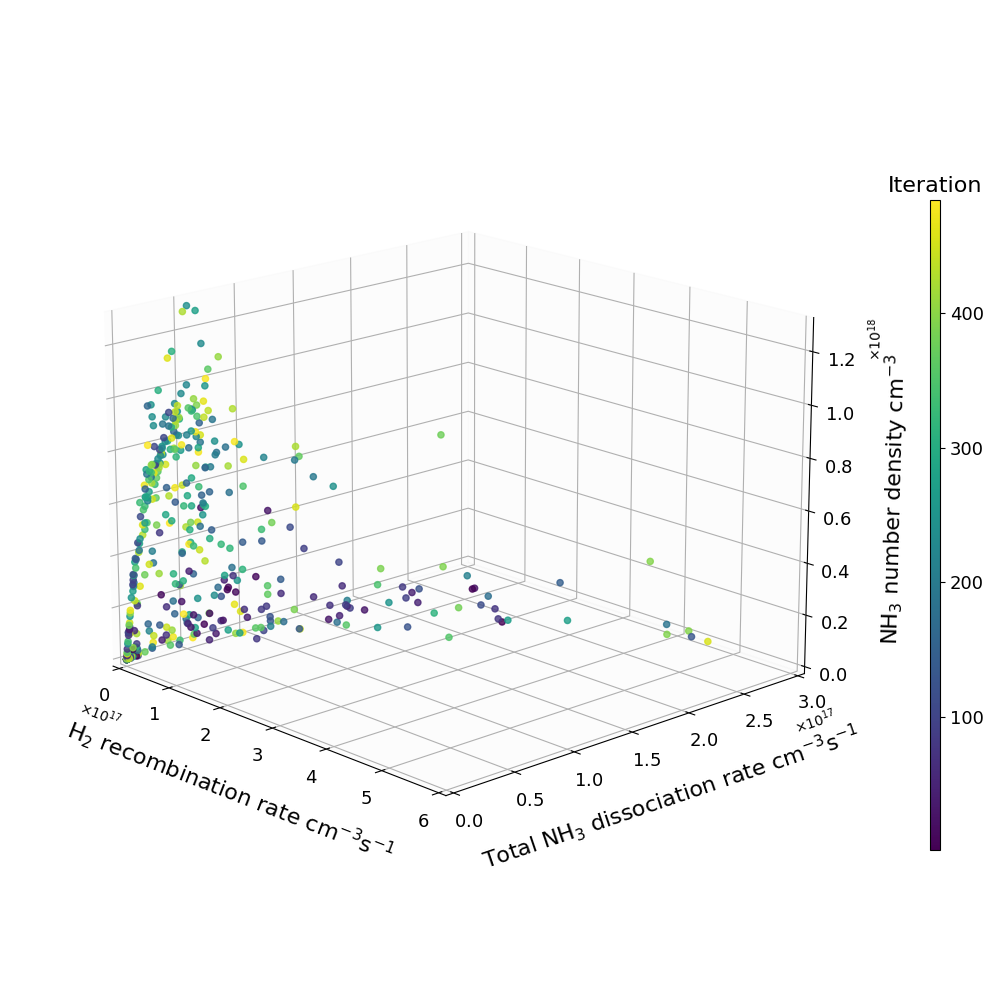

In [14]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib widget

from matplotlib.cm import ScalarMappable
fig = plt.figure(figsize=(10,10))
axes = fig.add_subplot(projection='3d')
fig.subplots_adjust(left=-0.005)
algos = ["qNEHVI"]
train_obj = outcomes
cm = plt.cm.get_cmap('viridis')


batch_number = df.trial_index.values
sc = axes.scatter(-train_obj[:,1], -train_obj[:,2], train_obj[:, 0], c=batch_number, alpha=0.8)
#axes.plot(-train_obj[:,1], [3.05e17]*len(-train_obj[:,2]), train_obj[:, 0], '+', color = 'orange')
#axes.plot([-0.001e19]*len(-train_obj[:,1]), -train_obj[:,2], train_obj[:, 0],'+', color = 'red')
#axes.plot(-train_obj[:,1], -train_obj[:,2], [-0.017e18]*len(-train_obj[:,1]), '+', color = 'magenta')

#axes.plot(-train_obj[:,1], train_obj[:, 0], 'r+', zdir='y', zs=3e17)
#axes.plot(-train_obj[:,2], train_obj[:, 0],'+', color = 'orange', zdir='x', zs=-0.05e19)
#axes.plot(-train_obj[:,1], -train_obj[:,2], '+', color = 'magenta', zdir='z', zs=0.)
#axes.set_title(algos[0])
#for index in range(len(train_obj)):
#      axes.text(train_obj[:, 0][index], -train_obj[:,1][index], -train_obj[:,2][index], index , size=3)
#axes.set_ylim([-0.2e19,0.05e19])
#axes.set_zlim([-3e17,0.0000001e19])
axes.set_xlim([-0.00e19, 0.06e19])
axes.set_ylim([-0.0000000e19, 3e17])
axes.set_zlim([0.,0.13e19])
axes.set_xlabel("\n\n$\mathrm{H}_2$ recombination rate $\mathrm{cm}^{-3}\mathrm{s}^{-1}$", fontsize=16)
axes.set_ylabel("\n\nTotal $\mathrm{NH}_3$ dissociation rate $\mathrm{cm}^{-3}\mathrm{s}^{-1}$", fontsize=16)
axes.set_zlabel("\n\n$\mathrm{NH}_3$ number density $\mathrm{cm}^{-3}$", fontsize=16)
axes.tick_params(axis='both', which='major', labelsize=13)

axes.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True, useOffset=True)
axes.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True, useOffset=True)
axes.ticklabel_format(style='sci', axis='z', scilimits=(0,0), useMathText=True, useOffset=True)
# make the panes transparent
axes.xaxis.set_pane_color((.95, .95, .95, .2))
axes.yaxis.set_pane_color((.95, .95, .95, .2))
axes.zaxis.set_pane_color((.95, .95, .95, .2))
#axes.xaxis._axinfo['label']['space_factor'] = 2.8
# make the grid lines transparent
#axes.xaxis._axinfo["grid"]['color'] =  (2565,255,255,1)
#axes.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
#axes.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
#axes.xaxis.pane.set_edgecolor('#D0D0D0')
#axes.yaxis.pane.set_edgecolor('#D0D0D0')
#axes.zaxis.pane.set_edgecolor('#D0D0D0')
#axes.xaxis.pane.set_alpha(1)
#axes.yaxis.pane.set_alpha(1)
#axes.zaxis.pane.set_alpha(1)

#axes.grid(False)
norm = plt.Normalize(batch_number.min(), batch_number.max())
sm =  ScalarMappable(norm=norm, cmap=cm)
sm.set_array([])
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.93, 0.15, 0.01, 0.65])
cbar = fig.colorbar(sm, cax=cbar_ax, fraction=0.01)
cbar.ax.set_title("Iteration", fontsize=16)
cbar.ax.tick_params(axis='both', which='major', labelsize=13)
axes.view_init(17.142857142857128, -43.16883116883116)
plt.show()


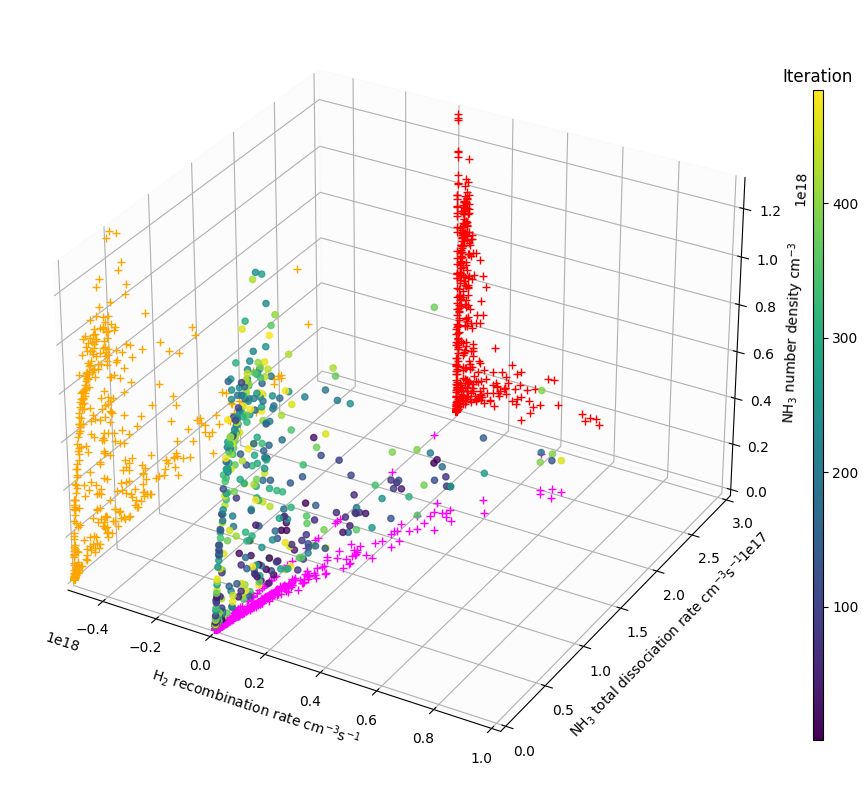

In [7]:
import numpy as np
from matplotlib import pyplot as plt
#%matplotlib widget

from matplotlib.cm import ScalarMappable
fig = plt.figure( figsize=(10,10))
axes = fig.add_subplot(projection='3d')
algos = ["qNEHVI"]
train_obj = outcomes
cm = plt.cm.get_cmap('viridis')


batch_number = df.trial_index.values
sc = axes.scatter(-train_obj[:,1], -train_obj[:,2], train_obj[:, 0], c=batch_number, alpha=0.8)
axes.plot(-train_obj[:,1], [3.05e17]*len(-train_obj[:,2]), train_obj[:, 0], 'r+')
axes.plot([-0.053e19]*len(-train_obj[:,1]), -train_obj[:,2], train_obj[:, 0],'+', color = 'orange')
axes.plot(-train_obj[:,1], -train_obj[:,2], [-0.017e18]*len(-train_obj[:,1]), '+', color = 'magenta')

#axes.plot(-train_obj[:,1], train_obj[:, 0], 'r+', zdir='y', zs=3e17)
#axes.plot(-train_obj[:,2], train_obj[:, 0],'+', color = 'orange', zdir='x', zs=-0.05e19)
#axes.plot(-train_obj[:,1], -train_obj[:,2], '+', color = 'magenta', zdir='z', zs=0.)
#axes.set_title(algos[0])
#for index in range(len(train_obj)):
#      axes.text(train_obj[:, 0][index], -train_obj[:,1][index], -train_obj[:,2][index], index , size=3)
#axes.set_ylim([-0.2e19,0.05e19])
#axes.set_zlim([-3e17,0.0000001e19])
axes.set_xlim([-0.05e19, 0.1e19])
axes.set_ylim([-0.0000001e19, 3e17])
axes.set_zlim([0.,0.13e19])
axes.set_xlabel("$\mathrm{H}_2$ recombination rate $\mathrm{cm}^{-3}\mathrm{s}^{-1}$")
axes.set_ylabel("$\mathrm{NH}_3$ total dissociation rate $\mathrm{cm}^{-3}\mathrm{s}^{-1}$")
axes.set_zlabel("$\mathrm{NH}_3$ number density $\mathrm{cm}^{-3}$")

# make the panes transparent
axes.xaxis.set_pane_color((.95, .95, .95, .2))
axes.yaxis.set_pane_color((.95, .95, .95, .2))
axes.zaxis.set_pane_color((.95, .95, .95, .2))
# make the grid lines transparent
#axes.xaxis._axinfo["grid"]['color'] =  (2565,255,255,1)
#axes.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
#axes.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
#axes.xaxis.pane.set_edgecolor('#D0D0D0')
#axes.yaxis.pane.set_edgecolor('#D0D0D0')
#axes.zaxis.pane.set_edgecolor('#D0D0D0')
#axes.xaxis.pane.set_alpha(1)
#axes.yaxis.pane.set_alpha(1)
#axes.zaxis.pane.set_alpha(1)

#axes.grid(False)
norm = plt.Normalize(batch_number.min(), batch_number.max())
sm =  ScalarMappable(norm=norm, cmap=cm)
sm.set_array([])
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.93, 0.15, 0.01, 0.65])
cbar = fig.colorbar(sm, cax=cbar_ax, fraction=0.01, pad=0.04)
cbar.ax.set_title("Iteration")

plt.show()

In [15]:
import numpy as np
from matplotlib import pyplot as plt
#%matplotlib widget

from matplotlib.cm import ScalarMappable
fig = plt.figure(dpi=400, figsize=(10,10))
axes = fig.add_subplot(projection='3d')
fig.subplots_adjust(left=-0.005)
algos = ["qNEHVI"]
train_obj = outcomes
cm = plt.cm.get_cmap('viridis')


batch_number = df.trial_index.values
sc = axes.scatter(-train_obj[:,1], -train_obj[:,2], train_obj[:, 0], c=batch_number, alpha=0.8)
axes.plot(-train_obj[:,1], [3.05e17]*len(-train_obj[:,2]), train_obj[:, 0], '+', color = 'orange')
axes.plot([-0.001e19]*len(-train_obj[:,1]), -train_obj[:,2], train_obj[:, 0],'+', color = 'red')
axes.plot(-train_obj[:,1], -train_obj[:,2], [-0.017e18]*len(-train_obj[:,1]), '+', color = 'magenta')

#axes.plot(-train_obj[:,1], train_obj[:, 0], 'r+', zdir='y', zs=3e17)
#axes.plot(-train_obj[:,2], train_obj[:, 0],'+', color = 'orange', zdir='x', zs=-0.05e19)
#axes.plot(-train_obj[:,1], -train_obj[:,2], '+', color = 'magenta', zdir='z', zs=0.)
#axes.set_title(algos[0])
#for index in range(len(train_obj)):
#      axes.text(train_obj[:, 0][index], -train_obj[:,1][index], -train_obj[:,2][index], index , size=3)
#axes.set_ylim([-0.2e19,0.05e19])
#axes.set_zlim([-3e17,0.0000001e19])
axes.set_xlim([-0.00e19, 0.06e19])
axes.set_ylim([-0.0000000e19, 3e17])
axes.set_zlim([0.,0.13e19])
axes.set_xlabel("$\mathrm{H}_2$ recombination rate $\mathrm{cm}^{-3}\mathrm{s}^{-1}$")
axes.set_ylabel("Total $\mathrm{NH}_3$ dissociation rate $\mathrm{cm}^{-3}\mathrm{s}^{-1}$")
axes.set_zlabel("$\mathrm{NH}_3$ number density $\mathrm{cm}^{-3}$")

axes.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True, useOffset=True)
axes.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True, useOffset=True)
axes.ticklabel_format(style='sci', axis='z', scilimits=(0,0), useMathText=True, useOffset=True)
# make the panes transparent
axes.xaxis.set_pane_color((.95, .95, .95, .2))
axes.yaxis.set_pane_color((.95, .95, .95, .2))
axes.zaxis.set_pane_color((.95, .95, .95, .2))
#axes.xaxis._axinfo['label']['space_factor'] = 2.8
# make the grid lines transparent
#axes.xaxis._axinfo["grid"]['color'] =  (2565,255,255,1)
#axes.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
#axes.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
#axes.xaxis.pane.set_edgecolor('#D0D0D0')
#axes.yaxis.pane.set_edgecolor('#D0D0D0')
#axes.zaxis.pane.set_edgecolor('#D0D0D0')
#axes.xaxis.pane.set_alpha(1)
#axes.yaxis.pane.set_alpha(1)
#axes.zaxis.pane.set_alpha(1)

#axes.grid(False)
norm = plt.Normalize(batch_number.min(), batch_number.max())
sm =  ScalarMappable(norm=norm, cmap=cm)
sm.set_array([])
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.93, 0.15, 0.01, 0.65])
cbar = fig.colorbar(sm, cax=cbar_ax, fraction=0.01)
cbar.ax.set_title("Iteration")
axes.view_init(17.142857142857128, -43.16883116883116)
plt.show()


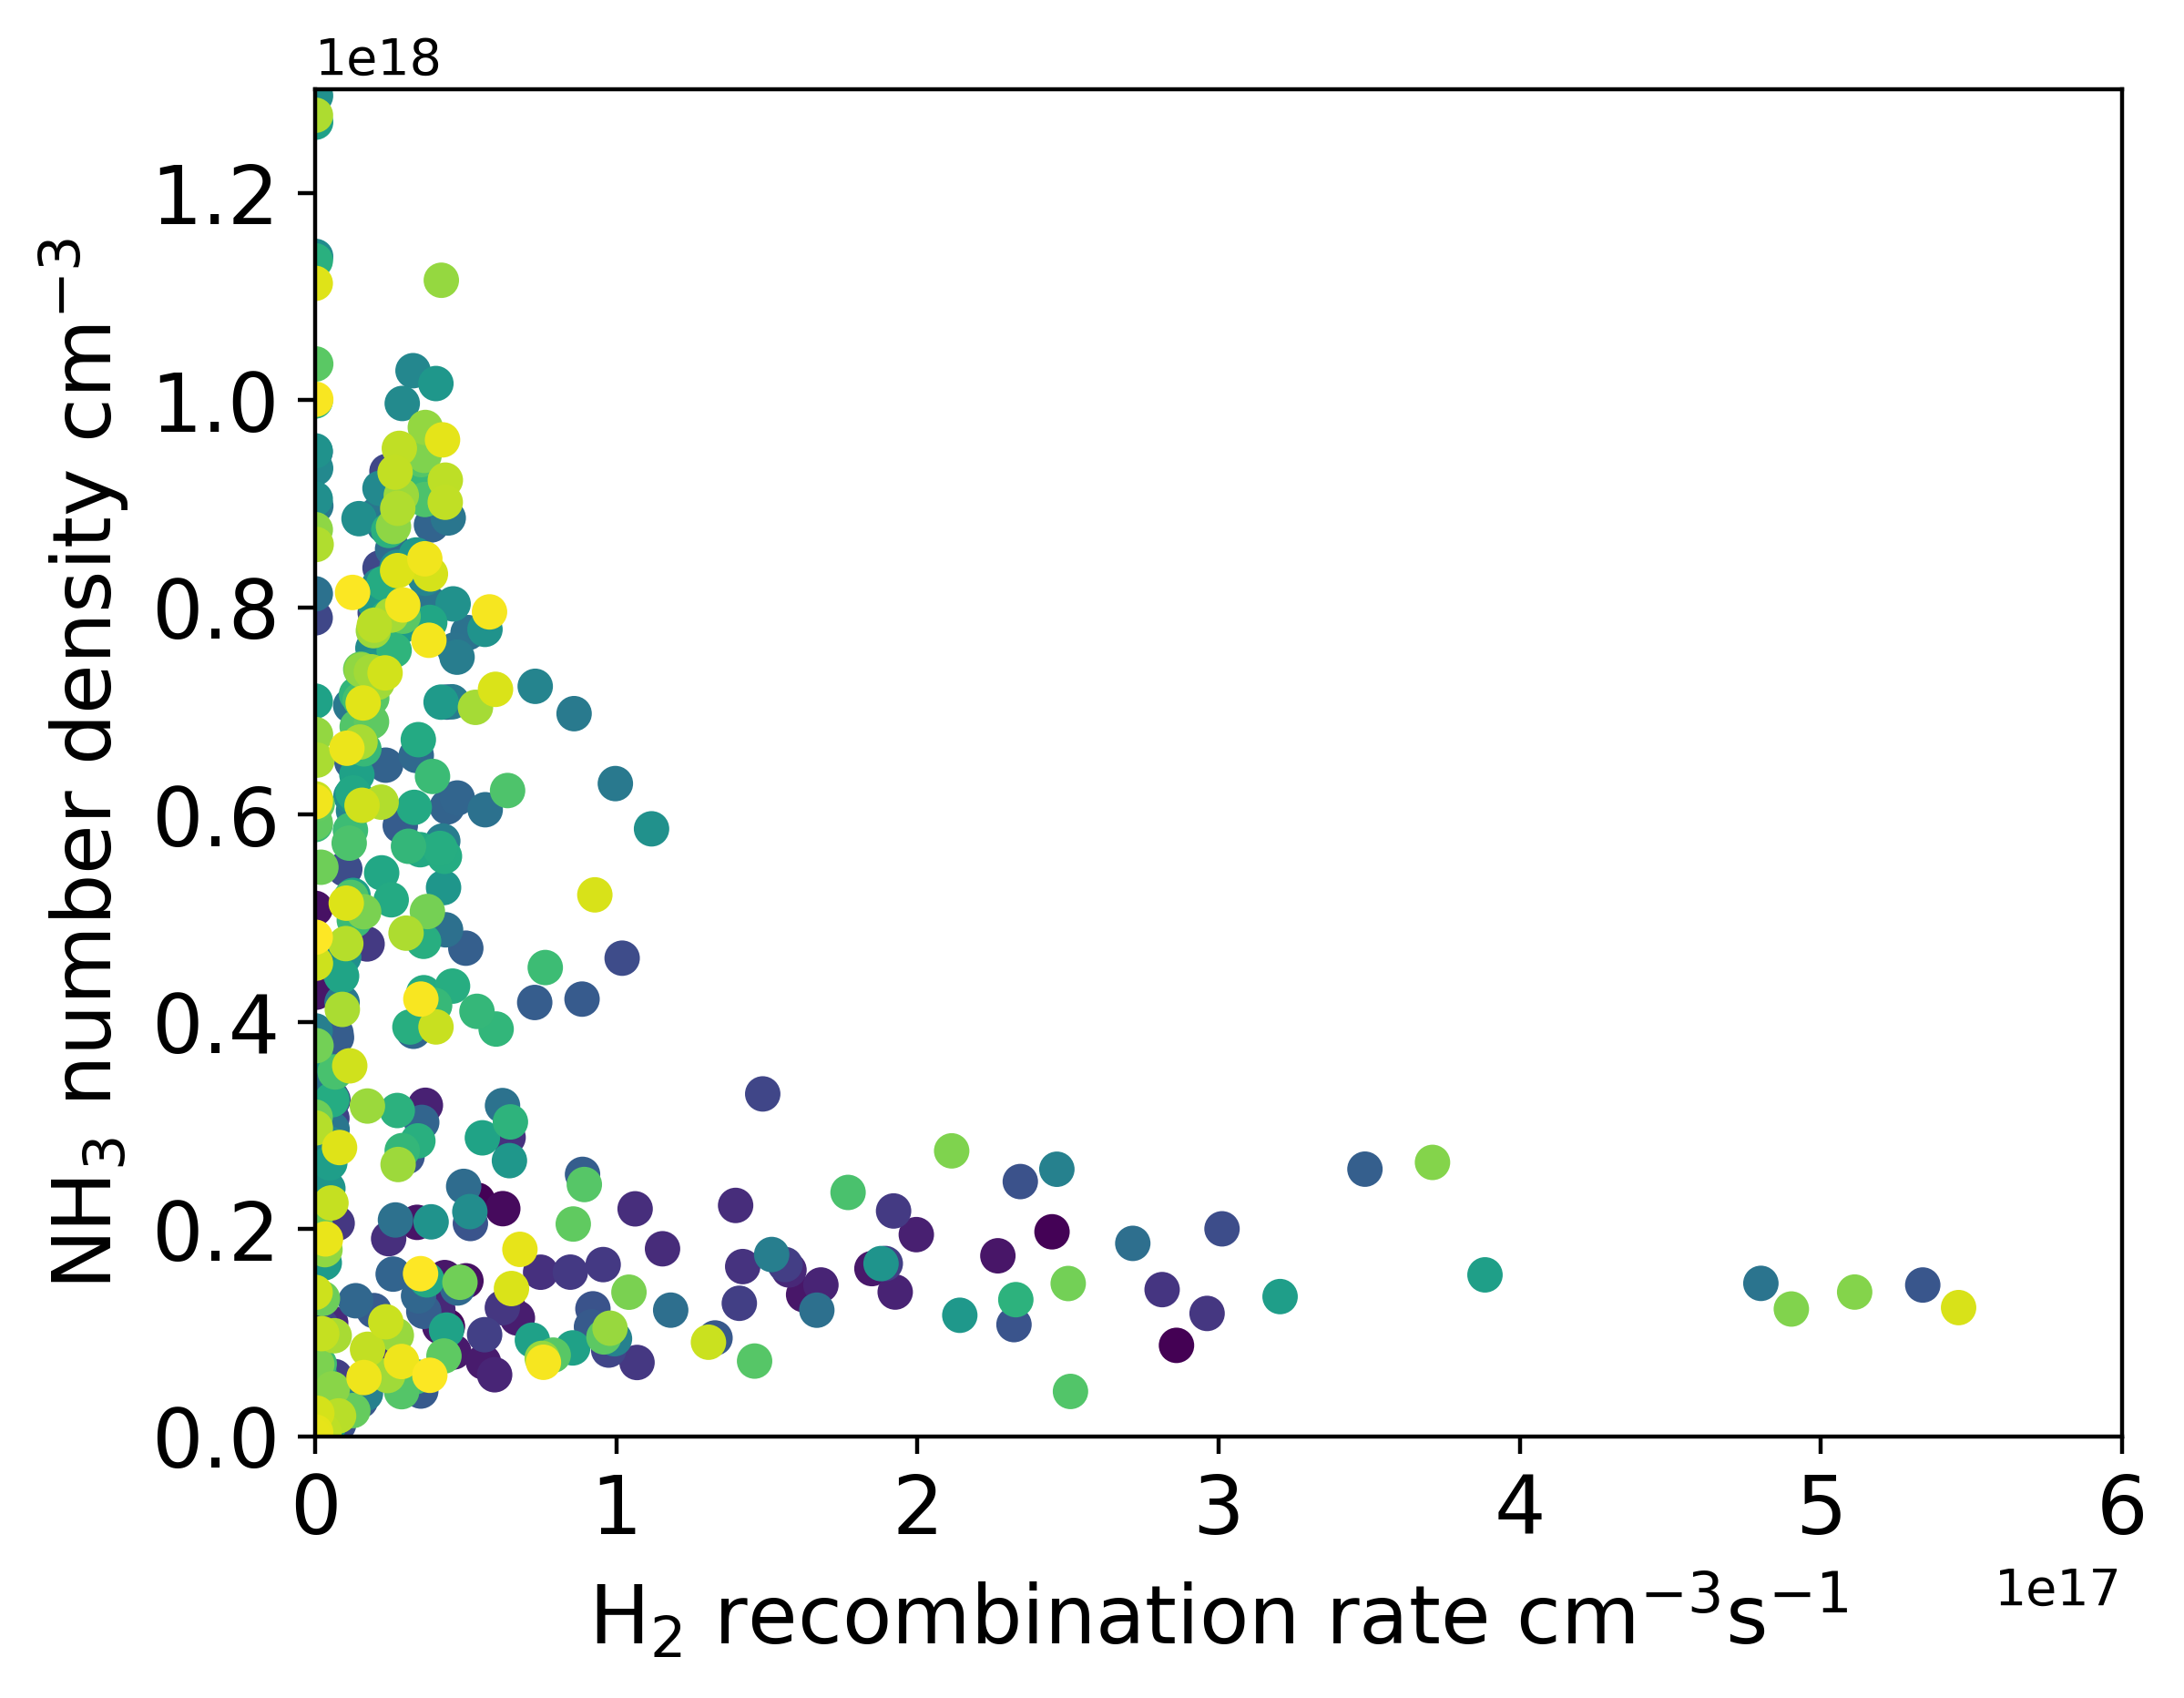

In [16]:
fig = plt.figure(dpi=400)
axes = fig.add_subplot()
sc = axes.scatter(-train_obj[:,1], train_obj[:, 0], c=batch_number)
axes.set_xlim([-0.00e19, 0.06e19])
axes.set_ylim([0.,0.13e19])
axes.set_xlabel("$\mathrm{H}_2$ recombination rate $\mathrm{cm}^{-3}\mathrm{s}^{-1}$", fontsize=16)
axes.set_ylabel("$\mathrm{NH}_3$ number density $\mathrm{cm}^{-3}$", fontsize=16)
axes.tick_params(axis='both', which='major', labelsize=16)
plt.show()

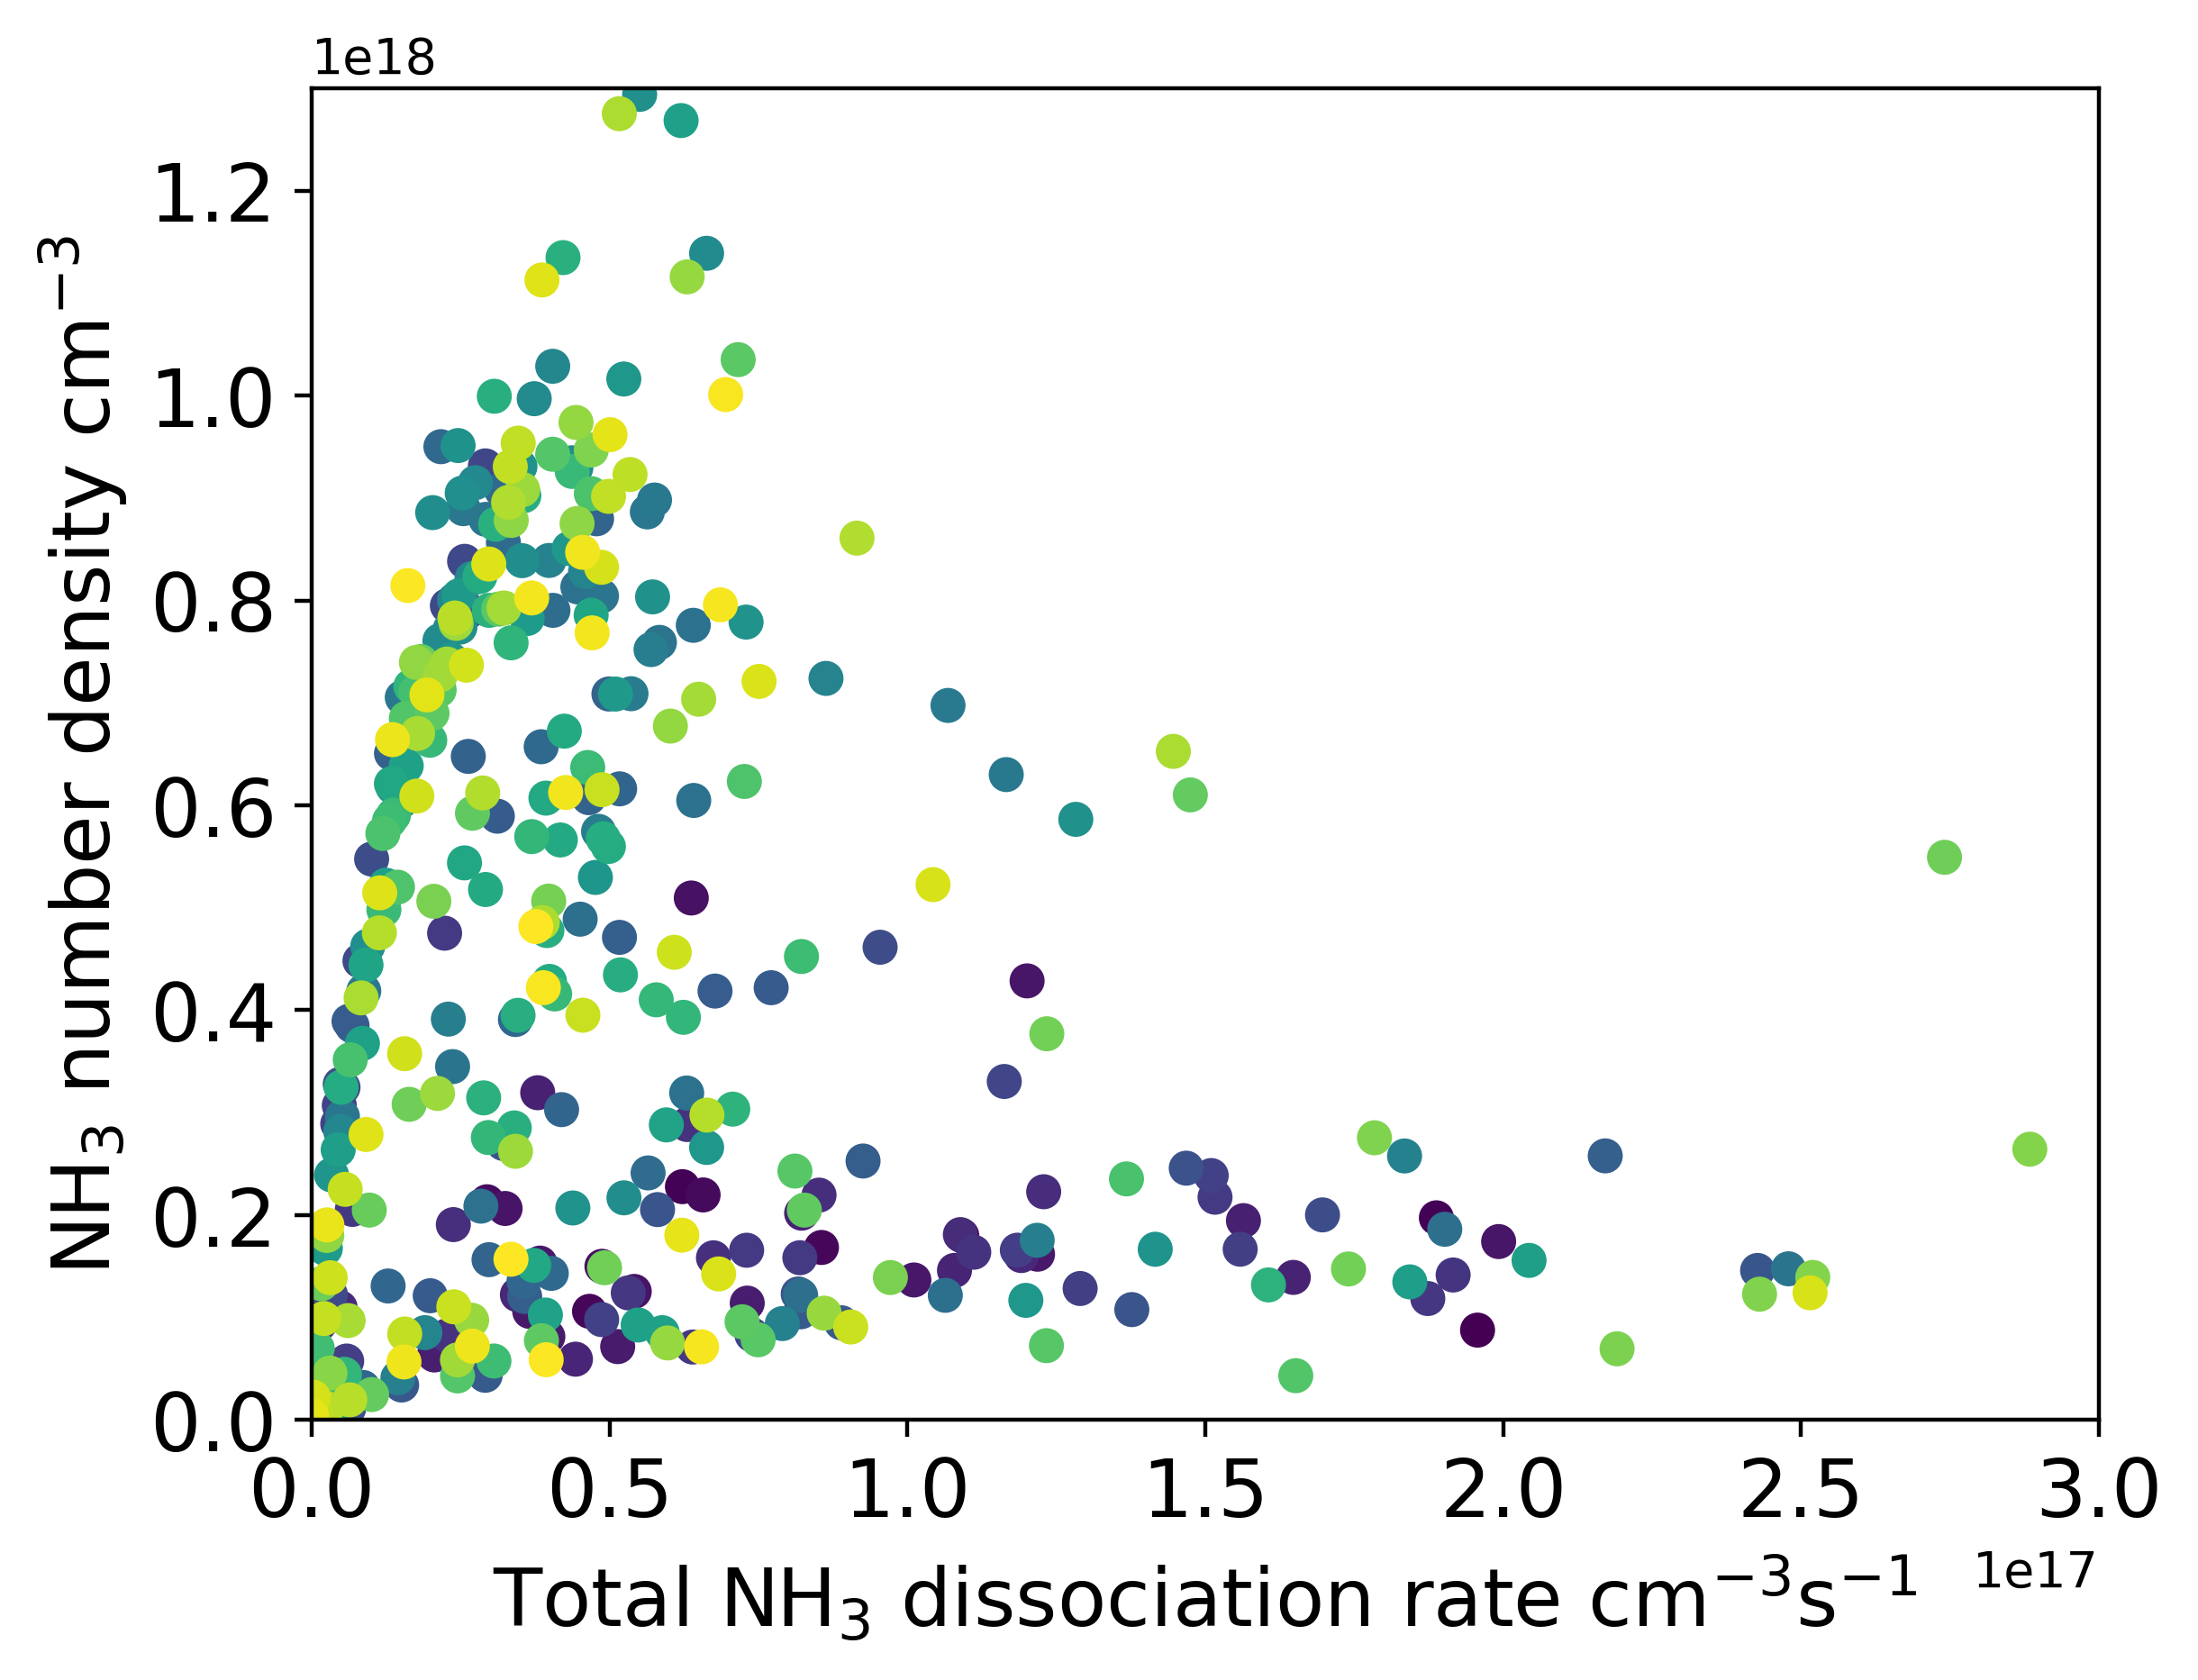

In [11]:
from matplotlib import pyplot as plt
fig = plt.figure(dpi=400)
axes = fig.add_subplot()
sc = axes.scatter(-train_obj[:,2], train_obj[:, 0], c=batch_number)
axes.set_xlim([-0.0000000e19, 3e17])
axes.set_ylim([0.,0.13e19])
axes.set_xlabel("Total $\mathrm{NH}_3$ dissociation rate $\mathrm{cm}^{-3}\mathrm{s}^{-1}$", fontsize=16)
axes.set_ylabel("$\mathrm{NH}_3$ number density $\mathrm{cm}^{-3}$", fontsize=16)
axes.tick_params(axis='both', which='major', labelsize=16)
plt.show()

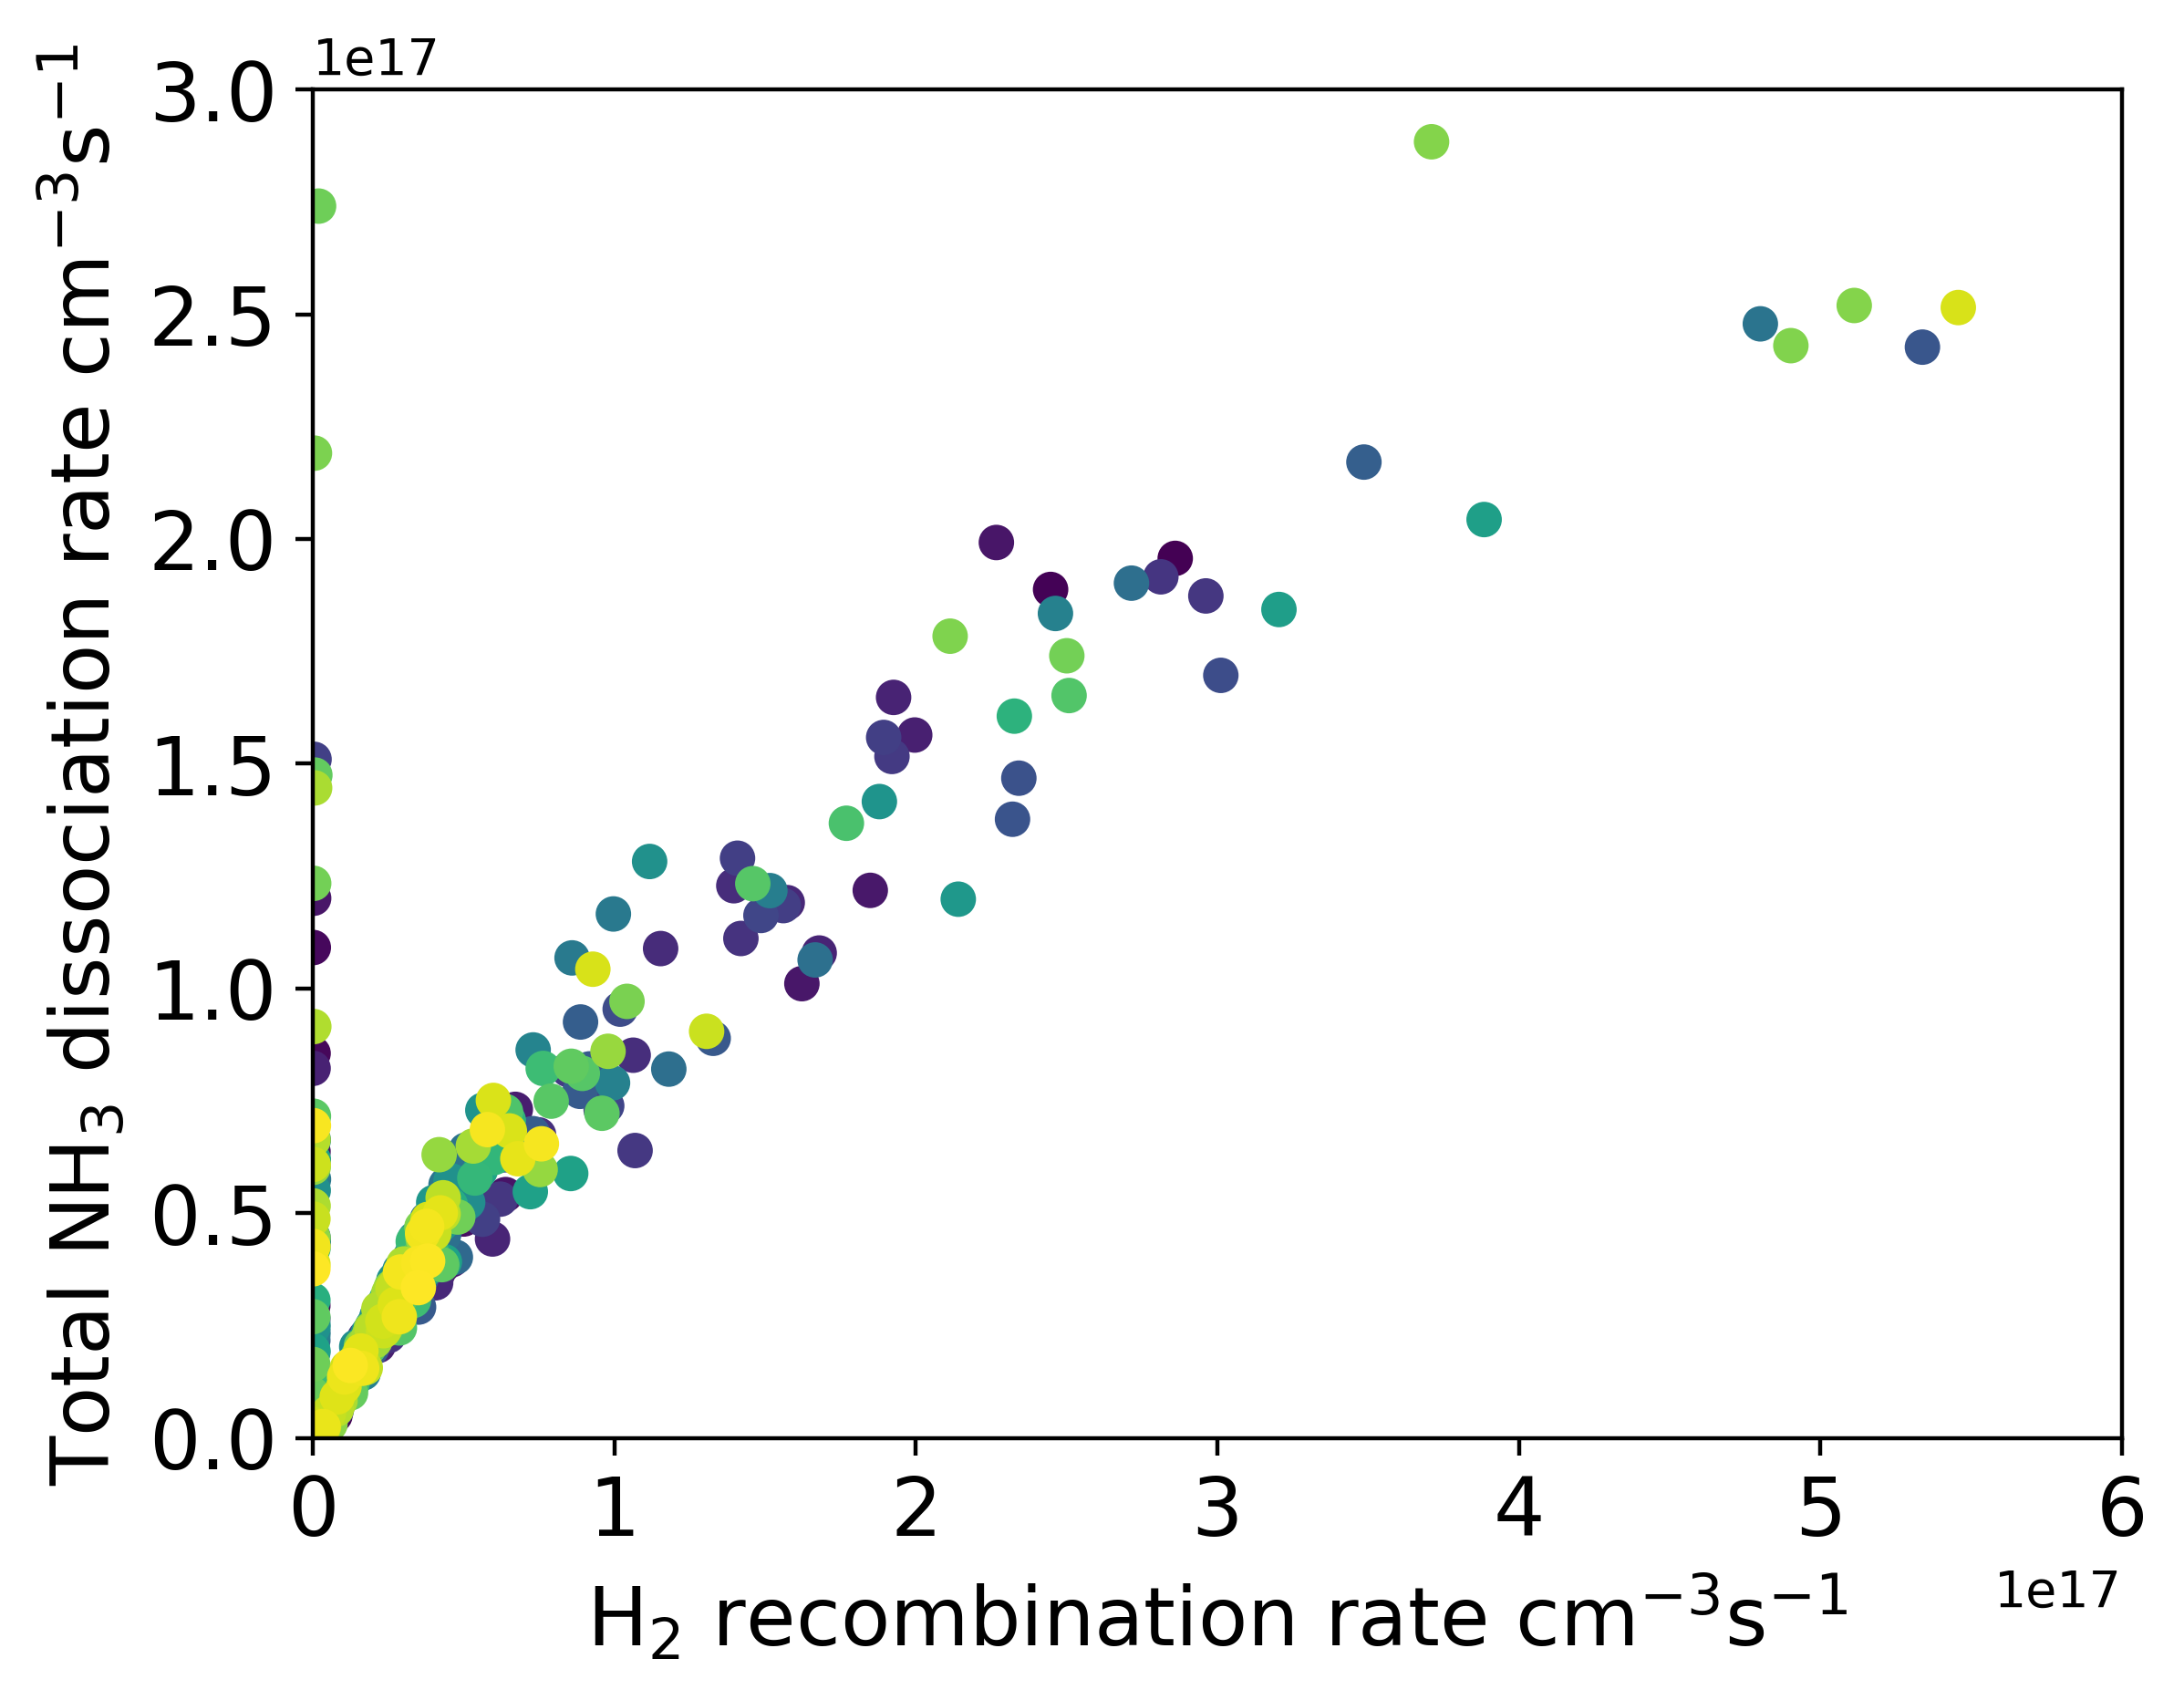

In [17]:
fig = plt.figure(dpi=400)
axes = fig.add_subplot()
sc = axes.scatter(-train_obj[:,1], -train_obj[:,2], c=batch_number)
axes.set_ylim([-0.0000000e19, 3e17])
axes.set_xlim([-0.00e19, 0.06e19])
axes.set_xlabel("$\mathrm{H}_2$ recombination rate $\mathrm{cm}^{-3}\mathrm{s}^{-1}$", fontsize=16)
axes.set_ylabel("Total $\mathrm{NH}_3$ dissociation rate $\mathrm{cm}^{-3}\mathrm{s}^{-1}$", fontsize=16)
axes.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [37]:
ax_client.get_pareto_optimal_parameters(use_model_predictions=False)

{110: ({'Temperature': 411.58046642425313,
   'Electron_Density': 50000000.0,
   'Electric_Field': 0.10418783711285341,
   'N2_Fraction': 0.8068681465842686},
  ({'H2pickingup': -8049826613888889.0,
    'NH3_production_rate': 4.482165633333333e+17,
    'NH3decomp': -8101325913888888.0},
   {'H2pickingup': {'H2pickingup': nan,
     'NH3_production_rate': 0.0,
     'NH3decomp': 0.0},
    'NH3_production_rate': {'H2pickingup': 0.0,
     'NH3_production_rate': nan,
     'NH3decomp': 0.0},
    'NH3decomp': {'H2pickingup': 0.0,
     'NH3_production_rate': 0.0,
     'NH3decomp': nan}})),
 116: ({'Temperature': 350.16382899402504,
   'Electron_Density': 50000000.0,
   'Electric_Field': 0.12,
   'N2_Fraction': 0.9124541359281086},
  ({'H2pickingup': -5331656250000000.0,
    'NH3_production_rate': 3.278025e+17,
    'NH3decomp': -4795862500000000.0},
   {'H2pickingup': {'H2pickingup': nan,
     'NH3_production_rate': 0.0,
     'NH3decomp': 0.0},
    'NH3_production_rate': {'H2pickingup': 0.0,
   

In [36]:
df.iloc[[110, 116, 141, 222, 240, 248, 252, 264, 270, 275, 335, 344, 376, 404, 447, 468, 74, 87, 96, 97, 98],:]

H2pickingup  NH3_production_rate     NH3decomp  trial_index arm_name  \
110 -8.049827e+15         4.482166e+17 -8.101326e+15          110    110_0   
116 -5.331656e+15         3.278025e+17 -4.795862e+15          116    116_0   
141 -6.911057e+15         3.892711e+17 -6.271126e+15          141    141_0   
222 -5.295675e+15         2.817425e+17 -4.875425e+15          222    222_0   
240 -9.495732e+15         4.625865e+17 -9.413590e+15          240    240_0   
248 -1.327419e+15         6.116516e+16 -6.715558e+14          248    248_0   
252 -4.239468e+15         2.391949e+17 -3.333083e+15          252    252_0   
264 -3.040251e+15         1.674272e+17 -2.290150e+15          264    264_0   
270 -4.882793e+15         2.638736e+17 -4.450922e+15          270    270_0   
275 -1.874500e+12         3.676600e+17 -8.518200e+15          275    275_0   
335 -1.372238e+15         7.001388e+16 -9.403800e+14          335    335_0   
344 -6.653220e+15         3.516802e+17 -6.472950e+15          344    344_0   
376 -2.435988e+15         1.330206e+17 -1.645809e+15          376    376_0   
404 -3.269859e+15         1.801618e+17 -2.534479e+15          404    404_0   
447 -2.547900e+11         1.389000e+17 -3.102920e+15          447    447_0   
468 -3.437106e+15         1.904900e+17 -2.548461e+15          468    468_0   
74  -1.742991e+15         9.371245e+16 -1.317155e+15           74     74_0   
87  -1.892491e+15         1.027509e+17 -1.234133e+15           87     87_0   
96  -5.571218e+15         3.071336e+17 -4.634126e+15           96     96_0   
97  -5.332338e+15         2.891488e+17 -4.374109e+15           97     97_0   
98  -2.027112e+15         1.066062e+17 -1.181990e+15           98     98_0   

     is_feasible  Temperature  Electron_Density  Electric_Field  N2_Fraction  \
110         True   411.580466        50000000.0        0.104188     0.806868   
116         True   350.163829        50000000.0        0.120000     0.912454   
141         True   349.626161        50000000.0        0.120000     0.833472   
222         True   466.551867        50000000.0        0.085076     0.661028   
240         True   590.239450        50000000.0        0.074820     0.801454   
248         True   437.746473        50000000.0        0.078877     0.616740   
252         True   351.698805        50000000.0        0.114432     0.838888   
264         True   454.873531        50000000.0        0.087573     0.825760   
270         True   435.387558        50000000.0        0.089070     0.620407   
275         True   514.023265        50000000.0        0.092736     0.947967   
335         True   395.821939        50000000.0        0.080413     0.338780   
344         True   483.724437        50000000.0        0.085540     0.714877   
376         True   354.745785        50000000.0        0.103153     0.669752   
404         True   350.954499        50000000.0        0.103157     0.570381   
447         True   591.812266        50000000.0        0.079855     0.967251   
468         True   362.480598        50000000.0        0.107793     0.786278   
74          True   354.938836        50000000.0        0.090718     0.341786   
87          True   355.633620        50000000.0        0.097364     0.558350   
96          True   334.140297        50000000.0        0.120000     0.764179   
97          True   321.004234        50000000.0        0.120000     0.669171   
98          True   311.414284        50000000.0        0.120000     0.835960   

    trial_status generation_method  
110    COMPLETED               MOO  
116    COMPLETED               MOO  
141    COMPLETED               MOO  
222    COMPLETED               MOO  
240    COMPLETED               MOO  
248    COMPLETED               MOO  
252    COMPLETED               MOO  
264    COMPLETED               MOO  
270    COMPLETED               MOO  
275    COMPLETED               MOO  
335    COMPLETED               MOO  
344    COMPLETED               MOO  
376    COMPLETED               MOO  
404    COM

In [38]:
pare = df.iloc[[110, 116, 141, 222, 240, 248, 252, 264, 270, 275, 335, 344, 376, 404, 447, 468, 74, 87, 96, 97, 98],:]